In [1]:
from numpy import argmax
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import numpy as np

df1 = pd.read_csv("detail_list_Prediction_human_from_mordred_morgan_fs_animal_artificial.csv")
df1

,endpoint,random_state,split,smiles_r,pred,true,key
0,human_VDss_L_kg,42,0,C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc([O-])ccc4[C@H...,0.278796,0.633468,human_VDss_L_kgC#C[C@]1(O)CC[C@H]2[C@@H]3CCc4c...
1,human_VDss_L_kg,42,0,C=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N)nc(N)c3n2)cc1)...,-0.048287,-0.154902,human_VDss_L_kgC=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N...
2,human_VDss_L_kg,42,0,C=CC1=C(C(=O)[O-])[NH+]2C(=O)C(=NC(=O)C(NOCC(=...,-0.712607,-0.619789,human_VDss_L_kgC=CC1=C(C(=O)[O-])[NH+]2C(=O)C(...
3,human_VDss_L_kg,42,0,C=CCc1ccccc1OCC(O)C[NH2+]C(C)C,0.366459,0.505150,human_VDss_L_kgC=CCc1ccccc1OCC(O)C[NH2+]C(C)C420
4,human_VDss_L_kg,42,0,C=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H](Oc2ncc(OC)c3c...,0.033923,0.442480,human_VDss_L_kgC=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H...
...,...,...,...,...,...,...,...
29580,human_thalf,46,4,[NH3+]CCCCC(NC(=O)C(Cc1cc(Br)c([O-])c(Br)c1)NC...,0.934596,0.397940,human_thalf[NH3+]CCCCC(NC(=O)C(Cc1cc(Br)c([O-]...
29581,human_thalf,46,4,[NH3+]C[C@H]1OB(O)c2c(OCCCO)cccc21,0.549054,1.064458,human_thalf[NH3+]C[C@H]1OB(O)c2c(OCCCO)cccc21464
29582,human_thalf,46,4,[O-]c1ccc(C2=Cc3ccc([O-])cc3OC2)cc1,0.578109,-0.173925,human_thalf[O-]c1ccc(C2=Cc3ccc([O-])cc3OC2)cc1464
29583,human_thalf,46,4,[O-]c1ccc([C@H]2C[NH2+]CCc3c2cc([O-])c([O-])c3...,0.631691,0.000000,human_thalf[O-]c1ccc([C@H]2C[NH2+]CCc3c2cc([O-...


In [4]:
df2 = pd.read_csv("Cross_val_compounds_similarity_to_train_5nn.csv")
df2 = df2[["key", "MFP_Tc"]]
df2

,key,MFP_Tc
0,human_VDss_L_kgFC(F)(F)C(F)(F)C(F)(F)F420,0.079048
1,human_VDss_L_kg[NH3+]C12CC3CC(CC(C3)C1)C2420,0.140456
2,human_VDss_L_kgCC1(C)O[C@@H]2[C@@H](CO[C@@]3(C...,0.156877
3,human_VDss_L_kgNC(=[NH2+])N=c1[nH]c(CSCCC(=[NH...,0.165661
4,human_VDss_L_kgC[C@@](O)(/C=C/[C@H]1CC=CC(=O)O...,0.166903
...,...,...
29580,human_thalfCON=C(C(=O)NC1C(=O)[NH+]2C(C(=O)[O-...,0.692836
29581,human_thalfCON=C(C(=O)NC1C(=O)[NH+]2C(C(=O)[O-...,0.714392
29582,human_thalfCC(=O)[C@]1(O)Cc2c([O-])c3c(c([O-])...,0.736391
29583,human_thalfCOc1cccc2c1C(=O)c1c([O-])c3c(c([O-]...,0.746316


In [5]:
df = pd.merge(df1, df2)
df

,endpoint,random_state,split,smiles_r,pred,true,key,MFP_Tc
0,human_VDss_L_kg,42,0,C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc([O-])ccc4[C@H...,0.278796,0.633468,human_VDss_L_kgC#C[C@]1(O)CC[C@H]2[C@@H]3CCc4c...,0.552426
1,human_VDss_L_kg,42,0,C=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N)nc(N)c3n2)cc1)...,-0.048287,-0.154902,human_VDss_L_kgC=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N...,0.393902
2,human_VDss_L_kg,42,0,C=CC1=C(C(=O)[O-])[NH+]2C(=O)C(=NC(=O)C(NOCC(=...,-0.712607,-0.619789,human_VDss_L_kgC=CC1=C(C(=O)[O-])[NH+]2C(=O)C(...,0.414304
3,human_VDss_L_kg,42,0,C=CCc1ccccc1OCC(O)C[NH2+]C(C)C,0.366459,0.505150,human_VDss_L_kgC=CCc1ccccc1OCC(O)C[NH2+]C(C)C420,0.555268
4,human_VDss_L_kg,42,0,C=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H](Oc2ncc(OC)c3c...,0.033923,0.442480,human_VDss_L_kgC=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H...,0.216337
...,...,...,...,...,...,...,...,...
29580,human_thalf,46,4,[NH3+]CCCCC(NC(=O)C(Cc1cc(Br)c([O-])c(Br)c1)NC...,0.934596,0.397940,human_thalf[NH3+]CCCCC(NC(=O)C(Cc1cc(Br)c([O-]...,0.237982
29581,human_thalf,46,4,[NH3+]C[C@H]1OB(O)c2c(OCCCO)cccc21,0.549054,1.064458,human_thalf[NH3+]C[C@H]1OB(O)c2c(OCCCO)cccc21464,0.201767
29582,human_thalf,46,4,[O-]c1ccc(C2=Cc3ccc([O-])cc3OC2)cc1,0.578109,-0.173925,human_thalf[O-]c1ccc(C2=Cc3ccc([O-])cc3OC2)cc1464,0.216484
29583,human_thalf,46,4,[O-]c1ccc([C@H]2C[NH2+]CCc3c2cc([O-])c([O-])c3...,0.631691,0.000000,human_thalf[O-]c1ccc([C@H]2C[NH2+]CCc3c2cc([O-...,0.207089


In [6]:
df[df["endpoint"]=="human_VDss_L_kg"]

,endpoint,random_state,split,smiles_r,pred,true,key,MFP_Tc
0,human_VDss_L_kg,42,0,C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc([O-])ccc4[C@H...,0.278796,0.633468,human_VDss_L_kgC#C[C@]1(O)CC[C@H]2[C@@H]3CCc4c...,0.552426
1,human_VDss_L_kg,42,0,C=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N)nc(N)c3n2)cc1)...,-0.048287,-0.154902,human_VDss_L_kgC=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N...,0.393902
2,human_VDss_L_kg,42,0,C=CC1=C(C(=O)[O-])[NH+]2C(=O)C(=NC(=O)C(NOCC(=...,-0.712607,-0.619789,human_VDss_L_kgC=CC1=C(C(=O)[O-])[NH+]2C(=O)C(...,0.414304
3,human_VDss_L_kg,42,0,C=CCc1ccccc1OCC(O)C[NH2+]C(C)C,0.366459,0.505150,human_VDss_L_kgC=CCc1ccccc1OCC(O)C[NH2+]C(C)C420,0.555268
4,human_VDss_L_kg,42,0,C=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H](Oc2ncc(OC)c3c...,0.033923,0.442480,human_VDss_L_kgC=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H...,0.216337
...,...,...,...,...,...,...,...,...
6240,human_VDss_L_kg,46,4,[NH3+]C[C@@H]1CC[C@@H]([NH3+])[C@@H](O[C@H]2[C...,-0.661441,-0.886057,human_VDss_L_kg[NH3+]C[C@@H]1CC[C@@H]([NH3+])[...,0.576780
6241,human_VDss_L_kg,46,4,[O-]c1ccc([C@@H](O)C[NH2+]CCCCCCOCCOCc2c(Cl)cc...,0.414766,0.376577,human_VDss_L_kg[O-]c1ccc([C@@H](O)C[NH2+]CCCCC...,0.306075
6242,human_VDss_L_kg,46,4,[O-]c1ccc2c3c1O[C@H]1[C@@H](O)CC[C@@]4(O)[C@@H...,0.600101,0.662758,human_VDss_L_kg[O-]c1ccc2c3c1O[C@H]1[C@@H](O)C...,0.465773
6243,human_VDss_L_kg,46,4,c1cc2c(c(N3CC[NH2+]CC3)c1)OCCO2,0.245391,0.556303,human_VDss_L_kgc1cc2c(c(N3CC[NH2+]CC3)c1)OCCO2464,0.277738


In [7]:
def ind_count(a, b):
    
    a = 10**a
    b = 10**b     
    x = a/b
    
    return(x)

def reverse(x):
    
    if(x<1):      
        return(1/x)
    return(x)

data_for_pred = ind_count(df["pred"], df["true"])
df["folderror"] = data_for_pred
df["folderror"]  = df["folderror"].apply(reverse)
df

,endpoint,random_state,split,smiles_r,pred,true,key,MFP_Tc,folderror
0,human_VDss_L_kg,42,0,C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc([O-])ccc4[C@H...,0.278796,0.633468,human_VDss_L_kgC#C[C@]1(O)CC[C@H]2[C@@H]3CCc4c...,0.552426,2.262935
1,human_VDss_L_kg,42,0,C=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N)nc(N)c3n2)cc1)...,-0.048287,-0.154902,human_VDss_L_kgC=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N...,0.393902,1.278249
2,human_VDss_L_kg,42,0,C=CC1=C(C(=O)[O-])[NH+]2C(=O)C(=NC(=O)C(NOCC(=...,-0.712607,-0.619789,human_VDss_L_kgC=CC1=C(C(=O)[O-])[NH+]2C(=O)C(...,0.414304,1.238279
3,human_VDss_L_kg,42,0,C=CCc1ccccc1OCC(O)C[NH2+]C(C)C,0.366459,0.505150,human_VDss_L_kgC=CCc1ccccc1OCC(O)C[NH2+]C(C)C420,0.555268,1.376230
4,human_VDss_L_kg,42,0,C=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H](Oc2ncc(OC)c3c...,0.033923,0.442480,human_VDss_L_kgC=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H...,0.216337,2.561870
...,...,...,...,...,...,...,...,...,...
29580,human_thalf,46,4,[NH3+]CCCCC(NC(=O)C(Cc1cc(Br)c([O-])c(Br)c1)NC...,0.934596,0.397940,human_thalf[NH3+]CCCCC(NC(=O)C(Cc1cc(Br)c([O-]...,0.237982,3.440769
29581,human_thalf,46,4,[NH3+]C[C@H]1OB(O)c2c(OCCCO)cccc21,0.549054,1.064458,human_thalf[NH3+]C[C@H]1OB(O)c2c(OCCCO)cccc21464,0.201767,3.276451
29582,human_thalf,46,4,[O-]c1ccc(C2=Cc3ccc([O-])cc3OC2)cc1,0.578109,-0.173925,human_thalf[O-]c1ccc(C2=Cc3ccc([O-])cc3OC2)cc1464,0.216484,5.649817
29583,human_thalf,46,4,[O-]c1ccc([C@H]2C[NH2+]CCc3c2cc([O-])c([O-])c3...,0.631691,0.000000,human_thalf[O-]c1ccc([C@H]2C[NH2+]CCc3c2cc([O-...,0.207089,4.282441


In [8]:
data_mean = df
#data_mean = df[df["folderror"]<=10]
data_mean["MFP_Tc"] = np.round(data_mean["MFP_Tc"], 2)
data_mean

,endpoint,random_state,split,smiles_r,pred,true,key,MFP_Tc,folderror
0,human_VDss_L_kg,42,0,C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc([O-])ccc4[C@H...,0.278796,0.633468,human_VDss_L_kgC#C[C@]1(O)CC[C@H]2[C@@H]3CCc4c...,0.55,2.262935
1,human_VDss_L_kg,42,0,C=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N)nc(N)c3n2)cc1)...,-0.048287,-0.154902,human_VDss_L_kgC=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N...,0.39,1.278249
2,human_VDss_L_kg,42,0,C=CC1=C(C(=O)[O-])[NH+]2C(=O)C(=NC(=O)C(NOCC(=...,-0.712607,-0.619789,human_VDss_L_kgC=CC1=C(C(=O)[O-])[NH+]2C(=O)C(...,0.41,1.238279
3,human_VDss_L_kg,42,0,C=CCc1ccccc1OCC(O)C[NH2+]C(C)C,0.366459,0.505150,human_VDss_L_kgC=CCc1ccccc1OCC(O)C[NH2+]C(C)C420,0.56,1.376230
4,human_VDss_L_kg,42,0,C=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H](Oc2ncc(OC)c3c...,0.033923,0.442480,human_VDss_L_kgC=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H...,0.22,2.561870
...,...,...,...,...,...,...,...,...,...
29580,human_thalf,46,4,[NH3+]CCCCC(NC(=O)C(Cc1cc(Br)c([O-])c(Br)c1)NC...,0.934596,0.397940,human_thalf[NH3+]CCCCC(NC(=O)C(Cc1cc(Br)c([O-]...,0.24,3.440769
29581,human_thalf,46,4,[NH3+]C[C@H]1OB(O)c2c(OCCCO)cccc21,0.549054,1.064458,human_thalf[NH3+]C[C@H]1OB(O)c2c(OCCCO)cccc21464,0.20,3.276451
29582,human_thalf,46,4,[O-]c1ccc(C2=Cc3ccc([O-])cc3OC2)cc1,0.578109,-0.173925,human_thalf[O-]c1ccc(C2=Cc3ccc([O-])cc3OC2)cc1464,0.22,5.649817
29583,human_thalf,46,4,[O-]c1ccc([C@H]2C[NH2+]CCc3c2cc([O-])c([O-])c3...,0.631691,0.000000,human_thalf[O-]c1ccc([C@H]2C[NH2+]CCc3c2cc([O-...,0.21,4.282441


In [9]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ConstantKernel as C
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from scipy import stats as st
import pickle

In [10]:
import math

def round_nearest2(x, a=0.05):
    return round(round(x / a) * a, -int(math.floor(math.log10(a))))

human_CL_mL_min_kg
removing points below mean - 1*std:  0.25


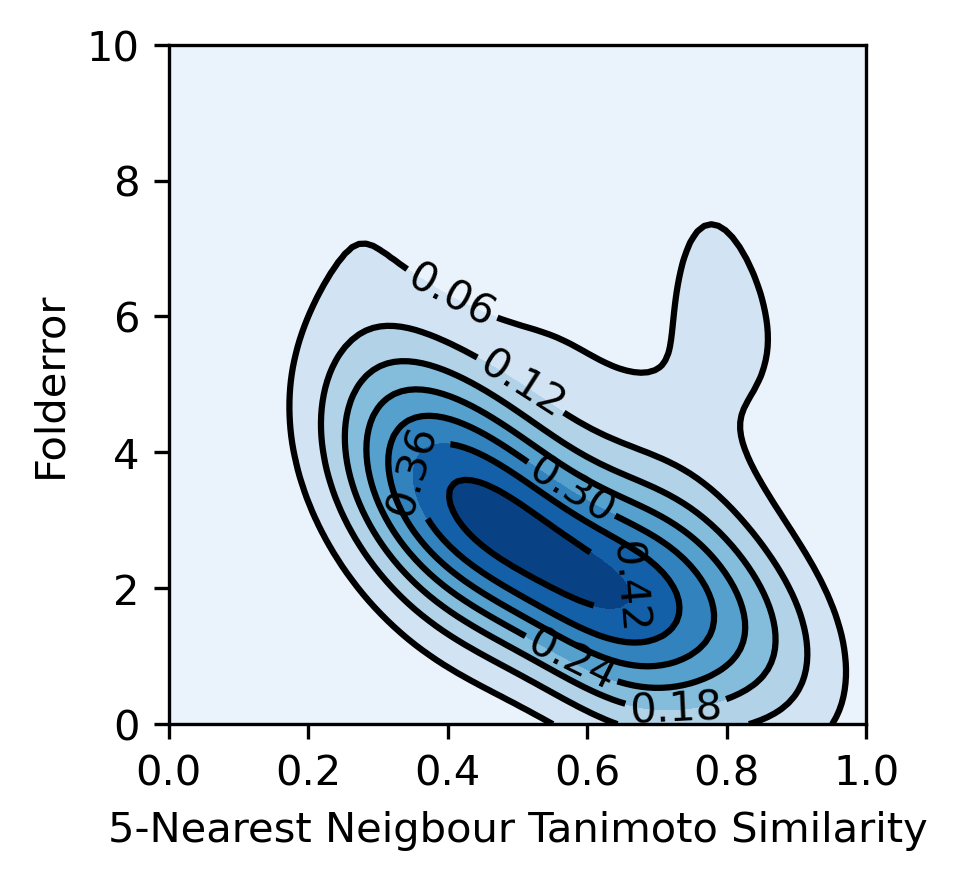

1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=0.05)
{'alpha': 0.001, 'gamma': 0.001}
0.22690403760953826
[[0.25]]
[6.60081092]


<Figure size 900x900 with 0 Axes>

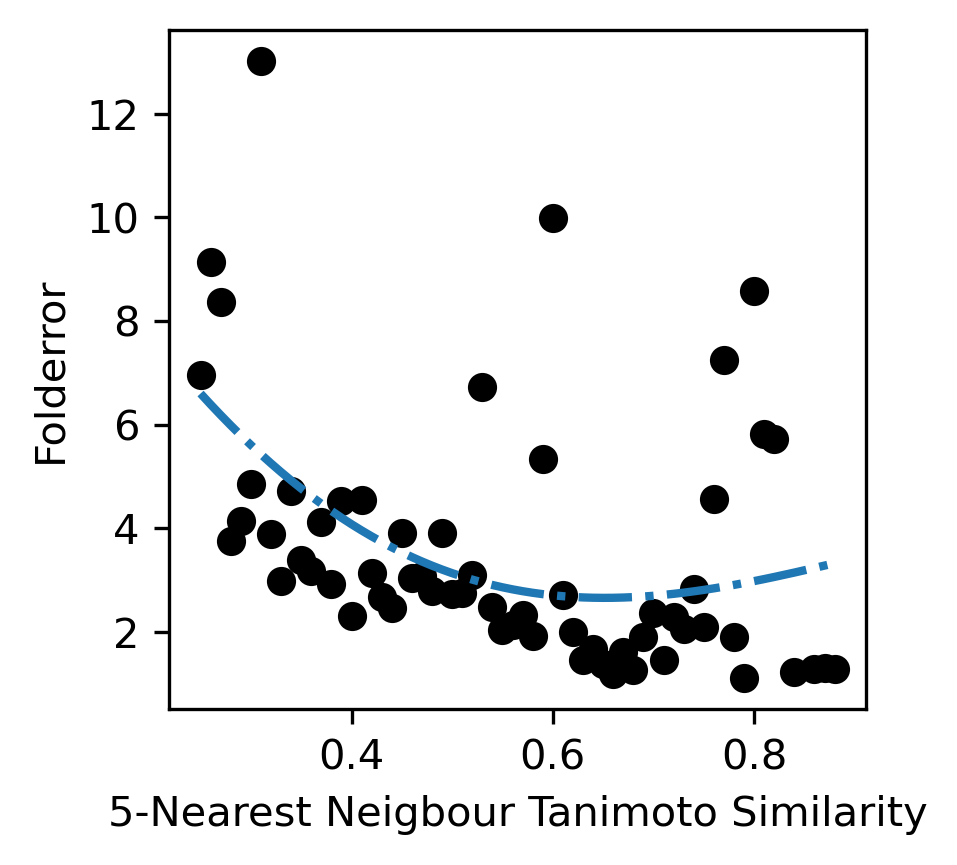

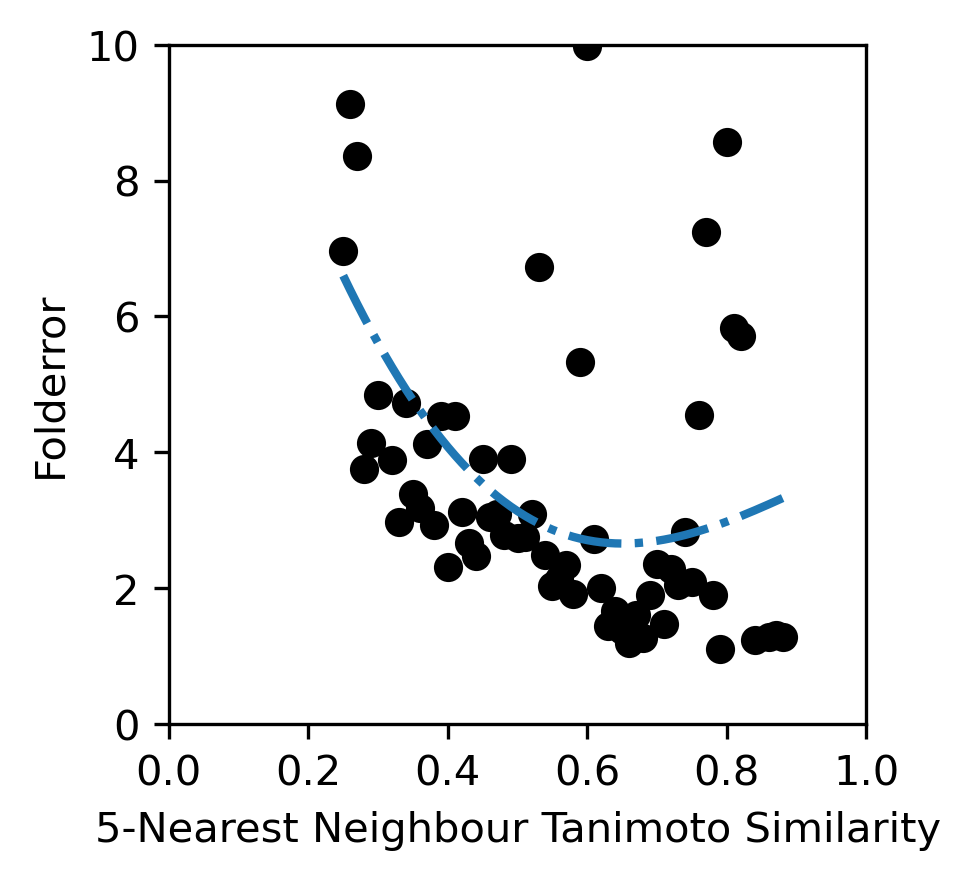

[[0.25]]
[6.60081092]
TS: 0.1 [10.47050503]
TS: 0.25 [6.60081092]
TS: 0.9 [3.42138967]
human_VDss_L_kg
removing points below mean - 1*std:  0.24


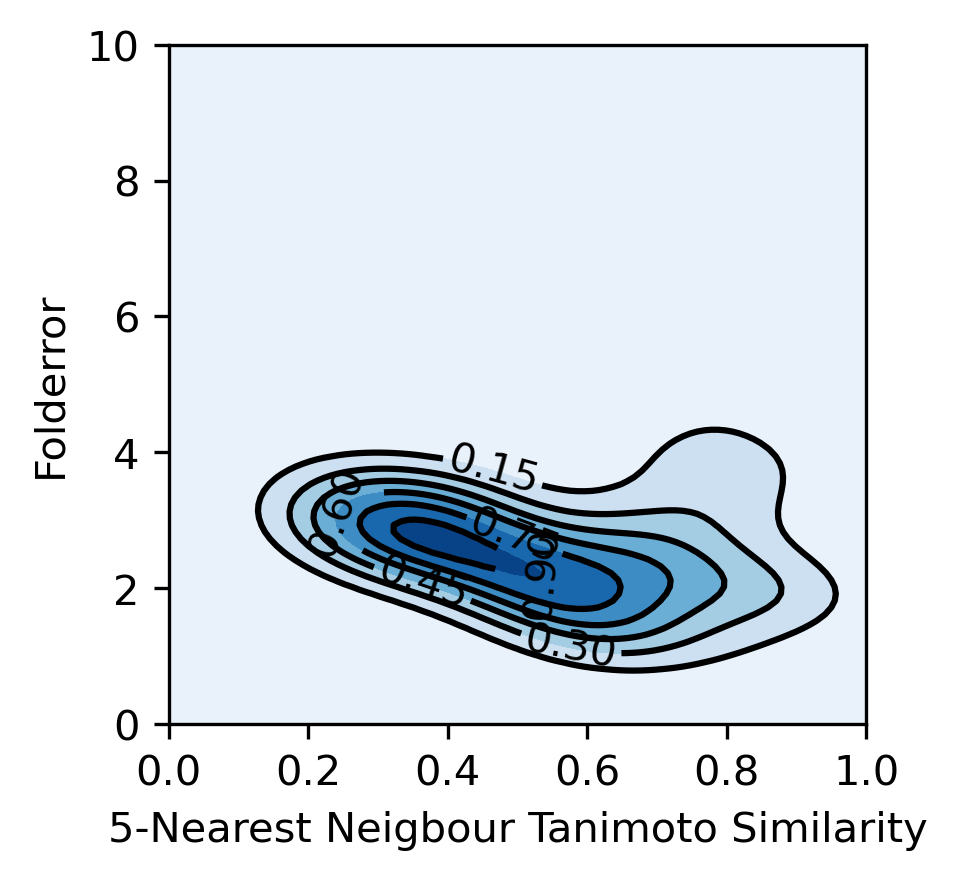

1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=0.05)
{'alpha': 0.01, 'gamma': 0.001}
0.06684953968746443
[[0.24]]
[3.15162475]


<Figure size 900x900 with 0 Axes>

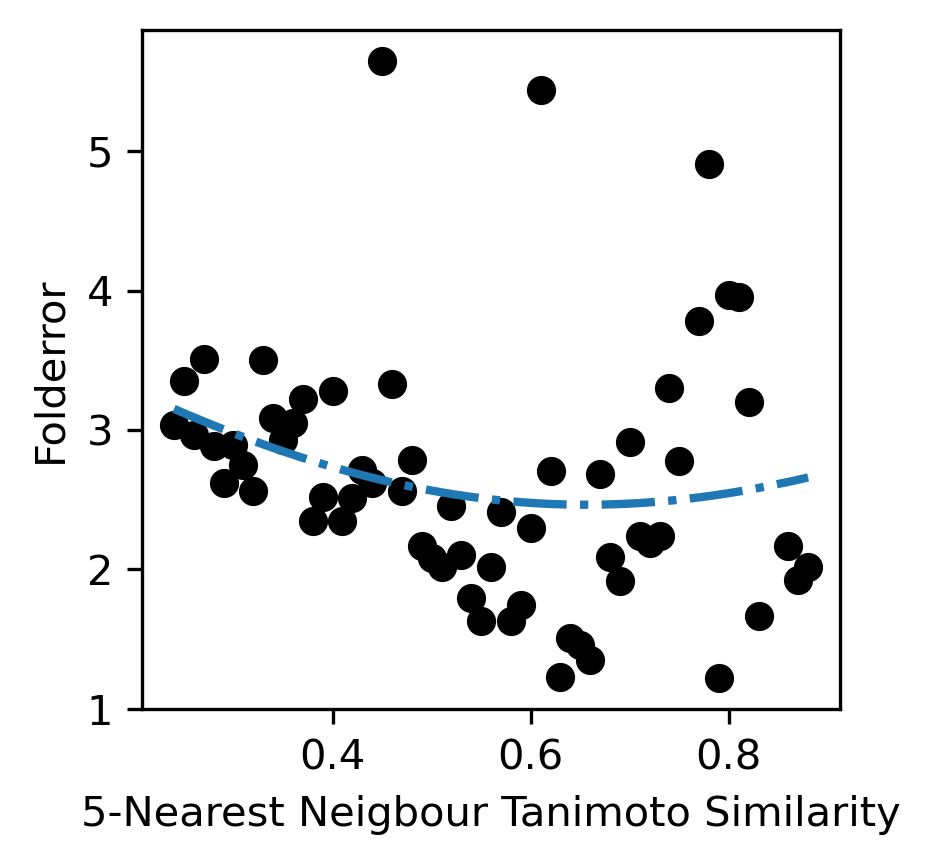

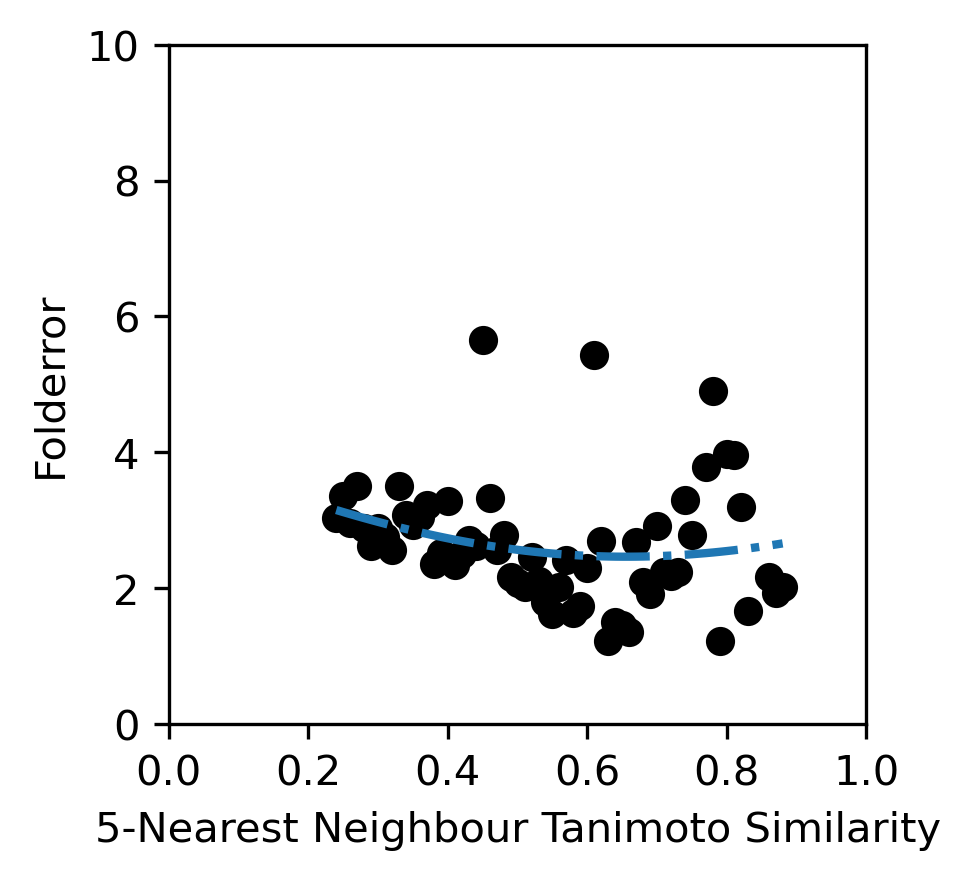

[[0.24]]
[3.15162475]
TS: 0.1 [3.62172651]
TS: 0.25 [3.12116847]
TS: 0.9 [2.69471116]
human_mrt
removing points below mean - 1*std:  0.25


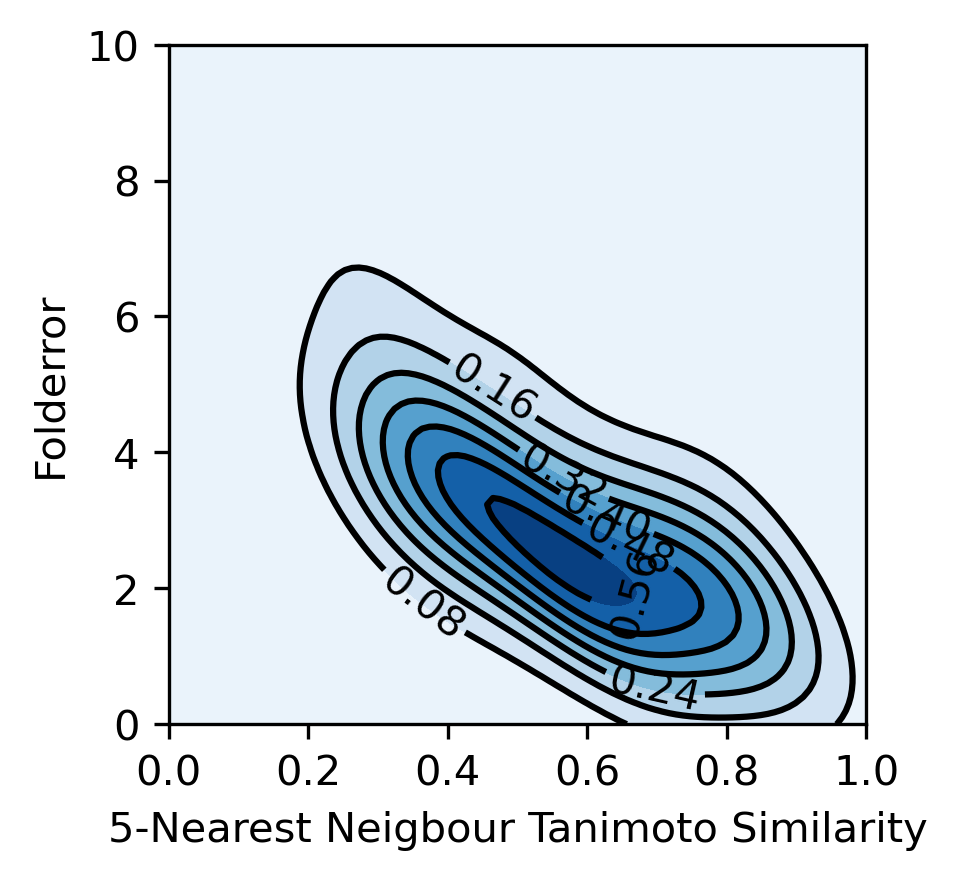

1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=0.05)
{'alpha': 1, 'gamma': 0.001}
0.38166914663925644
[[0.25]]
[4.69628216]


<Figure size 900x900 with 0 Axes>

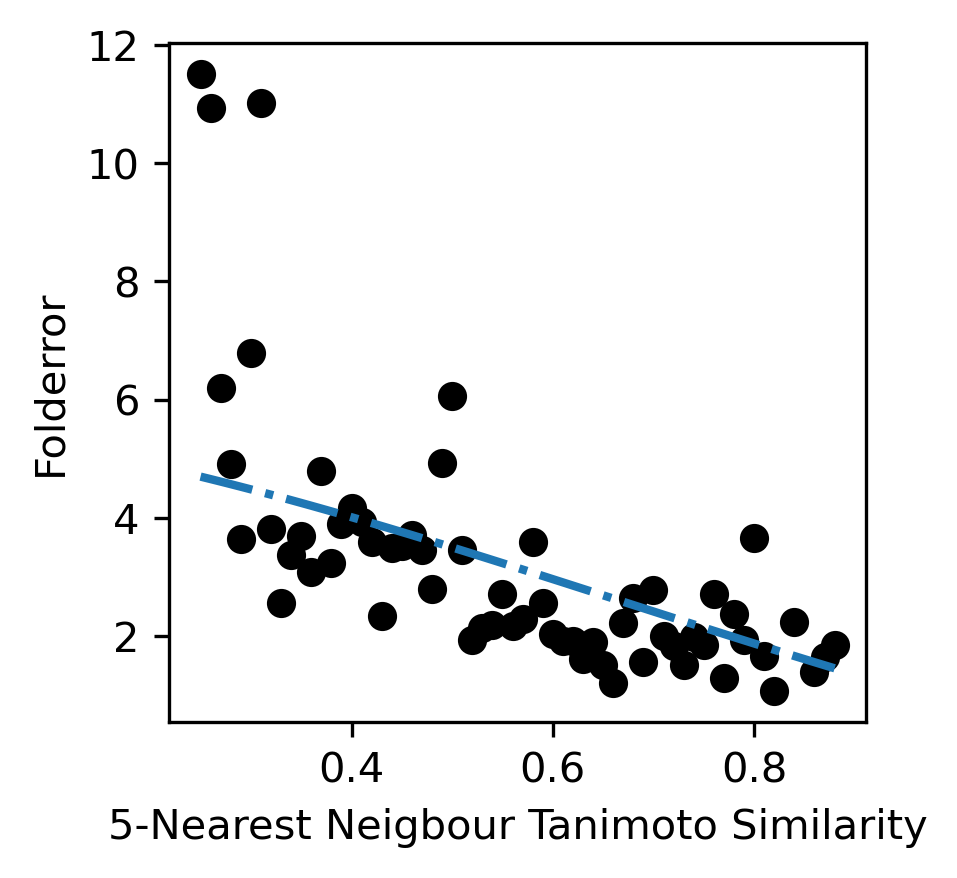

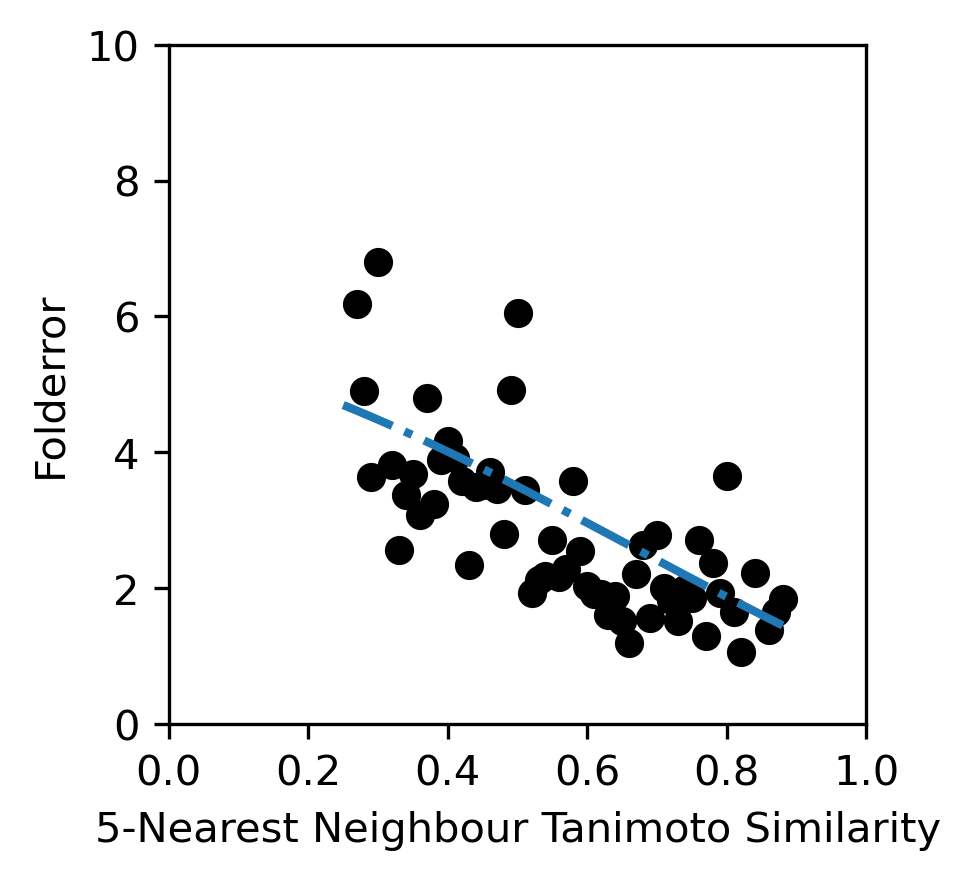

[[0.25]]
[4.69628216]
TS: 0.1 [5.246069]
TS: 0.25 [4.69628216]
TS: 0.9 [1.35047424]
human_thalf
removing points below mean - 1*std:  0.23


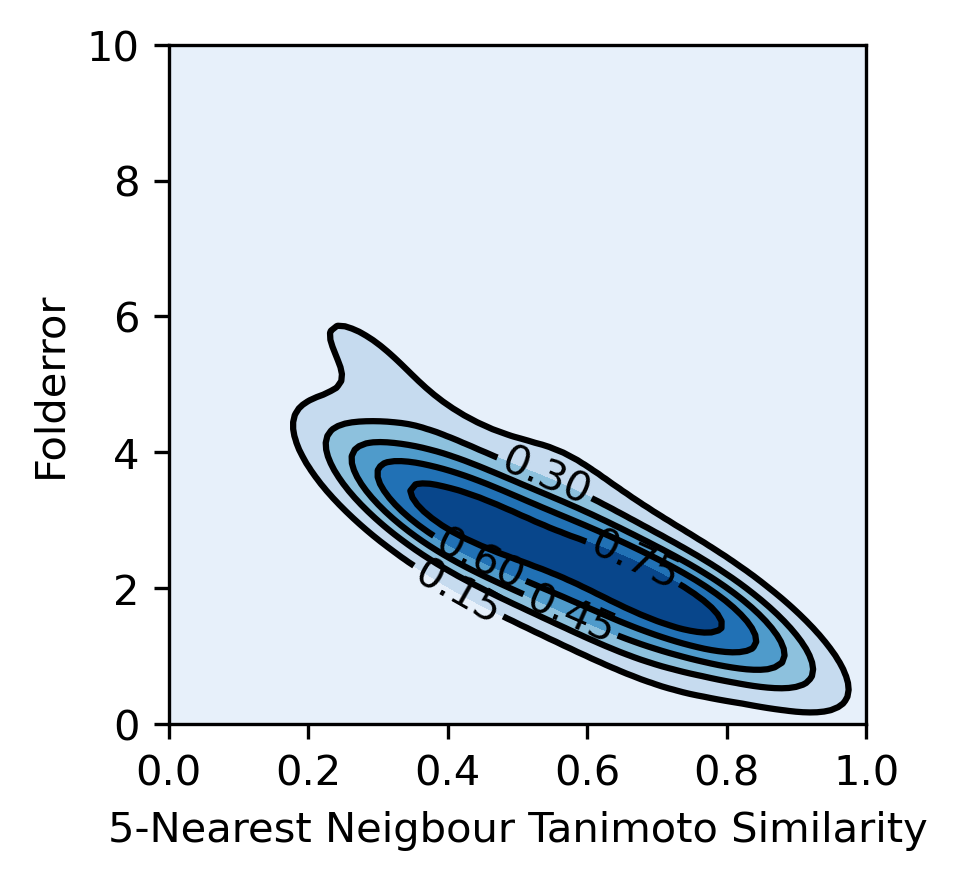

1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=0.05)
{'alpha': 1, 'gamma': 0.001}
0.5181940200127031
[[0.24]]
[3.97450978]


<Figure size 900x900 with 0 Axes>

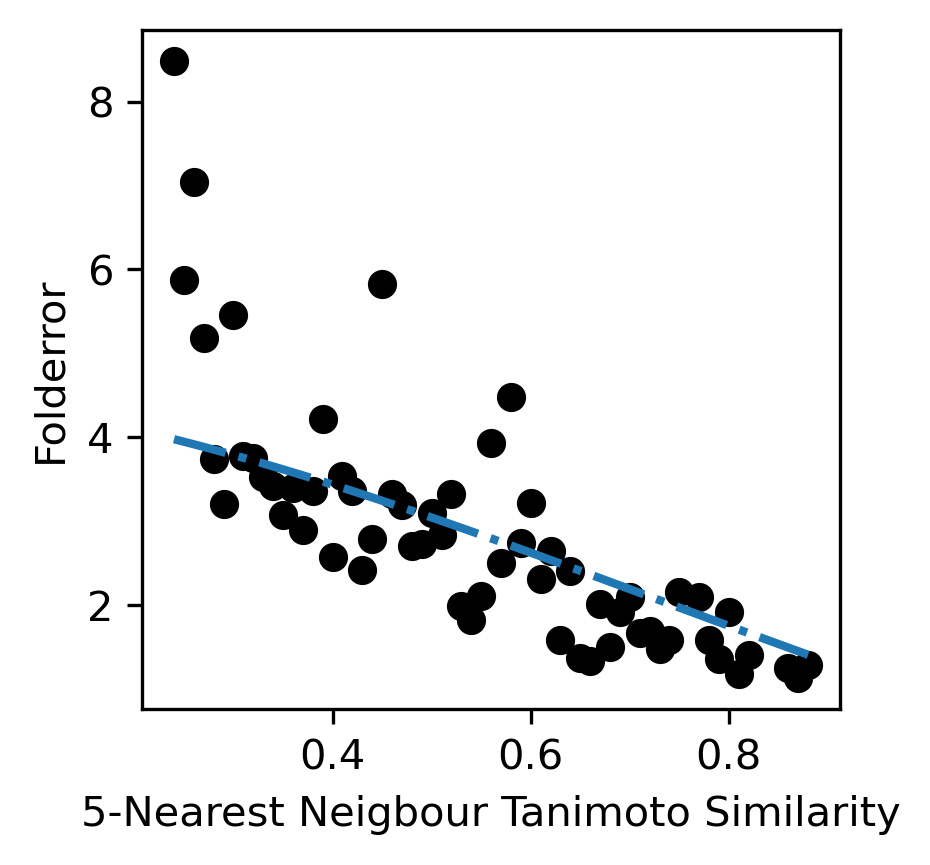

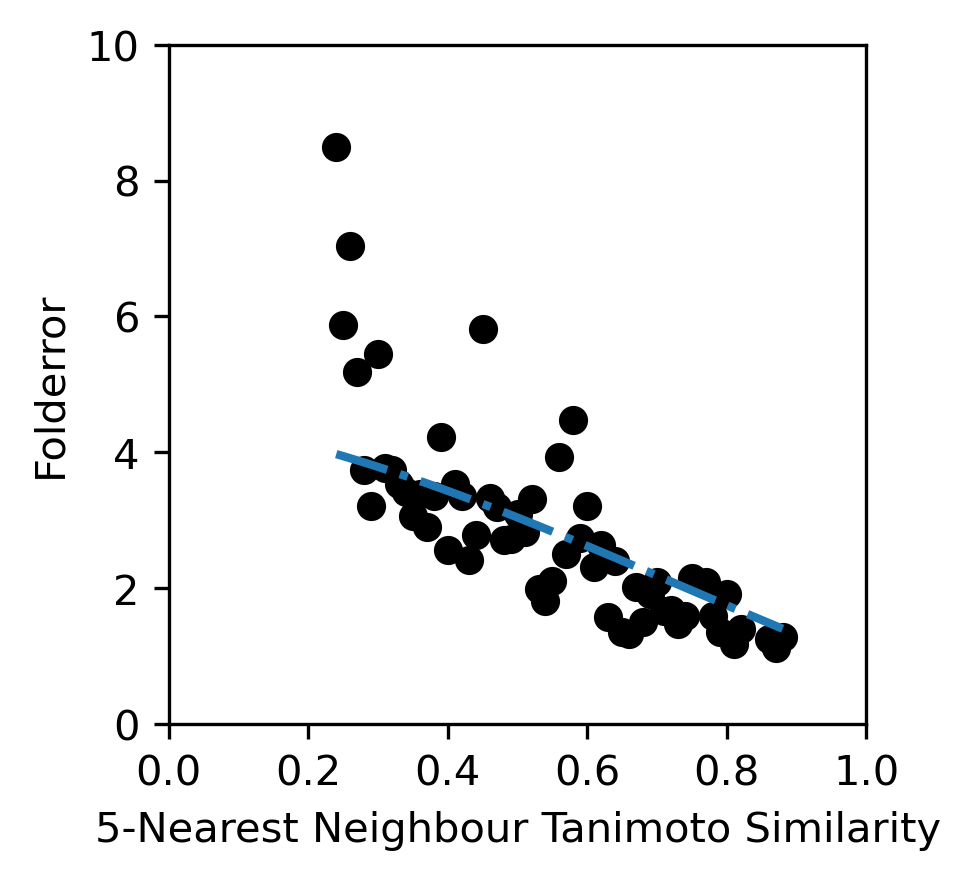

[[0.24]]
[3.97450978]
TS: 0.1 [4.33596192]
TS: 0.25 [3.94435659]
TS: 0.9 [1.31983301]


In [11]:
#Kernel Density Estimate

for endpoint in ["human_CL_mL_min_kg", "human_VDss_L_kg", "human_mrt", "human_thalf"]:
    
    print(endpoint)
    data = data_mean[data_mean["endpoint"]==endpoint].reset_index(drop=True)
    
    #data["MFP_Tc"] = data["MFP_Tc"].apply(round_nearest2)
    
    data = data.groupby("MFP_Tc").mean().reset_index()
    
    mintc= data["MFP_Tc"].mean() - 1*data["MFP_Tc"].std()
    print("removing points below mean - 1*std: ", np.round(mintc, 2))
    
    data = data[data["MFP_Tc"]>mintc]

    x = data["MFP_Tc"].values
    y = data["folderror"].values
    
    
    xmin, xmax = 0, 1
    ymin, ymax = 0, 10

    # Peform the kernel density estimate
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)

    fig = plt.figure(figsize =(3, 3), dpi=300) 
    ax = fig.gca()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    # Contourf plot
    cfset = ax.contourf(xx, yy, f, cmap='Blues')
    ## Or kernel density estimate plot instead of the contourf plot
    #ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
    # Contour plot
    cset = ax.contour(xx, yy, f, colors='k')
    # Label plot
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel('5-Nearest Neigbour Tanimoto Similarity')
    ax.set_ylabel('Folderror')

    plt.show()
    
    x=x.reshape(len(x), 1)
    #Kernel Ridge    
        
    kernel = C()*RBF(length_scale=1) + WhiteKernel(noise_level=0.05)
    print(kernel)
    kernel_ridge = GridSearchCV(KernelRidge(kernel=kernel), cv=10, n_jobs=2, scoring="r2",
                                param_grid={"alpha": [1, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-3, 3, 7)},
    )
    kernel_ridge.fit(x, y)
    print(kernel_ridge.best_params_)
    print(kernel_ridge.score(x,y))
    
    print(x[0].reshape(1,1))
    print(kernel_ridge.predict(x[0].reshape(1,1)))


    pickle.dump(kernel_ridge, open(f"folderror_{endpoint}_generator.sav", 'wb'))
    
    # Plot the predictions of the gaussian process regressor
    fig = plt.figure(figsize =(3, 3), dpi=300) 


    xmin, xmax = 0, 1
    ymin, ymax = 0, 10


    fig = plt.figure(figsize =(3, 3), dpi=300) 
    ax = fig.gca()
    #ax.set_xlim(xmin, xmax)
    #ax.set_ylim(ymin, ymax)

    plt.scatter(
        x,
        y,
        color="black",
        label="Noisy measurements",
    )
    
    plt.plot(
    x,
    kernel_ridge.predict(x),
    label="Kernel ridge",
    linewidth=2,
    linestyle="dashdot")

  
    #plt.legend(loc="lower right")
    plt.xlabel("5-Nearest Neigbour Tanimoto Similarity")
    plt.ylabel("Folderror")
    
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    #Zoom in
    
    fig = plt.figure(figsize =(3, 3), dpi=300) 
    ax = fig.gca()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    plt.scatter(
        x,
        y,
        color="black",
        label="Noisy measurements",
    )

    plt.plot(
    x,
    kernel_ridge.predict(x),
    label="Kernel ridge",
    linewidth=2,
    linestyle="dashdot"
    )

    # plt.legend(loc="lower right")  # This line is removed to hide the legend
    plt.xlabel('5-Nearest Neighbour Tanimoto Similarity')
    plt.ylabel('Folderror')
    
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    loaded = pickle.load(open(f"folderror_{endpoint}_generator.sav", 'rb'))
    print(x[0].reshape(1,1))
    print(loaded.predict(x[0].reshape(1,1)))
    
    
    print("TS: 0.1", loaded.predict([[0.1]]))
    print("TS: 0.25", loaded.predict([[0.25]]))
    print("TS: 0.9", loaded.predict([[0.9]]))

   

human_fup
removing points below mean - 1*std:  0.23


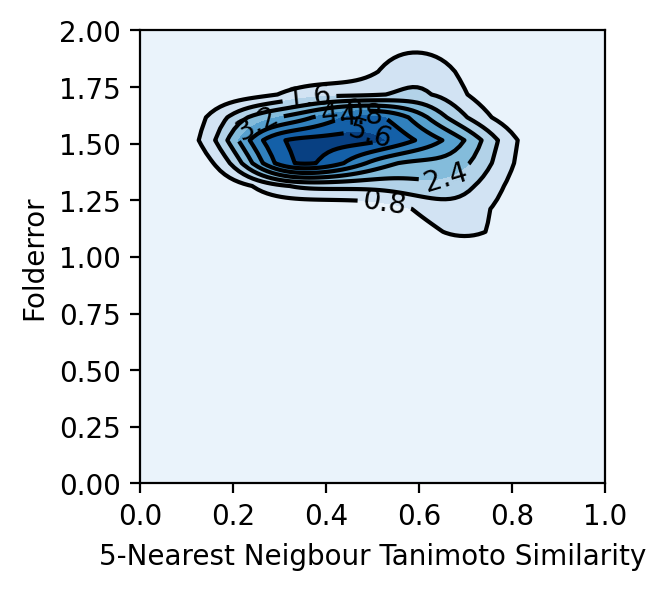

1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=0.05)
{'alpha': 1, 'gamma': 0.001}
0.00204234927828828
[[0.23]]
[1.45481983]


<Figure size 600x600 with 0 Axes>

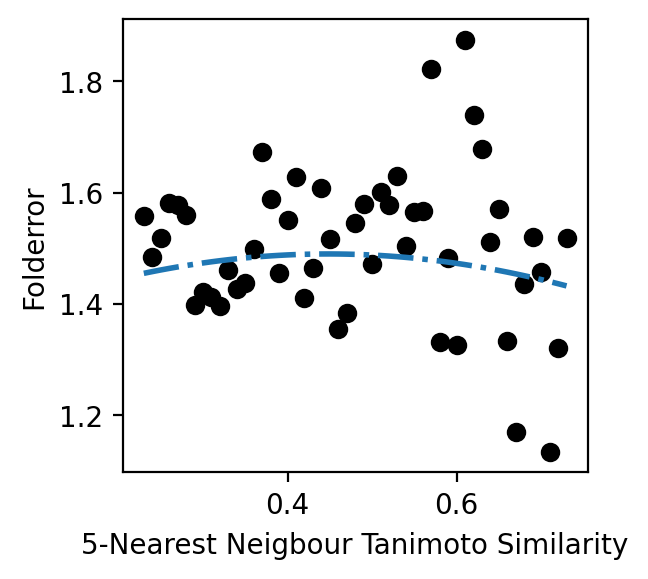

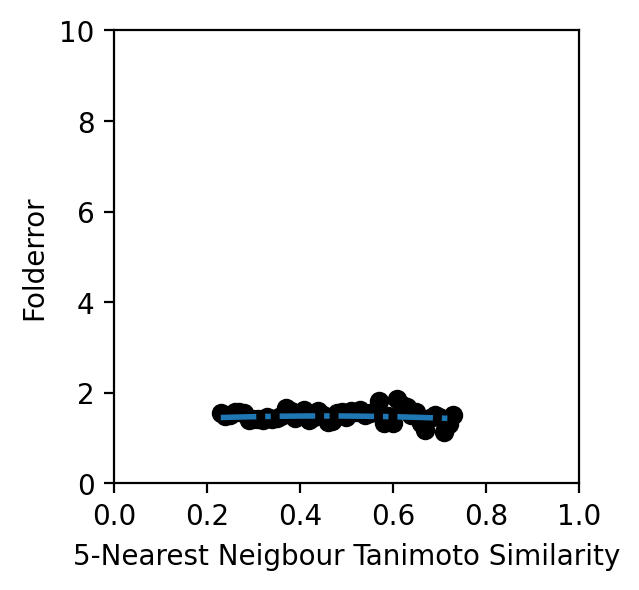

[[0.23]]
[1.45481983]
TS: 0.1 [1.40260022]
TS: 0.25 [1.46085011]
TS: 0.9 [1.34625238]


In [12]:
#Kernel Density Estimate

for endpoint in ["human_fup"]:
    
    print(endpoint)
    data = data_mean[data_mean["endpoint"]==endpoint].reset_index(drop=True)
    
    #data["MFP_Tc"] = data["MFP_Tc"].apply(round_nearest2)
    
    data = data.groupby("MFP_Tc").mean().reset_index()
    
    mintc= data["MFP_Tc"].mean() - 1*data["MFP_Tc"].std()
    print("removing points below mean - 1*std: ", np.round(mintc, 2))
    
    data = data[data["MFP_Tc"]>mintc]

    x = data["MFP_Tc"].values
    y = data["folderror"].values
    
    
    xmin, xmax = 0, 1
    ymin, ymax = 0, 10

    # Peform the kernel density estimate
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)

    fig = plt.figure(figsize =(3, 3), dpi=200) 
    ax = fig.gca()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, 2)
    # Contourf plot
    cfset = ax.contourf(xx, yy, f, cmap='Blues')
    ## Or kernel density estimate plot instead of the contourf plot
    #ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
    # Contour plot
    cset = ax.contour(xx, yy, f, colors='k')
    # Label plot
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel('5-Nearest Neigbour Tanimoto Similarity')
    ax.set_ylabel('Folderror')

    plt.show()
    
    x=x.reshape(len(x), 1)
    #Kernel Ridge    
        
    kernel = C()*RBF(length_scale=1) + WhiteKernel(noise_level=0.05)
    print(kernel)
    kernel_ridge = GridSearchCV(KernelRidge(kernel=kernel), cv=10, n_jobs=2, scoring="r2",
                                param_grid={"alpha": [1, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-3, 3, 7)},
    )
    kernel_ridge.fit(x, y)
    print(kernel_ridge.best_params_)
    print(kernel_ridge.score(x,y))
    
    print(x[0].reshape(1,1))
    print(kernel_ridge.predict(x[0].reshape(1,1)))


    pickle.dump(kernel_ridge, open(f"folderror_{endpoint}_generator.sav", 'wb'))
    
    # Plot the predictions of the gaussian process regressor
    fig = plt.figure(figsize =(3, 3), dpi=200) 


    xmin, xmax = 0, 1
    ymin, ymax = 0, 10


    fig = plt.figure(figsize =(3, 3), dpi=200) 
    ax = fig.gca()
    #ax.set_xlim(xmin, xmax)
    #ax.set_ylim(ymin, ymax)

    plt.scatter(
        x,
        y,
        color="black",
        label="Noisy measurements",
    )
    
    plt.plot(
    x,
    kernel_ridge.predict(x),
    label="Kernel ridge",
    linewidth=2,
    linestyle="dashdot")

  
    #plt.legend(loc="lower right")
    plt.xlabel("5-Nearest Neigbour Tanimoto Similarity")
    plt.ylabel("Folderror")
    
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    #Zoom in
    
    fig = plt.figure(figsize =(3, 3), dpi=200) 
    ax = fig.gca()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    plt.scatter(
        x,
        y,
        color="black",
        label="Noisy measurements",
    )

    plt.plot(
    x,
    kernel_ridge.predict(x),
    label="Kernel ridge",
    linewidth=2,
    linestyle="dashdot")
    
    #plt.legend(loc="lower right")
    plt.xlabel('5-Nearest Neigbour Tanimoto Similarity')
    plt.ylabel('Folderror')
    
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    loaded = pickle.load(open(f"folderror_{endpoint}_generator.sav", 'rb'))
    print(x[0].reshape(1,1))
    print(loaded.predict(x[0].reshape(1,1)))
    
    
    print("TS: 0.1", loaded.predict([[0.1]]))
    print("TS: 0.25", loaded.predict([[0.25]]))
    print("TS: 0.9", loaded.predict([[0.9]]))

   

In [13]:
from sklearn.feature_selection import VarianceThreshold
from itertools import compress
    
def count(pred, true, min, max, endpoint):

    if(endpoint == "human_fup"):
        lst = [abs(a/b) for a, b in zip(pred, true)]
        #print(lst)

        newlist = [x for x in lst if min <= x <= max]
        #print(newlist)

        return (len(newlist)/len(lst)) *100
    
    else:
        lst = [abs(10**a/10**b) for a, b in zip(pred, true)]
        #print(lst)

        newlist = [x for x in lst if min <= x <= max]
        #print(newlist)

        return (len(newlist)/len(lst)) *100
    
    return

def calc_gmfe(pred, true, endpoint):
    
    if(endpoint == "human_fup"):
        
        lst = [abs(np.log10(a/b)) for a, b in zip(pred, true)]
        mean_abs= np.mean(lst)
        return (10**mean_abs)
    
    else: 
        lst = [abs(np.log10(10**a/10**b)) for a, b in zip(pred, true)]
        mean_abs= np.mean(lst)
        
        return (10** mean_abs)
    
    return
                         
def median_fold_change_error(pred, true, endpoint):
                         
    if (endpoint == "human_fup"):
        lst = [abs(np.log10(a/b)) for a, b in zip(pred, true)]
        median_abs= np.median(lst) 
        return (np.e**median_abs)
    
    else:
        lst = [abs(np.log10(10**a/10**b)) for a, b in zip(pred, true)]
        median_abs= np.median(lst) 
        return (np.e**median_abs)
    
    return
                          
def calc_bias(pred, true, endpoint):
                          
    if (endpoint == "human_fup"):
        lst = [(a - b) for a, b in zip(pred, true)]                 
        bias= np.median(lst)
        return bias
    
    else:
        lst = [(10**a - 10**b) for a, b in zip(pred, true)]                 
        bias= np.median(lst)
        return bias
    
    return

human_VDss_L_kg
1249
2-fold :  57.56605284227382
3-fold :  75.5004003202562
5-fold :  89.51160928742993
gmfe :  2.1132991506860748
mfe :  1.278202013052475
bias :  0.03379882045758223
rmse  0.4331120985953029
r2  0.5418160026386168


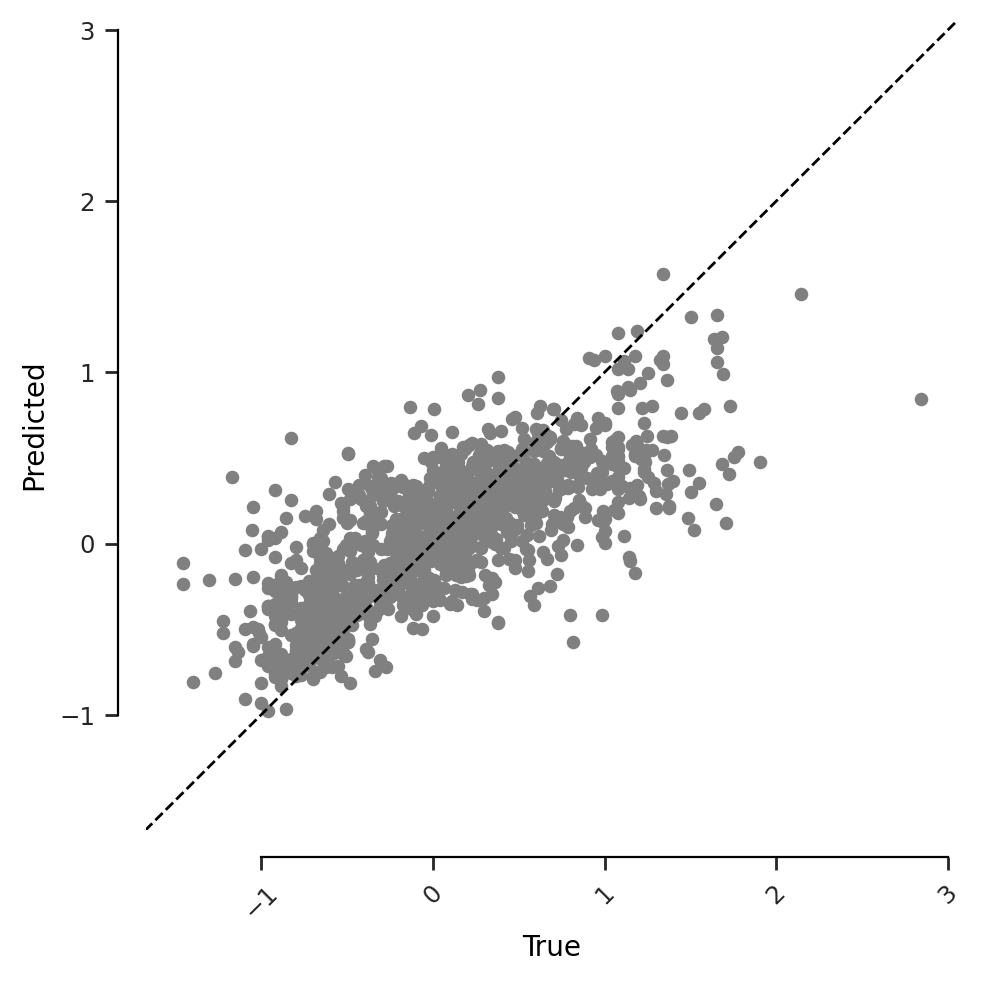

human_CL_mL_min_kg
1281
2-fold :  51.60031225604996
3-fold :  70.2576112412178
5-fold :  85.08977361436378
gmfe :  2.4615476854056606
mfe :  1.3365103242440703
bias :  -0.2943029036620173
rmse  0.5382458108109652
r2  0.31183279810859177


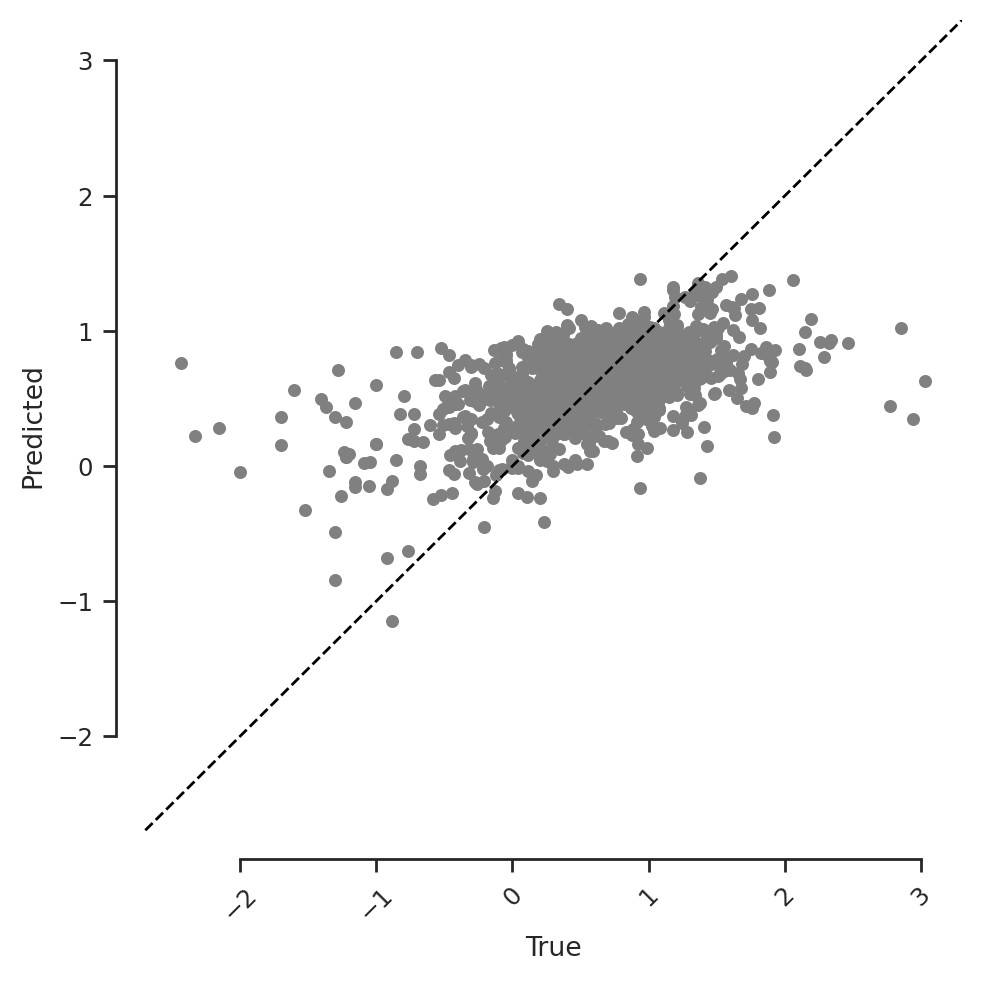

human_fup
879
2-fold :  55.51763367463026
3-fold :  67.91808873720136
5-fold :  78.2707622298066
gmfe :  2.7422357201325513
mfe :  1.2746508825060685
bias :  0.04131857834622282
rmse  0.20836564571414942
r2  0.6261198372477654


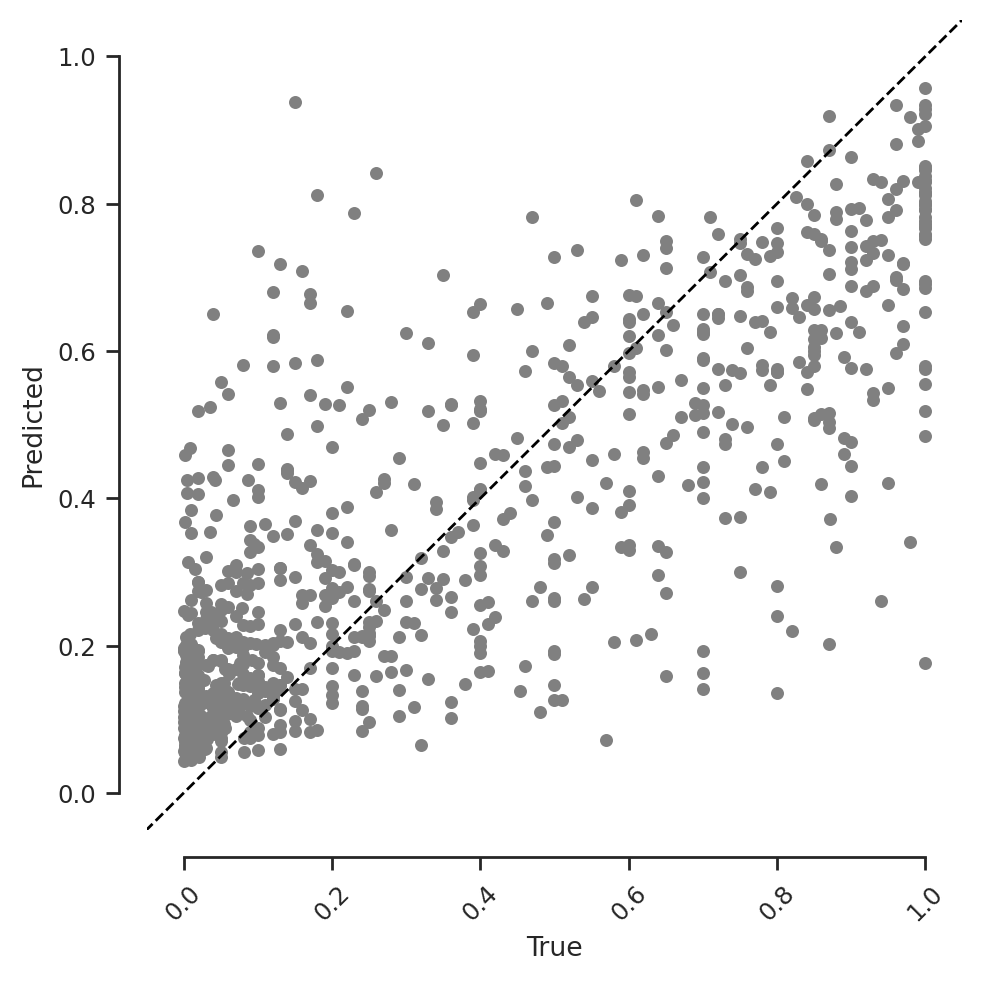

human_mrt
1243
2-fold :  49.879324215607404
3-fold :  70.87691069991955
5-fold :  84.070796460177
gmfe :  2.480043066645149
mfe :  1.3513231447286074
bias :  0.06959051149271023
rmse  0.5397099164814277
r2  0.29273613561227985


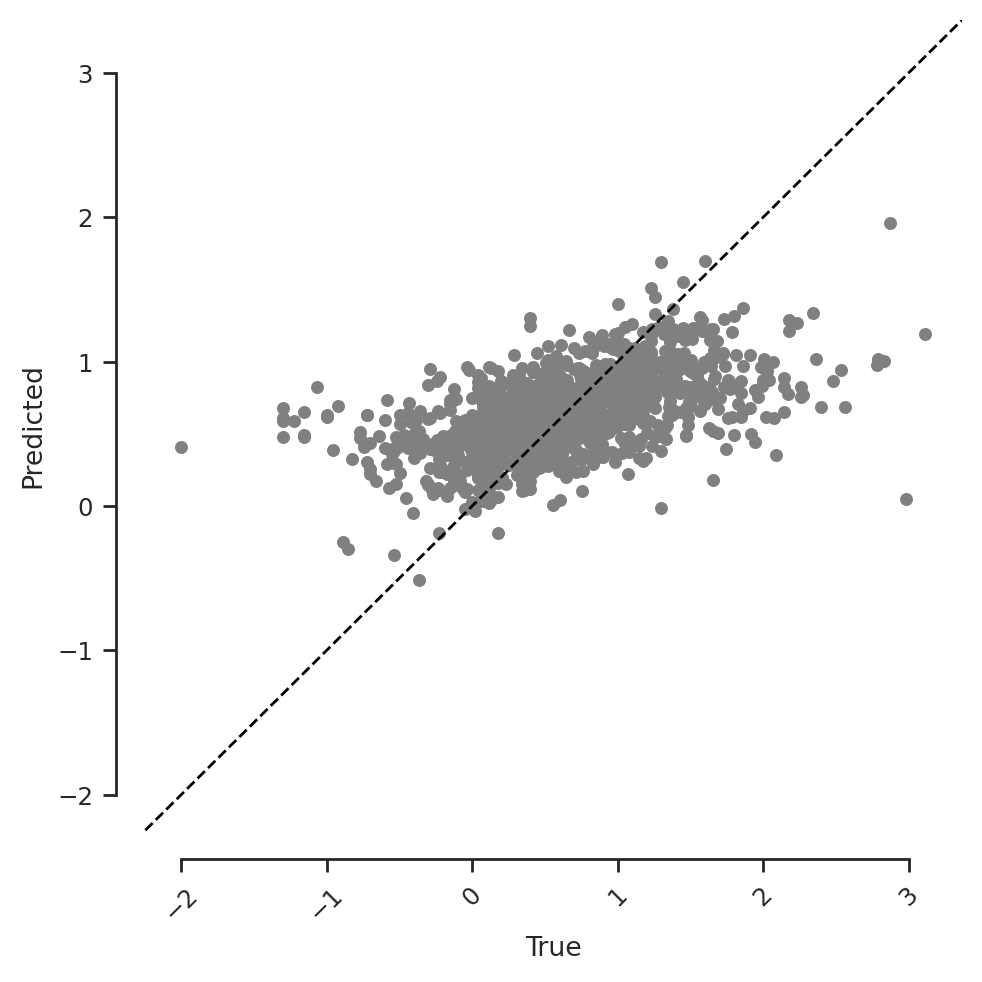

human_thalf
1265
2-fold :  51.067193675889335
3-fold :  72.49011857707511
5-fold :  86.08695652173914
gmfe :  2.413636566329357
mfe :  1.339301322597261
bias :  0.24510702730825895
rmse  0.5149333962464673
r2  0.3169609493545552


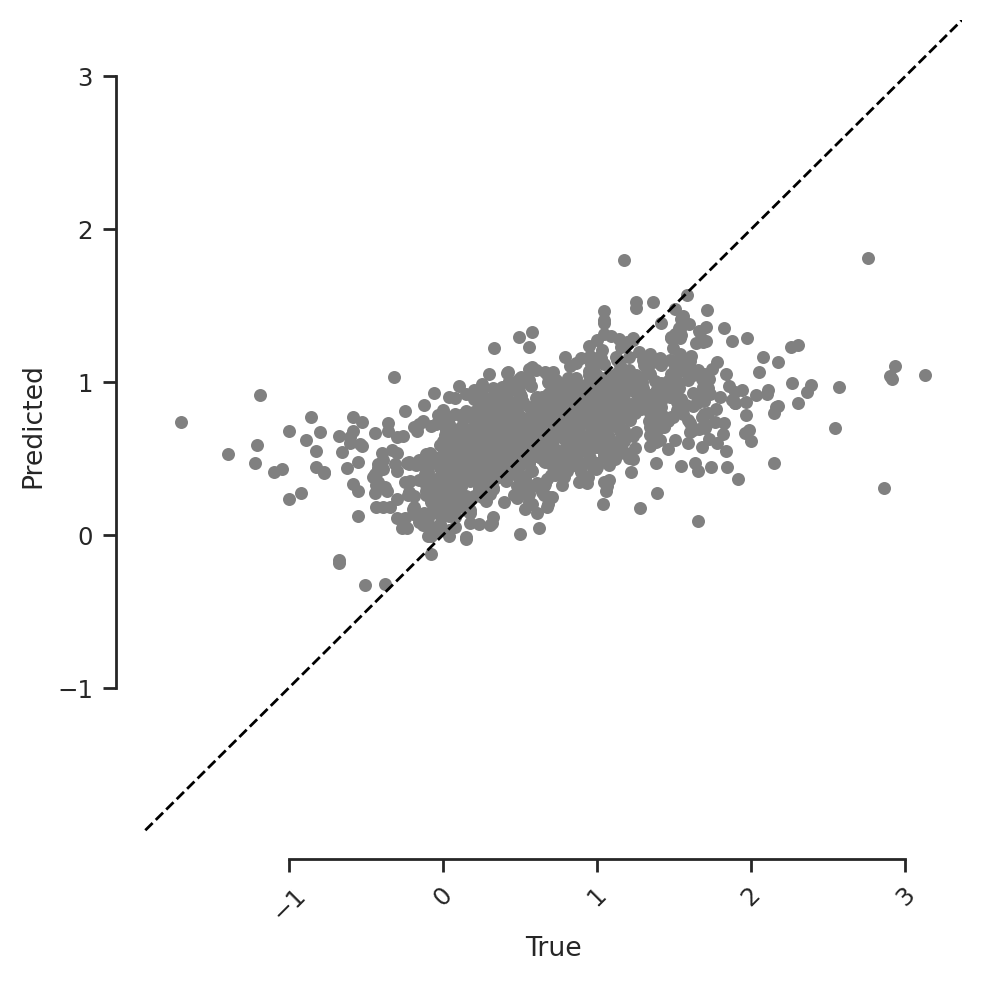

In [14]:
for endpoint in ["human_VDss_L_kg","human_CL_mL_min_kg", "human_fup", "human_mrt", "human_thalf"]:
    print(endpoint)
    
    Y_test = df[df["endpoint"]==endpoint].groupby("smiles_r").mean()["true"].values
    y_pred = df[df["endpoint"]==endpoint].groupby("smiles_r").mean()["pred"].values
    print(len(y_pred))

    fold_2= count(y_pred, Y_test, 0.5, 2, endpoint)
    fold_3= count(y_pred, Y_test, 1/3, 3, endpoint)
    fold_5= count(y_pred, Y_test, 1/5, 5, endpoint)
    gmfe = calc_gmfe(y_pred, Y_test, endpoint)
    mfe = median_fold_change_error(y_pred, Y_test, endpoint)
    bias = calc_bias(y_pred, Y_test, endpoint)

    print("2-fold : ", fold_2)
    print("3-fold : ", fold_3)
    print("5-fold : ", fold_5)
    print("gmfe : ", gmfe)
    print("mfe : ", mfe)
    print("bias : ", bias)

    rmse = sqrt(mean_squared_error(Y_test, y_pred))
    print('rmse ',rmse)
    r2 = r2_score(Y_test, y_pred)
    print('r2 ',r2)
    
    fig = plt.figure(figsize =(5, 5), dpi=200) 

    plt.scatter(Y_test,  y_pred, color = 'gray', s=15) # s controls point size
    xleft, xright = plt.xlim()
    ybottom, ytop = plt.ylim()

    plt.xlim(min(xleft,ybottom) ,max(xright,ytop))
    plt.ylim(min(xleft,ybottom),max(xright,ytop))

    #add y=x line
    plt.plot([min(xleft,ybottom)-2,max(xright,ytop)],[min(xleft,ybottom)-2,max(xright,ytop)], lw=1, color='black', linestyle='dashed')

    sns.set_context("paper", font_scale=1)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title("")

    sns.set_style('ticks')
    sns.despine(offset=10, trim=True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

human_VDss_L_kg
164
2-fold :  75.0
3-fold :  87.1951219512195
5-fold :  95.1219512195122
gmfe :  1.7272653789234524
mfe :  1.1632793715332905
bias :  -0.006477344807459887
rmse  0.3490766481780032
r2  0.779297911288718


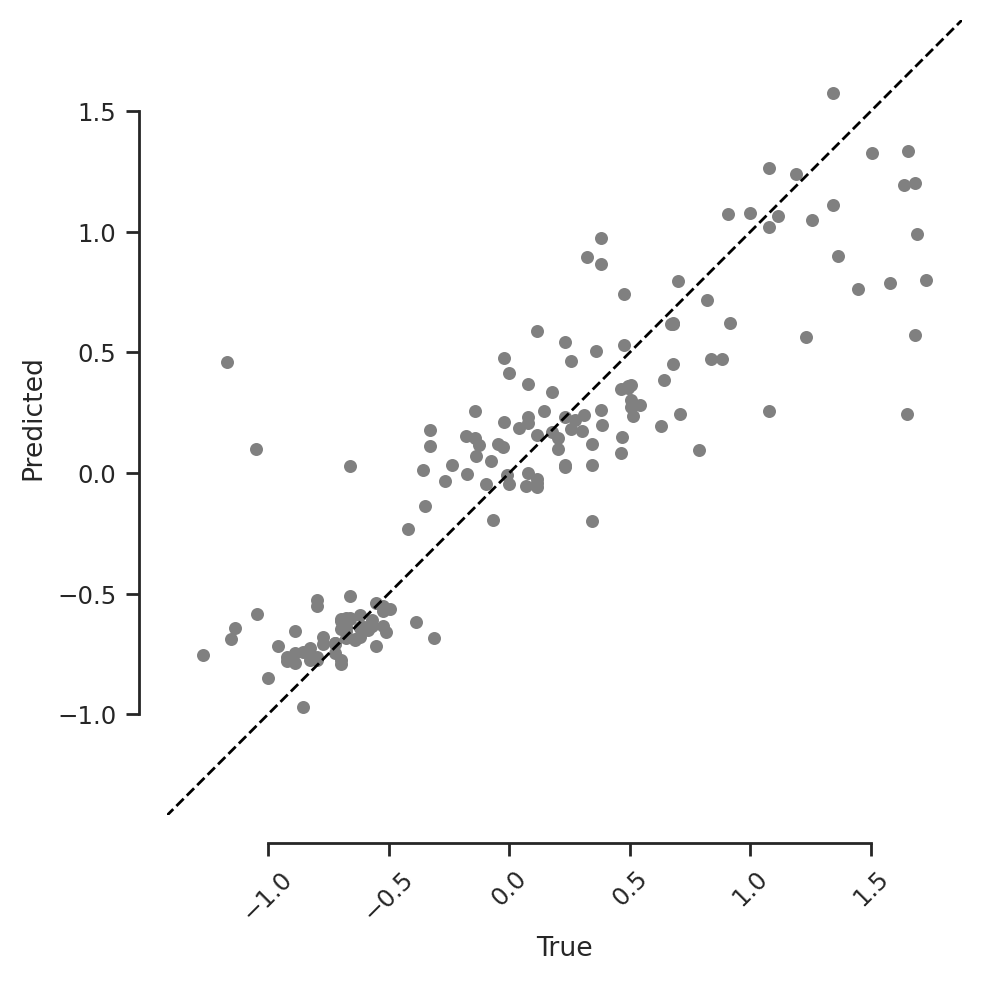

human_CL_mL_min_kg
169
2-fold :  68.04733727810651
3-fold :  84.02366863905326
5-fold :  92.89940828402366
gmfe :  1.8151824021823049
mfe :  1.189654893925239
bias :  -0.06932936870855899
rmse  0.38375237695891407
r2  0.5513715125147574


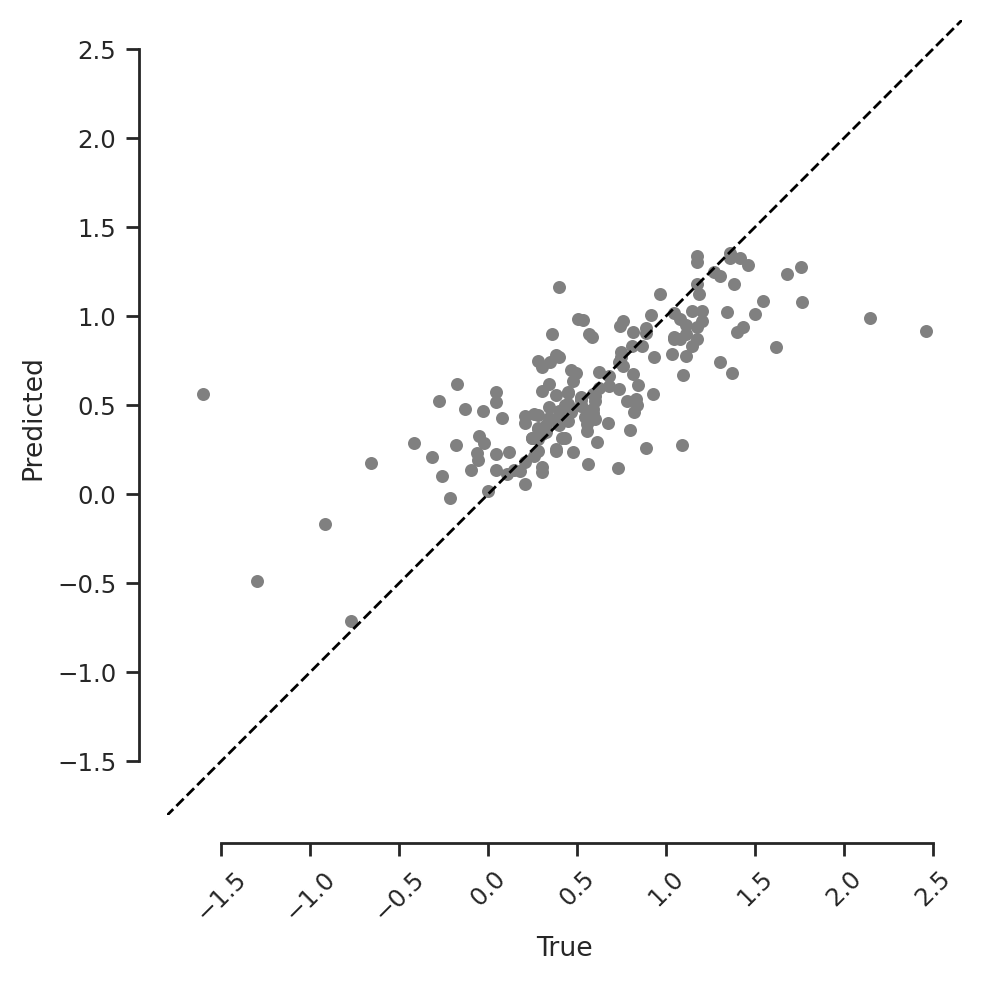

human_fup
85
2-fold :  68.23529411764706
3-fold :  81.17647058823529
5-fold :  94.11764705882352
gmfe :  1.881433220052848
mfe :  1.1603809917142365
bias :  0.0025601400060155655
rmse  0.2047644367638187
r2  0.5337601543575907


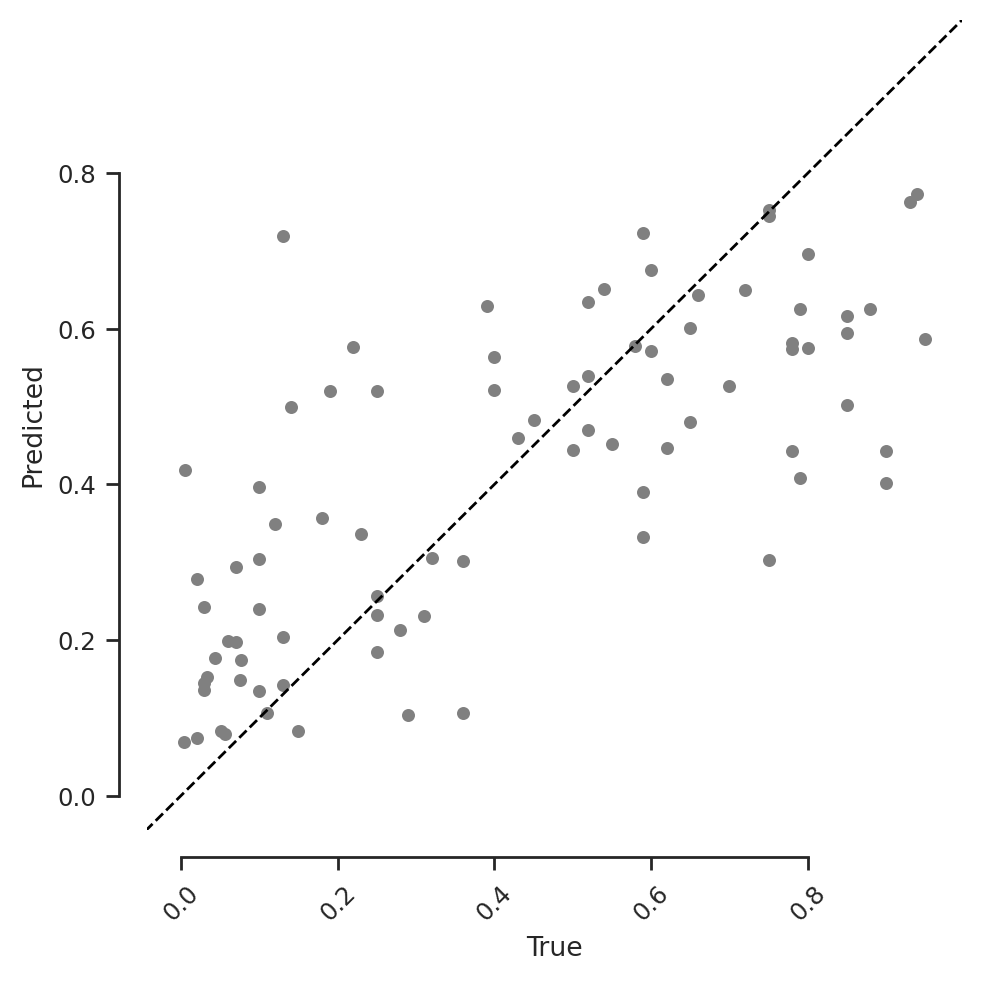

human_mrt
157
2-fold :  67.51592356687898
3-fold :  84.07643312101911
5-fold :  94.26751592356688
gmfe :  1.8407733374353923
mfe :  1.216610313026976
bias :  -0.0004007653038513581
rmse  0.3604897365989377
r2  0.6433969031953022


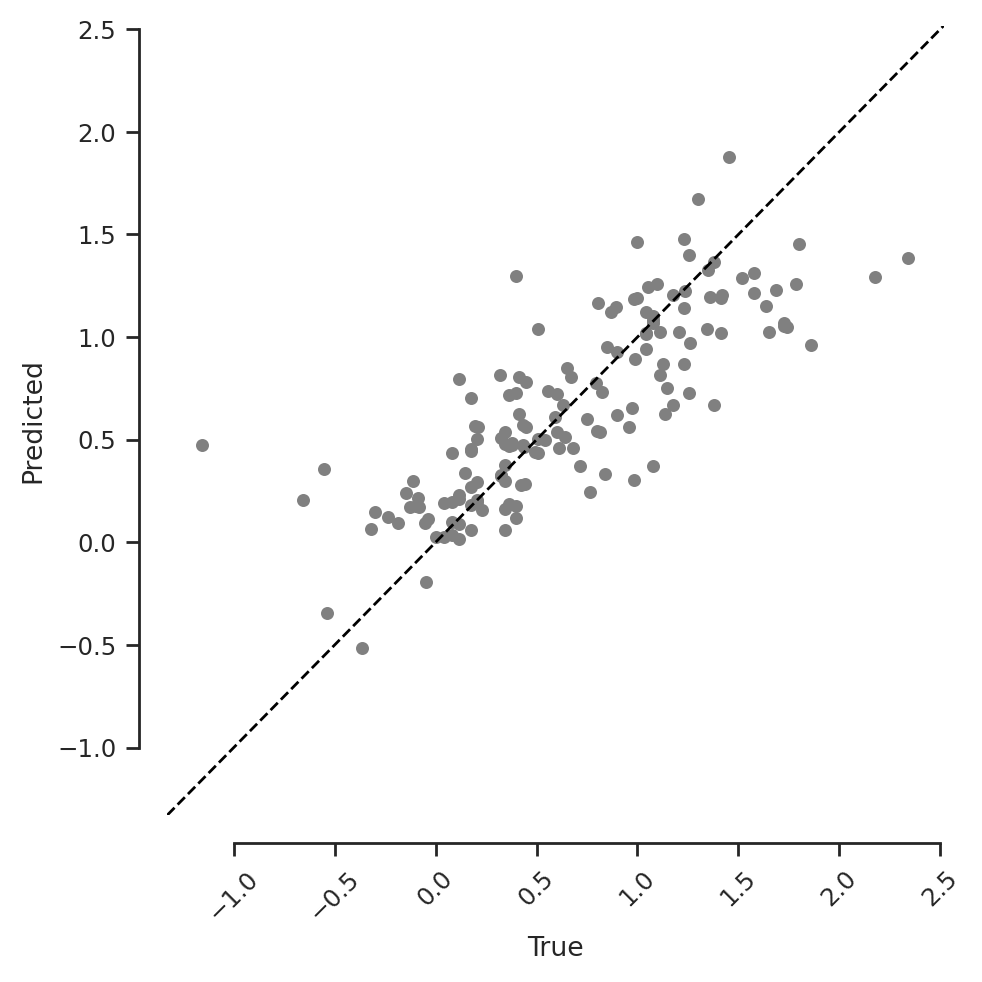

human_thalf
164
2-fold :  71.95121951219512
3-fold :  85.97560975609755
5-fold :  95.1219512195122
gmfe :  1.8456091553699123
mfe :  1.2234106845377755
bias :  0.17510213784712417
rmse  0.37152354828026746
r2  0.6303683750826841


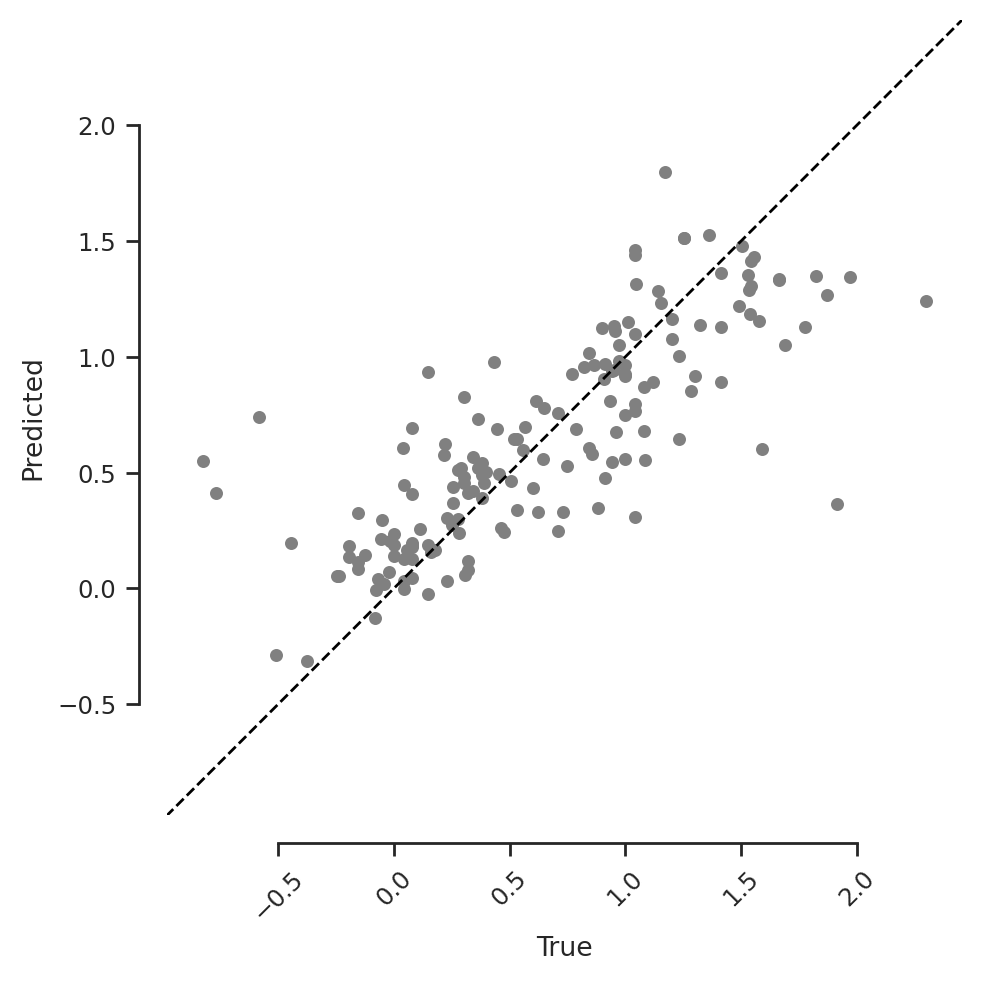

In [15]:
#Applicability Domain

for endpoint in ["human_VDss_L_kg","human_CL_mL_min_kg", "human_fup", "human_mrt", "human_thalf"]:
    print(endpoint)
    
    data=df[df["MFP_Tc"]>0.55]
    Y_test = data[data["endpoint"]==endpoint].groupby("smiles_r").mean()["true"].values
    y_pred = data[data["endpoint"]==endpoint].groupby("smiles_r").mean()["pred"].values
    print(len(y_pred))

    fold_2= count(y_pred, Y_test, 0.5, 2, endpoint)
    fold_3= count(y_pred, Y_test, 1/3, 3, endpoint)
    fold_5= count(y_pred, Y_test, 1/5, 5, endpoint)
    gmfe = calc_gmfe(y_pred, Y_test, endpoint)
    mfe = median_fold_change_error(y_pred, Y_test, endpoint)
    bias = calc_bias(y_pred, Y_test, endpoint)

    print("2-fold : ", fold_2)
    print("3-fold : ", fold_3)
    print("5-fold : ", fold_5)
    print("gmfe : ", gmfe)
    print("mfe : ", mfe)
    print("bias : ", bias)

    rmse = sqrt(mean_squared_error(Y_test, y_pred))
    print('rmse ',rmse)
    r2 = r2_score(Y_test, y_pred)
    print('r2 ',r2)

    fig = plt.figure(figsize =(5, 5), dpi=200) 

    plt.scatter(Y_test,  y_pred, color = 'gray', s=15) # s controls point size
    xleft, xright = plt.xlim()
    ybottom, ytop = plt.ylim()

    plt.xlim(min(xleft,ybottom) ,max(xright,ytop))
    plt.ylim(min(xleft,ybottom),max(xright,ytop))

    #add y=x line
    plt.plot([min(xleft,ybottom)-2,max(xright,ytop)],[min(xleft,ybottom)-2,max(xright,ytop)], lw=1, color='black', linestyle='dashed')

    sns.set_context("paper", font_scale=1)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title("")

    sns.set_style('ticks')
    sns.despine(offset=10, trim=True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

human_VDss_L_kg
731
2-fold :  63.064295485636116
3-fold :  80.30095759233926
5-fold :  91.92886456908344
gmfe :  1.9547318147738646
mfe :  1.242441721649736
bias :  0.033601875796811065
rmse  0.3994134454146954
r2  0.6273385122181159


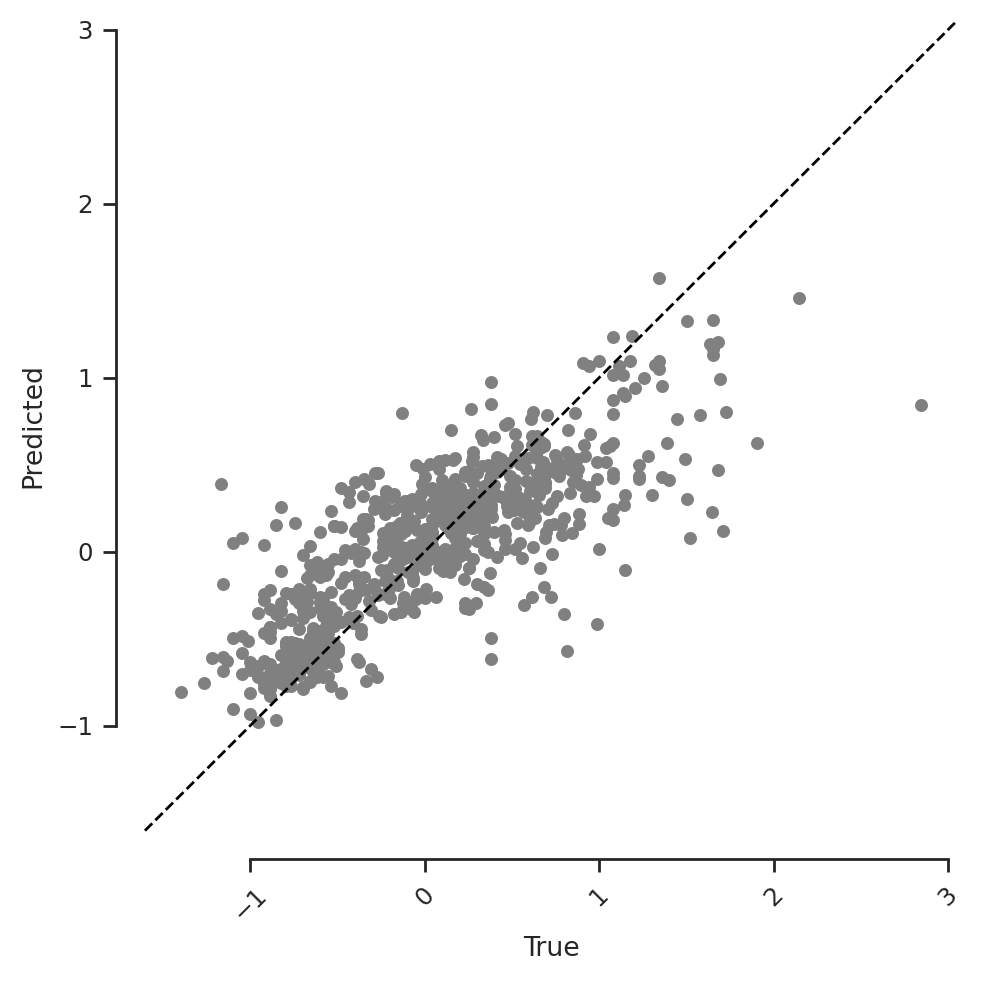

human_CL_mL_min_kg
764
2-fold :  56.54450261780105
3-fold :  76.04712041884817
5-fold :  88.08900523560209
gmfe :  2.2029788210468677
mfe :  1.2913873007357812
bias :  -0.16811569347396438
rmse  0.4747230301992949
r2  0.4313384479607345


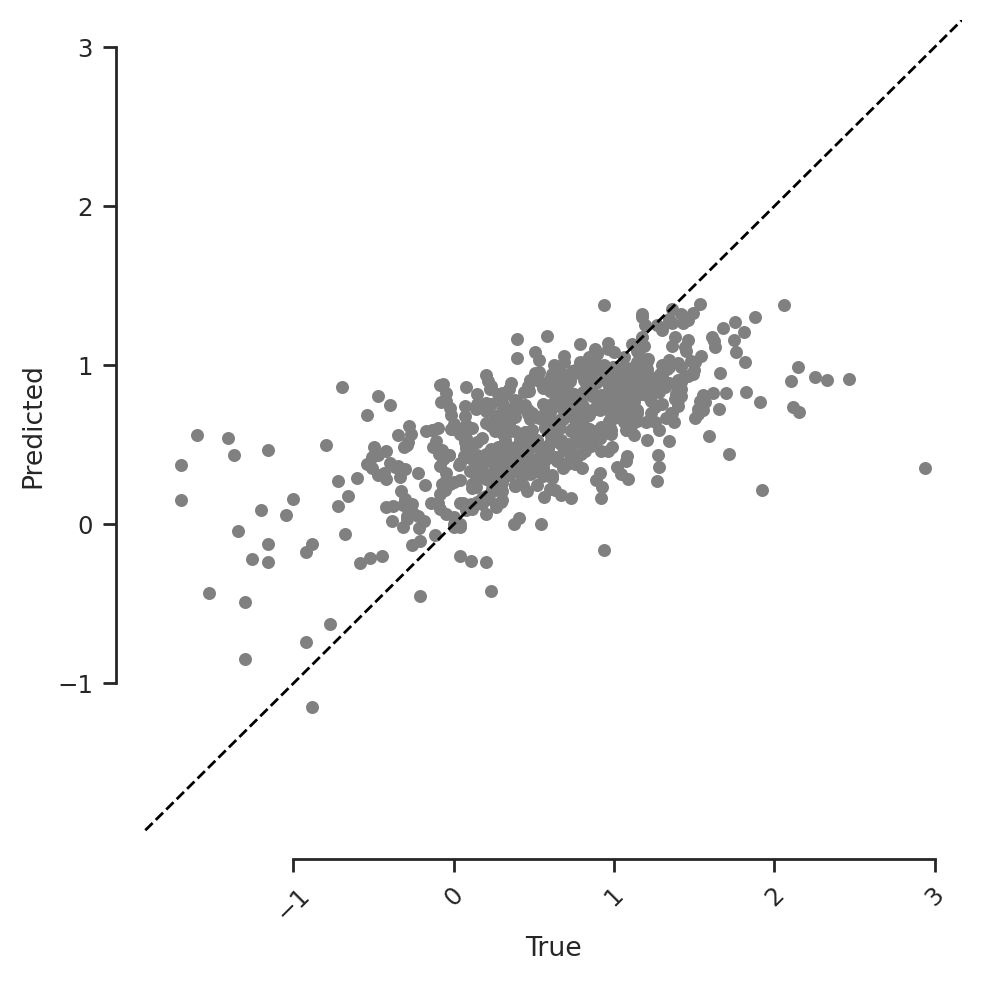

human_fup
501
2-fold :  61.27744510978044
3-fold :  72.85429141716567
5-fold :  83.63273453093812
gmfe :  2.2944159767868286
mfe :  1.2084256050808162
bias :  0.015539649035931635
rmse  0.1984815426096218
r2  0.6563594076900803


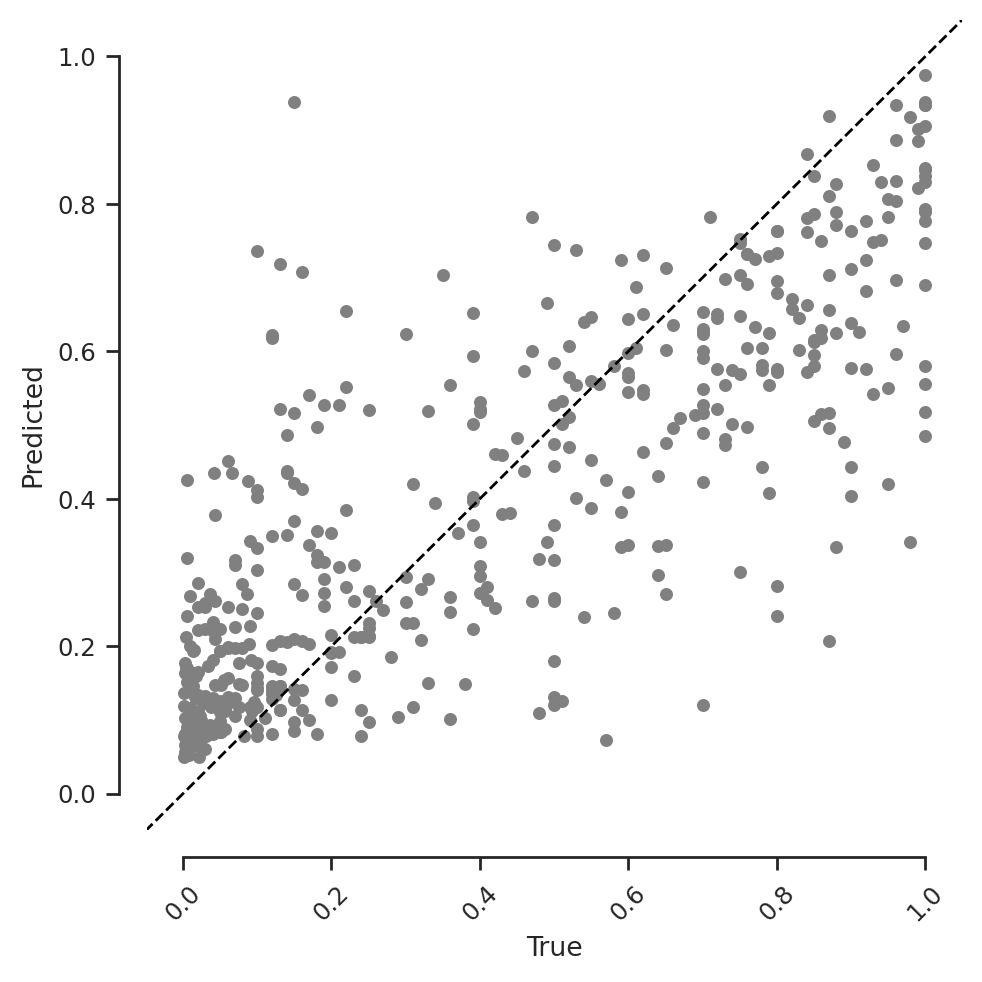

human_mrt
730
2-fold :  56.43835616438356
3-fold :  76.43835616438356
5-fold :  88.4931506849315
gmfe :  2.1940530203228934
mfe :  1.2970477513525935
bias :  0.009194322652469777
rmse  0.47375544054356467
r2  0.3907698314977346


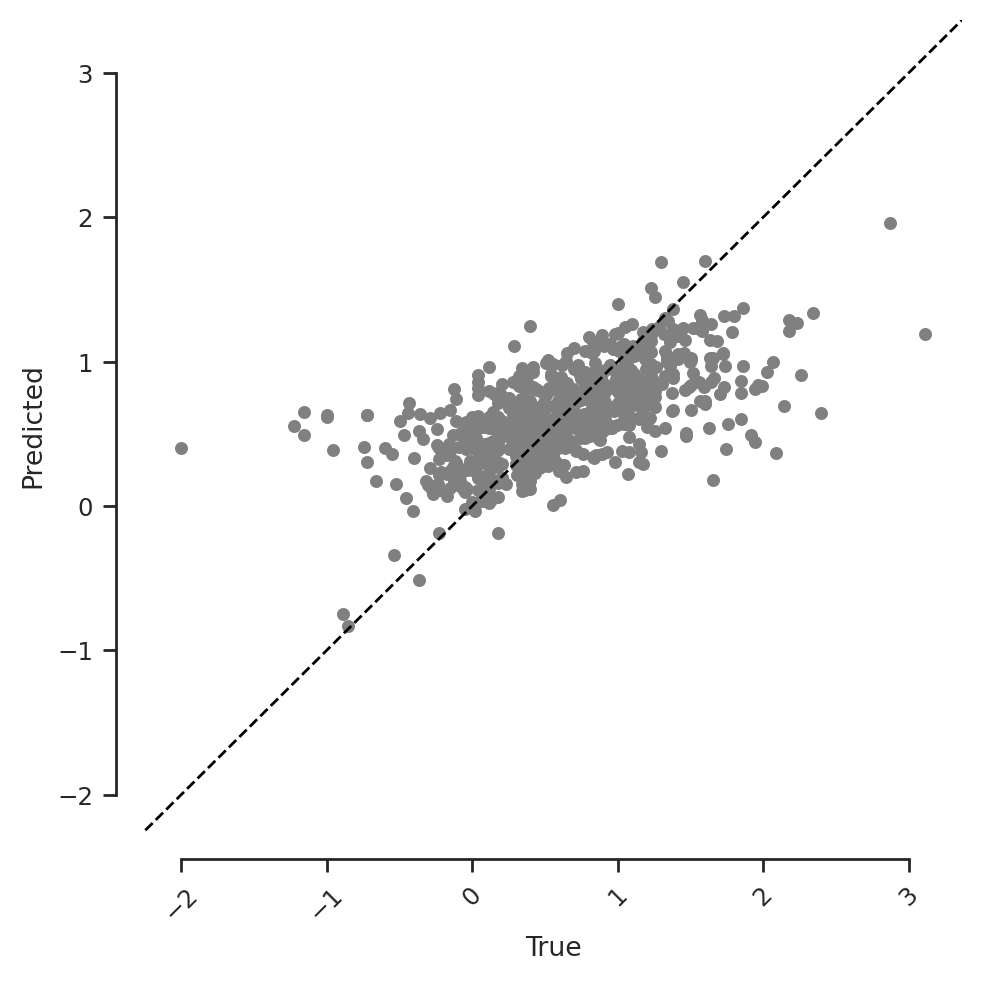

human_thalf
753
2-fold :  58.69853917662683
3-fold :  79.6812749003984
5-fold :  90.57104913678619
gmfe :  2.1423360812663987
mfe :  1.2940464134433733
bias :  0.24510702730825895
rmse  0.4463556245270795
r2  0.41957430662925466


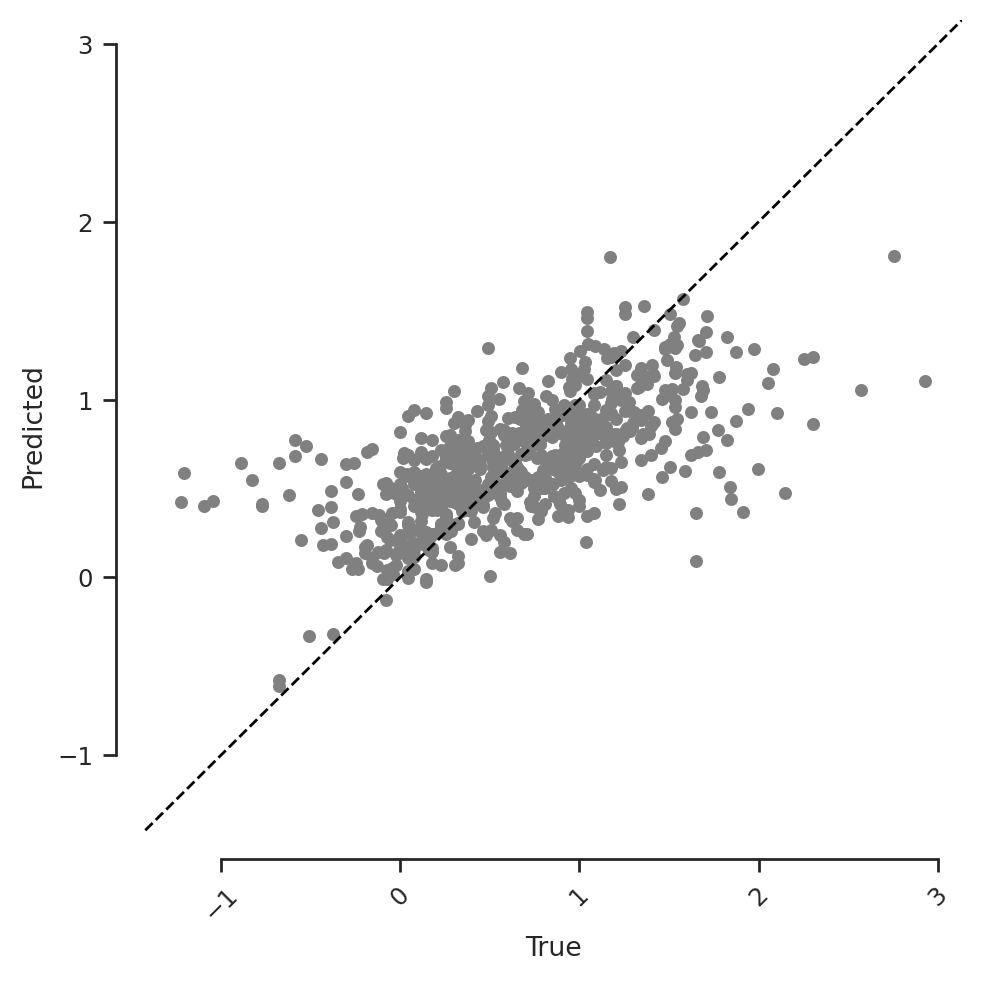

In [16]:
#Applicability Domain

for endpoint in ["human_VDss_L_kg","human_CL_mL_min_kg", "human_fup", "human_mrt", "human_thalf"]:
    print(endpoint)
    
    data=df[df["MFP_Tc"]>0.30] 
    Y_test = data[data["endpoint"]==endpoint].groupby("smiles_r").mean()["true"].values
    y_pred = data[data["endpoint"]==endpoint].groupby("smiles_r").mean()["pred"].values
    print(len(y_pred))

    fold_2= count(y_pred, Y_test, 0.5, 2, endpoint)
    fold_3= count(y_pred, Y_test, 1/3, 3, endpoint)
    fold_5= count(y_pred, Y_test, 1/5, 5, endpoint)
    gmfe = calc_gmfe(y_pred, Y_test, endpoint)
    mfe = median_fold_change_error(y_pred, Y_test, endpoint)
    bias = calc_bias(y_pred, Y_test, endpoint)

    print("2-fold : ", fold_2)
    print("3-fold : ", fold_3)
    print("5-fold : ", fold_5)
    print("gmfe : ", gmfe)
    print("mfe : ", mfe)
    print("bias : ", bias)

    rmse = sqrt(mean_squared_error(Y_test, y_pred))
    print('rmse ',rmse)
    r2 = r2_score(Y_test, y_pred)
    print('r2 ',r2)

    fig = plt.figure(figsize =(5, 5), dpi=200) 

    plt.scatter(Y_test,  y_pred, color = 'gray', s=15) # s controls point size
    xleft, xright = plt.xlim()
    ybottom, ytop = plt.ylim()

    plt.xlim(min(xleft,ybottom) ,max(xright,ytop))
    plt.ylim(min(xleft,ybottom),max(xright,ytop))

    #add y=x line
    plt.plot([min(xleft,ybottom)-2,max(xright,ytop)],[min(xleft,ybottom)-2,max(xright,ytop)], lw=1, color='black', linestyle='dashed')

    sns.set_context("paper", font_scale=1)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title("")

    sns.set_style('ticks')
    sns.despine(offset=10, trim=True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [17]:
df

,endpoint,random_state,split,smiles_r,pred,true,key,MFP_Tc,folderror
0,human_VDss_L_kg,42,0,C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc([O-])ccc4[C@H...,0.278796,0.633468,human_VDss_L_kgC#C[C@]1(O)CC[C@H]2[C@@H]3CCc4c...,0.55,2.262935
1,human_VDss_L_kg,42,0,C=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N)nc(N)c3n2)cc1)...,-0.048287,-0.154902,human_VDss_L_kgC=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N...,0.39,1.278249
2,human_VDss_L_kg,42,0,C=CC1=C(C(=O)[O-])[NH+]2C(=O)C(=NC(=O)C(NOCC(=...,-0.712607,-0.619789,human_VDss_L_kgC=CC1=C(C(=O)[O-])[NH+]2C(=O)C(...,0.41,1.238279
3,human_VDss_L_kg,42,0,C=CCc1ccccc1OCC(O)C[NH2+]C(C)C,0.366459,0.505150,human_VDss_L_kgC=CCc1ccccc1OCC(O)C[NH2+]C(C)C420,0.56,1.376230
4,human_VDss_L_kg,42,0,C=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H](Oc2ncc(OC)c3c...,0.033923,0.442480,human_VDss_L_kgC=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H...,0.22,2.561870
...,...,...,...,...,...,...,...,...,...
29580,human_thalf,46,4,[NH3+]CCCCC(NC(=O)C(Cc1cc(Br)c([O-])c(Br)c1)NC...,0.934596,0.397940,human_thalf[NH3+]CCCCC(NC(=O)C(Cc1cc(Br)c([O-]...,0.24,3.440769
29581,human_thalf,46,4,[NH3+]C[C@H]1OB(O)c2c(OCCCO)cccc21,0.549054,1.064458,human_thalf[NH3+]C[C@H]1OB(O)c2c(OCCCO)cccc21464,0.20,3.276451
29582,human_thalf,46,4,[O-]c1ccc(C2=Cc3ccc([O-])cc3OC2)cc1,0.578109,-0.173925,human_thalf[O-]c1ccc(C2=Cc3ccc([O-])cc3OC2)cc1464,0.22,5.649817
29583,human_thalf,46,4,[O-]c1ccc([C@H]2C[NH2+]CCc3c2cc([O-])c([O-])c3...,0.631691,0.000000,human_thalf[O-]c1ccc([C@H]2C[NH2+]CCc3c2cc([O-...,0.21,4.282441


In [18]:
df[df["endpoint"]=="human_CL_mL_min_kg"].groupby("smiles_r").mean().describe()

,random_state,split,pred,true,MFP_Tc,folderror
count,1281.0,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,44.0,1.998439,0.616084,0.620440,0.355162,6.375043
std,0.0,0.629085,0.307596,0.649088,0.130225,48.177219
min,44.0,0.200000,-1.150124,-2.431798,0.078000,1.017844
25%,44.0,1.600000,0.435832,0.255273,0.254000,1.396393
50%,44.0,2.000000,0.651446,0.683947,0.322000,1.983447
75%,44.0,2.400000,0.841128,1.041393,0.436000,3.515942
max,44.0,4.000000,1.402636,3.029384,0.866000,1560.564110


In [19]:
10**1.041393

11.000007974452645

human_CL_mL_min_kg
144
2-fold :  10.416666666666668
3-fold :  23.61111111111111
5-fold :  53.47222222222222
gmfe :  5.748273772787077
mfe :  1.9637642183396153
bias :  -23.06994645849072
rmse  0.8801670803265159
r2  -5.835466786076476


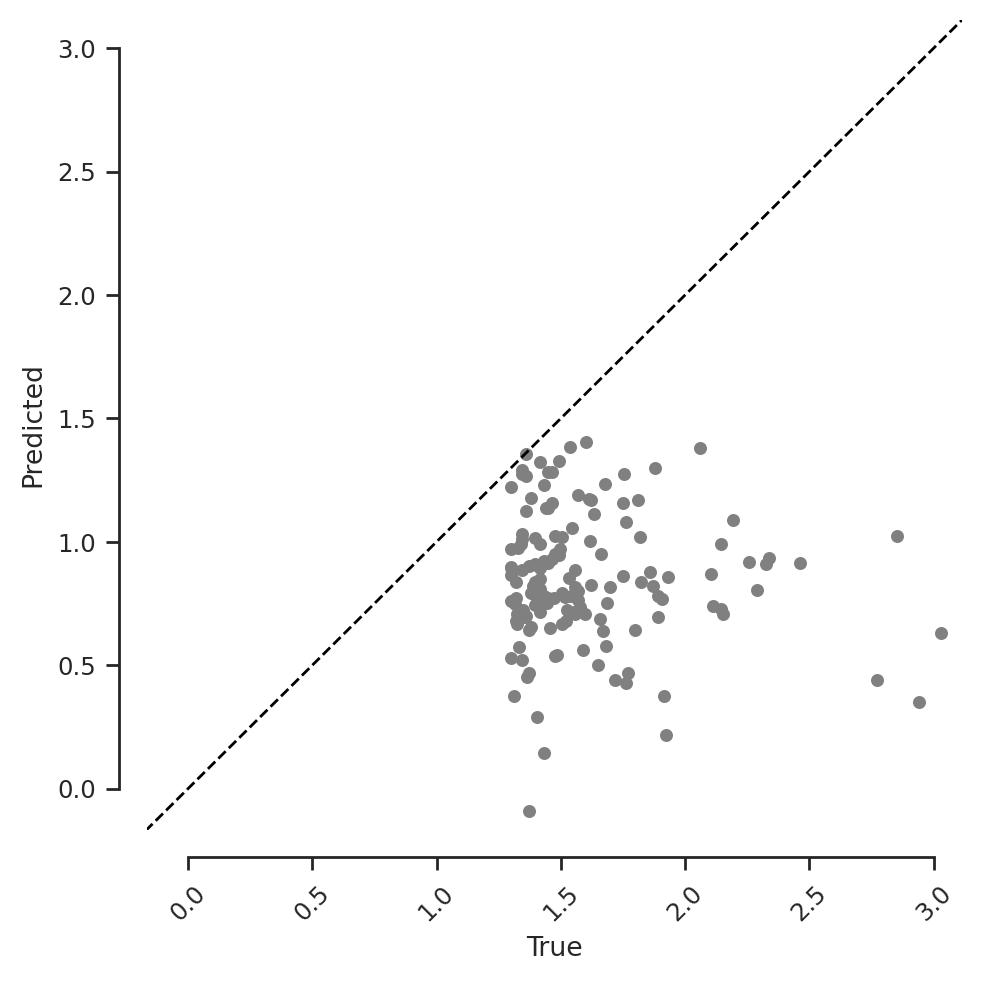

In [20]:
#high intrinsic clearance

for endpoint in ["human_CL_mL_min_kg"]:
    print(endpoint)
    
    data= df[df["endpoint"]=="human_CL_mL_min_kg"]
    data=data[10**data["true"]>=20]
    
    Y_test = data.groupby("smiles_r").mean()["true"].values
    y_pred = data.groupby("smiles_r").mean()["pred"].values
    print(len(y_pred))

    fold_2= count(y_pred, Y_test, 0.5, 2,endpoint)
    fold_3= count(y_pred, Y_test, 1/3, 3,endpoint)
    fold_5= count(y_pred, Y_test, 1/5, 5,endpoint)
    gmfe = calc_gmfe(y_pred, Y_test,endpoint)
    mfe = median_fold_change_error(y_pred, Y_test,endpoint)
    bias = calc_bias(y_pred, Y_test,endpoint)

    print("2-fold : ", fold_2)
    print("3-fold : ", fold_3)
    print("5-fold : ", fold_5)
    print("gmfe : ", gmfe)
    print("mfe : ", mfe)
    print("bias : ", bias)

    rmse = sqrt(mean_squared_error(Y_test, y_pred))
    print('rmse ',rmse)
    r2 = r2_score(Y_test, y_pred)
    print('r2 ',r2)

    fig = plt.figure(figsize =(5, 5), dpi=200) 

    plt.scatter(Y_test,  y_pred, color = 'gray', s=15) # s controls point size
    xleft, xright = plt.xlim()
    ybottom, ytop = plt.ylim()

    plt.xlim(min(xleft,ybottom) ,max(xright,ytop))
    plt.ylim(min(xleft,ybottom),max(xright,ytop))

    #add y=x line
    plt.plot([min(xleft,ybottom)-2,max(xright,ytop)],[min(xleft,ybottom)-2,max(xright,ytop)], lw=1, color='black', linestyle='dashed')

    sns.set_context("paper", font_scale=1)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title("")

    sns.set_style('ticks')
    sns.despine(offset=10, trim=True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

human_CL_mL_min_kg
978
2-fold :  58.99795501022494
3-fold :  76.27811860940696
5-fold :  88.13905930470347
gmfe :  2.191438498704004
mfe :  1.2731719316869263
bias :  0.5296164930189162
rmse  0.4870530130581054
r2  0.1727225489377594


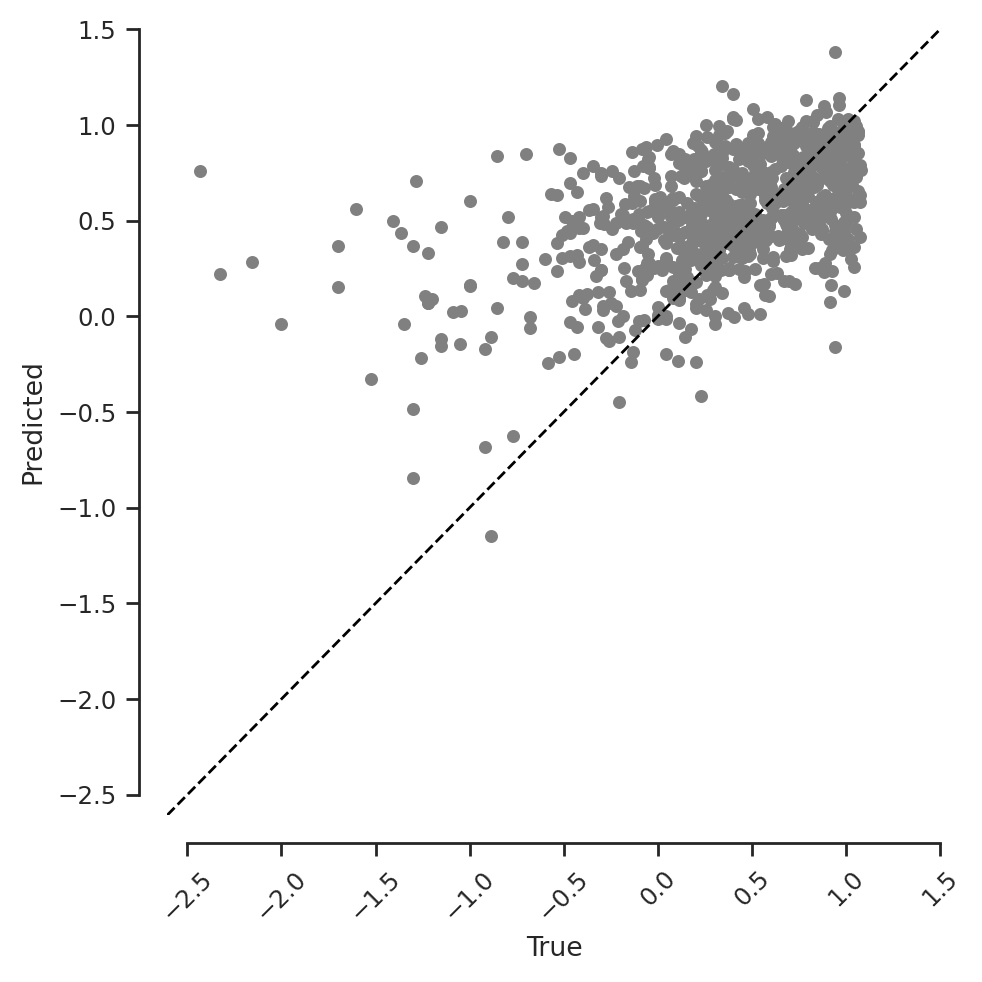

In [21]:
#low to intermediate clearance

for endpoint in ["human_CL_mL_min_kg"]:
    print(endpoint)
    
    data= df[df["endpoint"]=="human_CL_mL_min_kg"]
    data=data[10**data["true"]<12]
    
    Y_test = data.groupby("smiles_r").mean()["true"].values
    y_pred = data.groupby("smiles_r").mean()["pred"].values
    print(len(y_pred))

    fold_2= count(y_pred, Y_test, 0.5, 2, endpoint)
    fold_3= count(y_pred, Y_test, 1/3, 3, endpoint)
    fold_5= count(y_pred, Y_test, 1/5, 5, endpoint)
    gmfe = calc_gmfe(y_pred, Y_test, endpoint)
    mfe = median_fold_change_error(y_pred, Y_test, endpoint)
    bias = calc_bias(y_pred, Y_test, endpoint)

    print("2-fold : ", fold_2)
    print("3-fold : ", fold_3)
    print("5-fold : ", fold_5)
    print("gmfe : ", gmfe)
    print("mfe : ", mfe)
    print("bias : ", bias)

    rmse = sqrt(mean_squared_error(Y_test, y_pred))
    print('rmse ',rmse)
    r2 = r2_score(Y_test, y_pred)
    print('r2 ',r2)

    fig = plt.figure(figsize =(5, 5), dpi=200) 

    plt.scatter(Y_test,  y_pred, color = 'gray', s=15) # s controls point size
    xleft, xright = plt.xlim()
    ybottom, ytop = plt.ylim()

    plt.xlim(min(xleft,ybottom) ,max(xright,ytop))
    plt.ylim(min(xleft,ybottom),max(xright,ytop))

    #add y=x line
    plt.plot([min(xleft,ybottom)-2,max(xright,ytop)],[min(xleft,ybottom)-2,max(xright,ytop)], lw=1, color='black', linestyle='dashed')

    sns.set_context("paper", font_scale=1)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title("")

    sns.set_style('ticks')
    sns.despine(offset=10, trim=True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

human_CL_mL_min_kg
650
2-fold :  52.46153846153846
3-fold :  69.53846153846153
5-fold :  83.07692307692308
gmfe :  2.5107306294467473
mfe :  1.3268287884215155
bias :  1.2173649548143222
rmse  0.5610551312493692
r2  -0.3488756080640514


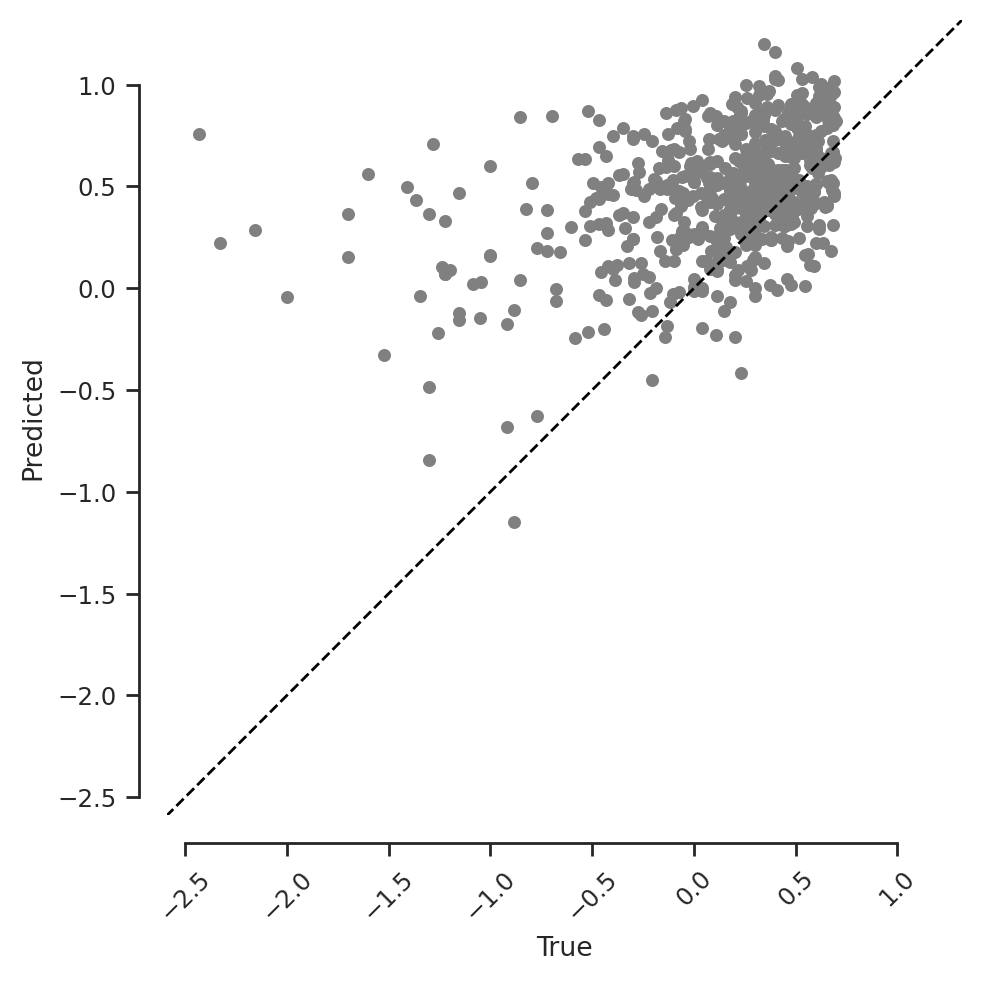

In [22]:
#low clearance compounds

for endpoint in ["human_CL_mL_min_kg"]:
    print(endpoint)
    
    data= df[df["endpoint"]=="human_CL_mL_min_kg"]
    data=data[10**data["true"]<5]
    
    Y_test = data.groupby("smiles_r").mean()["true"].values
    y_pred = data.groupby("smiles_r").mean()["pred"].values
    print(len(y_pred))

    fold_2= count(y_pred, Y_test, 0.5, 2, endpoint)
    fold_3= count(y_pred, Y_test, 1/3, 3, endpoint)
    fold_5= count(y_pred, Y_test, 1/5, 5, endpoint)
    gmfe = calc_gmfe(y_pred, Y_test, endpoint)
    mfe = median_fold_change_error(y_pred, Y_test, endpoint)
    bias = calc_bias(y_pred, Y_test, endpoint)

    print("2-fold : ", fold_2)
    print("3-fold : ", fold_3)
    print("5-fold : ", fold_5)
    print("gmfe : ", gmfe)
    print("mfe : ", mfe)
    print("bias : ", bias)

    rmse = sqrt(mean_squared_error(Y_test, y_pred))
    print('rmse ',rmse)
    r2 = r2_score(Y_test, y_pred)
    print('r2 ',r2)

    fig = plt.figure(figsize =(5, 5), dpi=200) 

    plt.scatter(Y_test,  y_pred, color = 'gray', s=15) # s controls point size
    xleft, xright = plt.xlim()
    ybottom, ytop = plt.ylim()

    plt.xlim(min(xleft,ybottom) ,max(xright,ytop))
    plt.ylim(min(xleft,ybottom),max(xright,ytop))

    #add y=x line
    plt.plot([min(xleft,ybottom)-2,max(xright,ytop)],[min(xleft,ybottom)-2,max(xright,ytop)], lw=1, color='black', linestyle='dashed')

    sns.set_context("paper", font_scale=1)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title("")

    sns.set_style('ticks')
    sns.despine(offset=10, trim=True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [23]:
#Fold error vs prediction
df

,endpoint,random_state,split,smiles_r,pred,true,key,MFP_Tc,folderror
0,human_VDss_L_kg,42,0,C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc([O-])ccc4[C@H...,0.278796,0.633468,human_VDss_L_kgC#C[C@]1(O)CC[C@H]2[C@@H]3CCc4c...,0.55,2.262935
1,human_VDss_L_kg,42,0,C=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N)nc(N)c3n2)cc1)...,-0.048287,-0.154902,human_VDss_L_kgC=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N...,0.39,1.278249
2,human_VDss_L_kg,42,0,C=CC1=C(C(=O)[O-])[NH+]2C(=O)C(=NC(=O)C(NOCC(=...,-0.712607,-0.619789,human_VDss_L_kgC=CC1=C(C(=O)[O-])[NH+]2C(=O)C(...,0.41,1.238279
3,human_VDss_L_kg,42,0,C=CCc1ccccc1OCC(O)C[NH2+]C(C)C,0.366459,0.505150,human_VDss_L_kgC=CCc1ccccc1OCC(O)C[NH2+]C(C)C420,0.56,1.376230
4,human_VDss_L_kg,42,0,C=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H](Oc2ncc(OC)c3c...,0.033923,0.442480,human_VDss_L_kgC=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H...,0.22,2.561870
...,...,...,...,...,...,...,...,...,...
29580,human_thalf,46,4,[NH3+]CCCCC(NC(=O)C(Cc1cc(Br)c([O-])c(Br)c1)NC...,0.934596,0.397940,human_thalf[NH3+]CCCCC(NC(=O)C(Cc1cc(Br)c([O-]...,0.24,3.440769
29581,human_thalf,46,4,[NH3+]C[C@H]1OB(O)c2c(OCCCO)cccc21,0.549054,1.064458,human_thalf[NH3+]C[C@H]1OB(O)c2c(OCCCO)cccc21464,0.20,3.276451
29582,human_thalf,46,4,[O-]c1ccc(C2=Cc3ccc([O-])cc3OC2)cc1,0.578109,-0.173925,human_thalf[O-]c1ccc(C2=Cc3ccc([O-])cc3OC2)cc1464,0.22,5.649817
29583,human_thalf,46,4,[O-]c1ccc([C@H]2C[NH2+]CCc3c2cc([O-])c([O-])c3...,0.631691,0.000000,human_thalf[O-]c1ccc([C@H]2C[NH2+]CCc3c2cc([O-...,0.21,4.282441


human_VDss_L_kg
1249


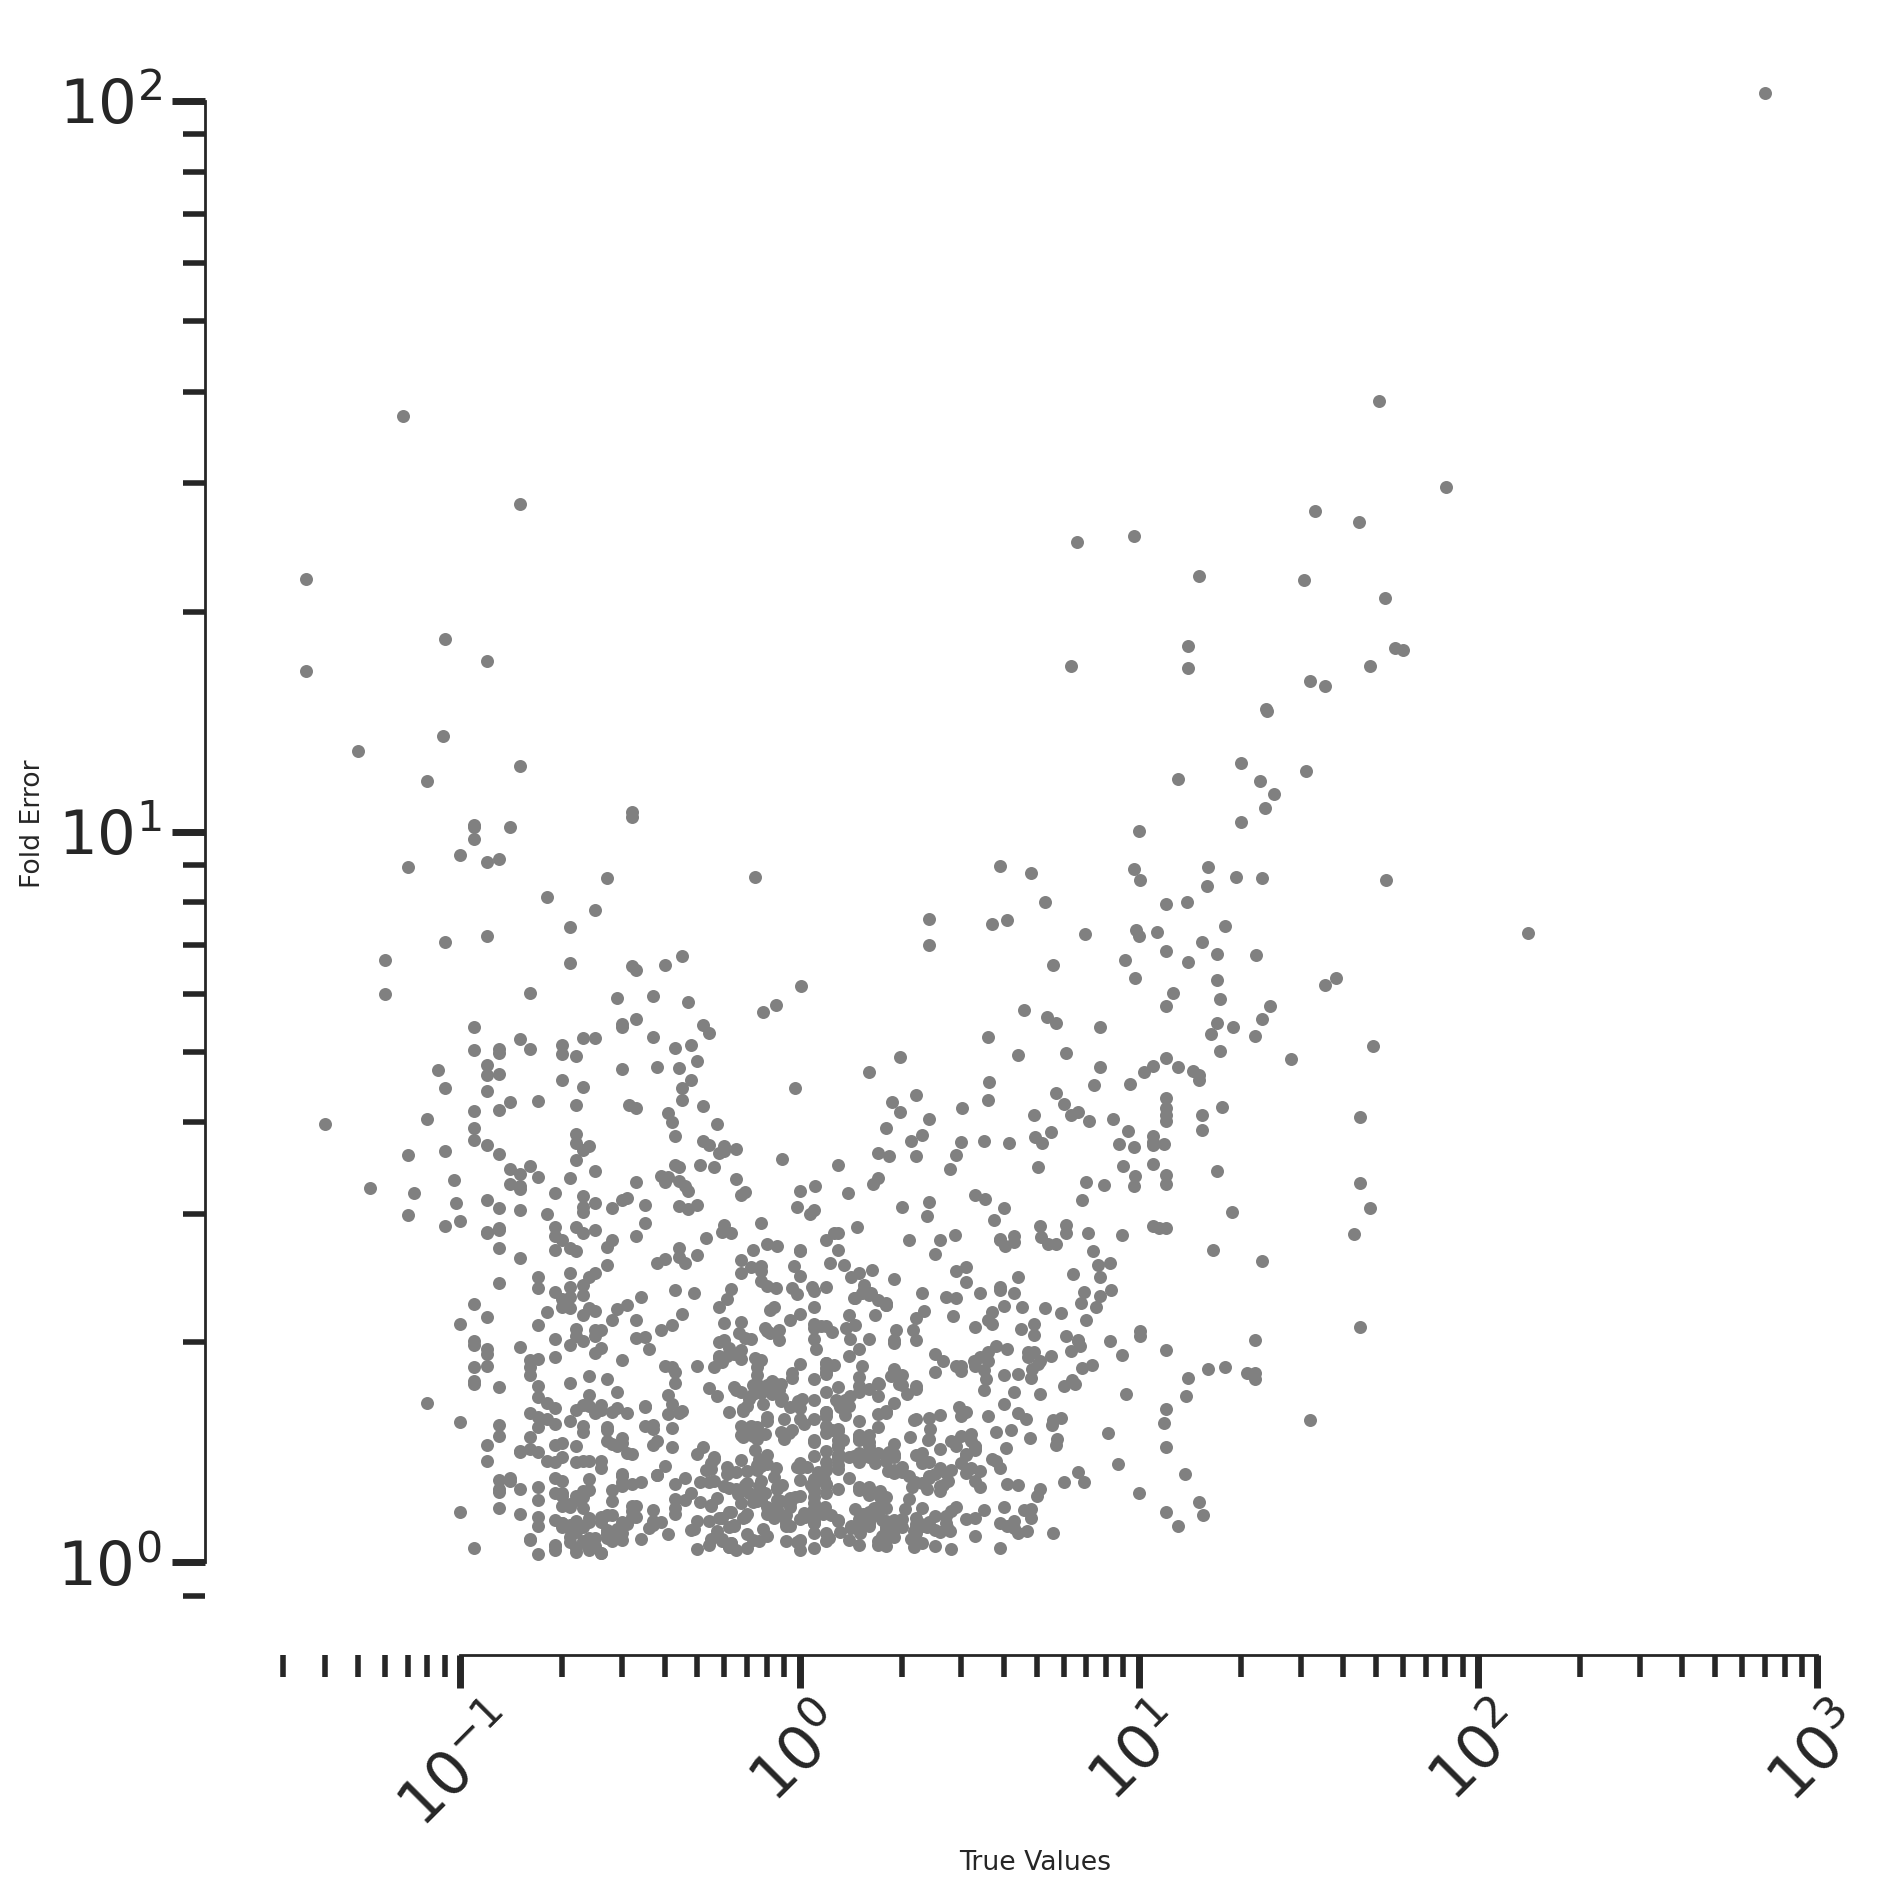

human_CL_mL_min_kg
1281


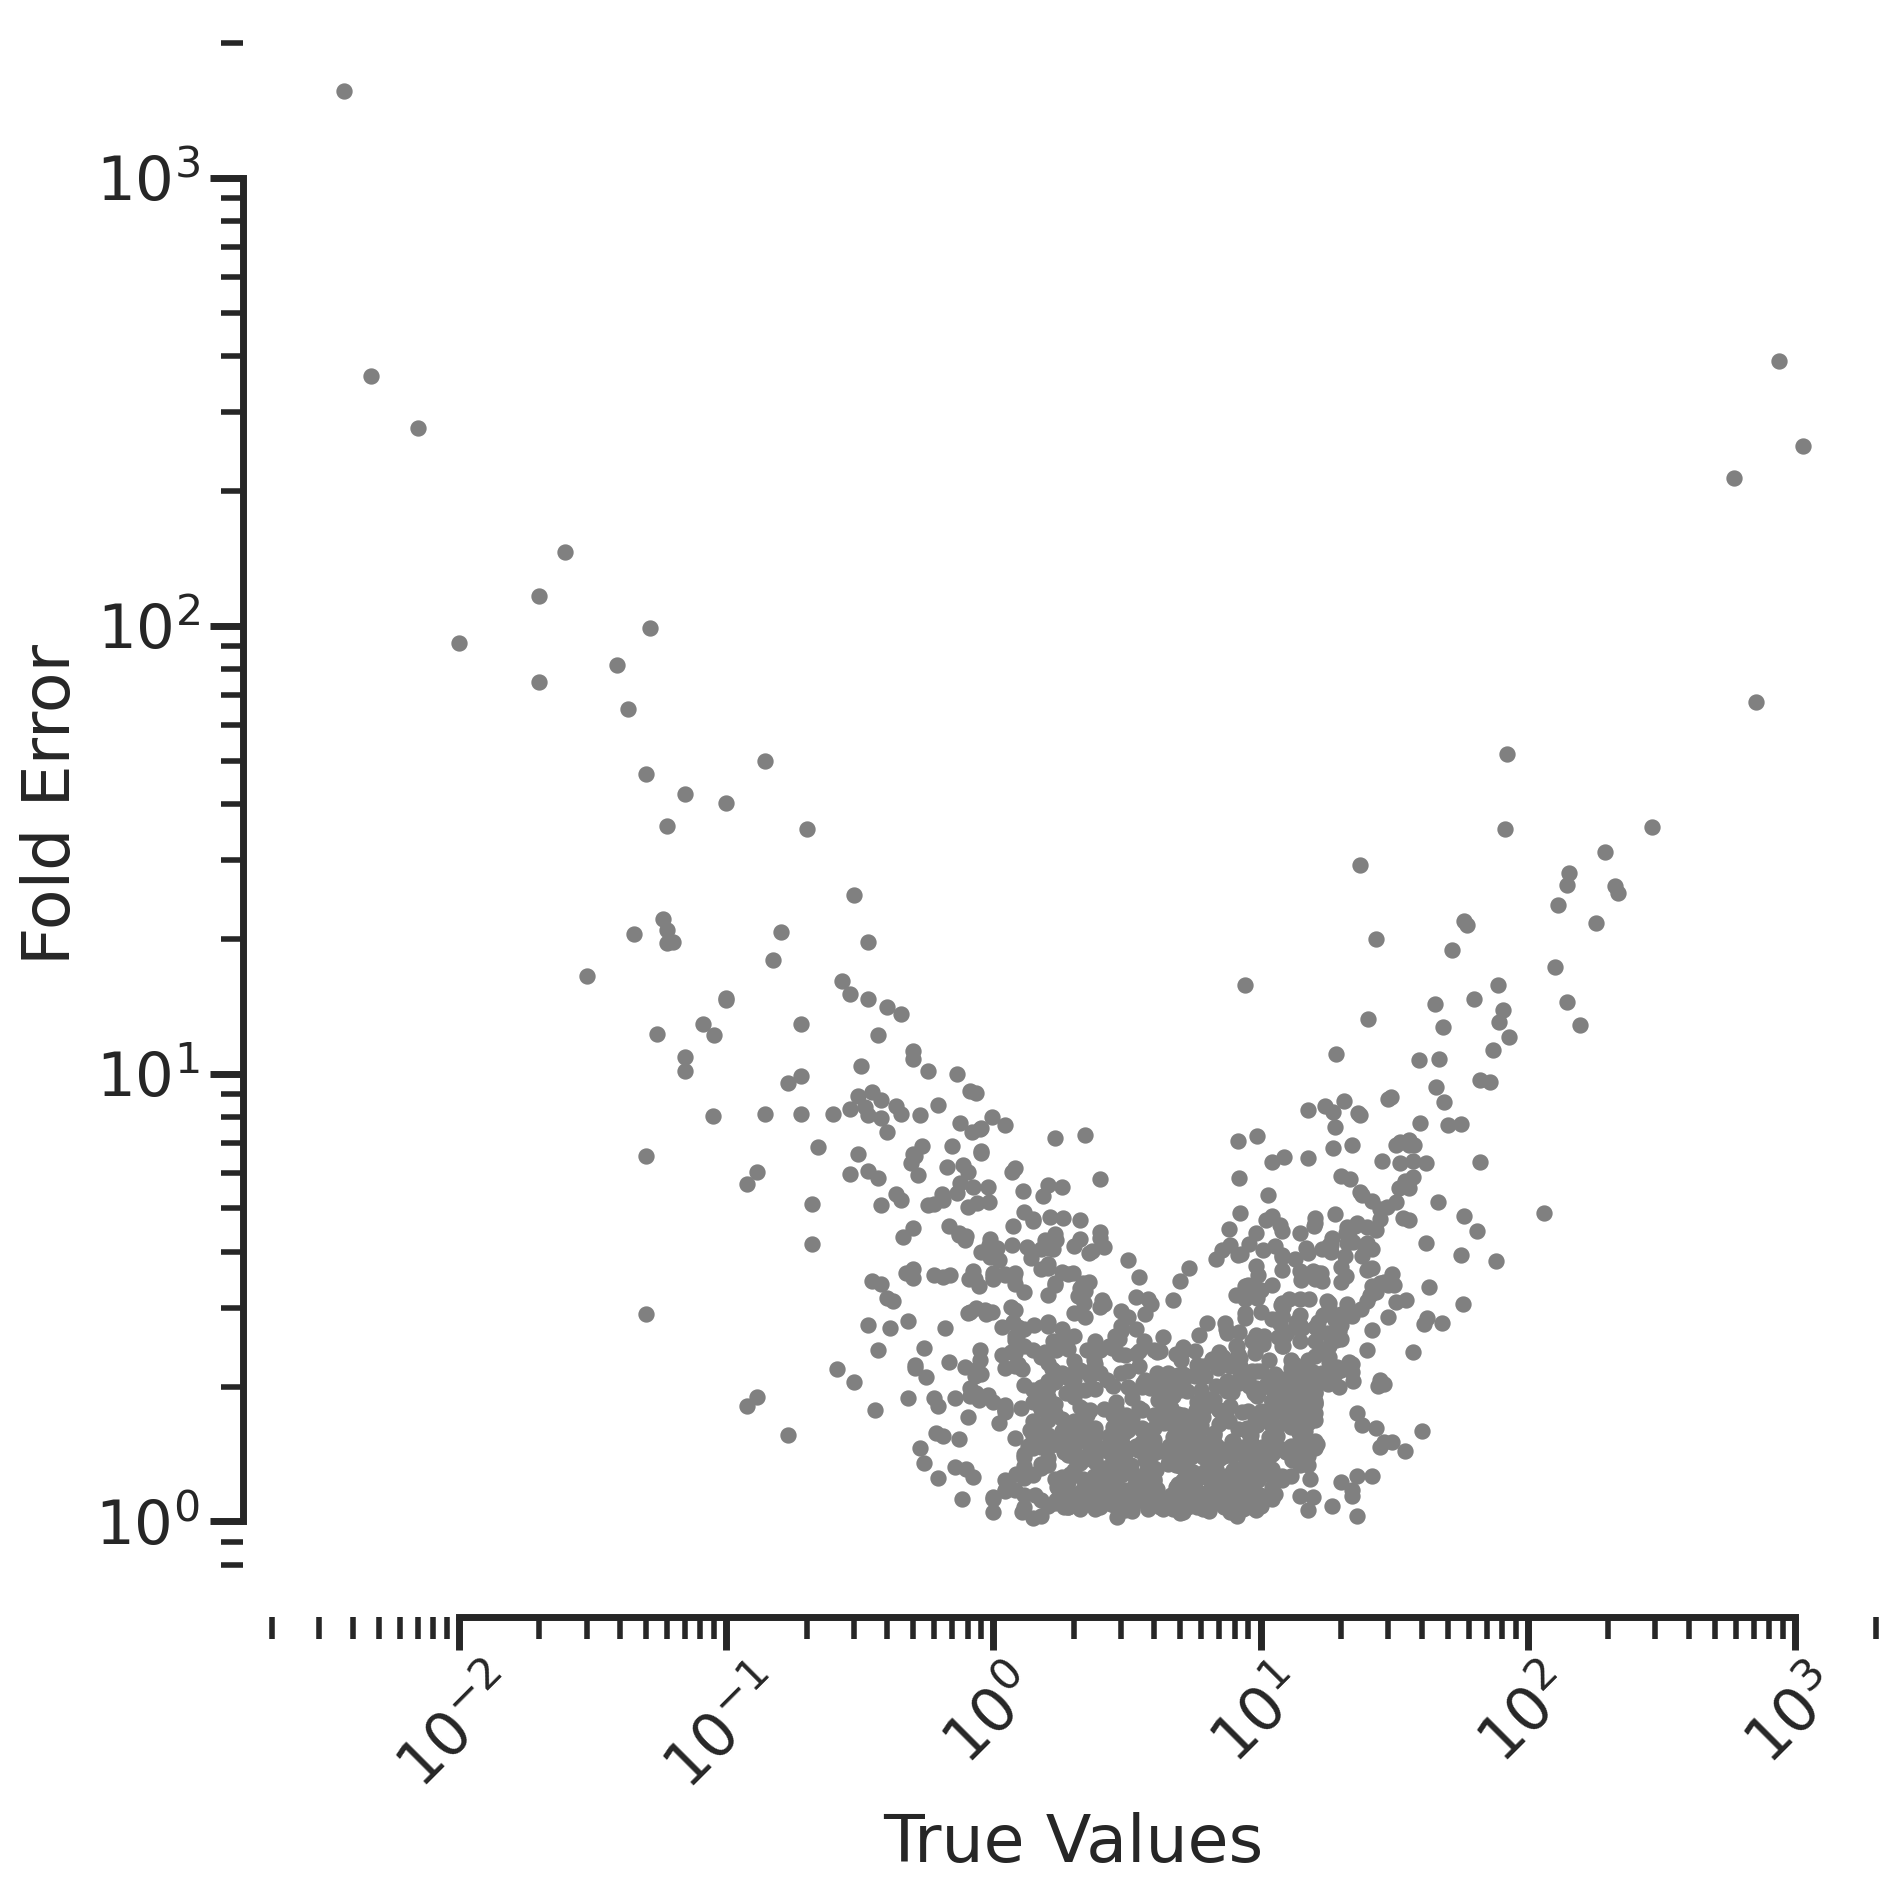

human_fup
879


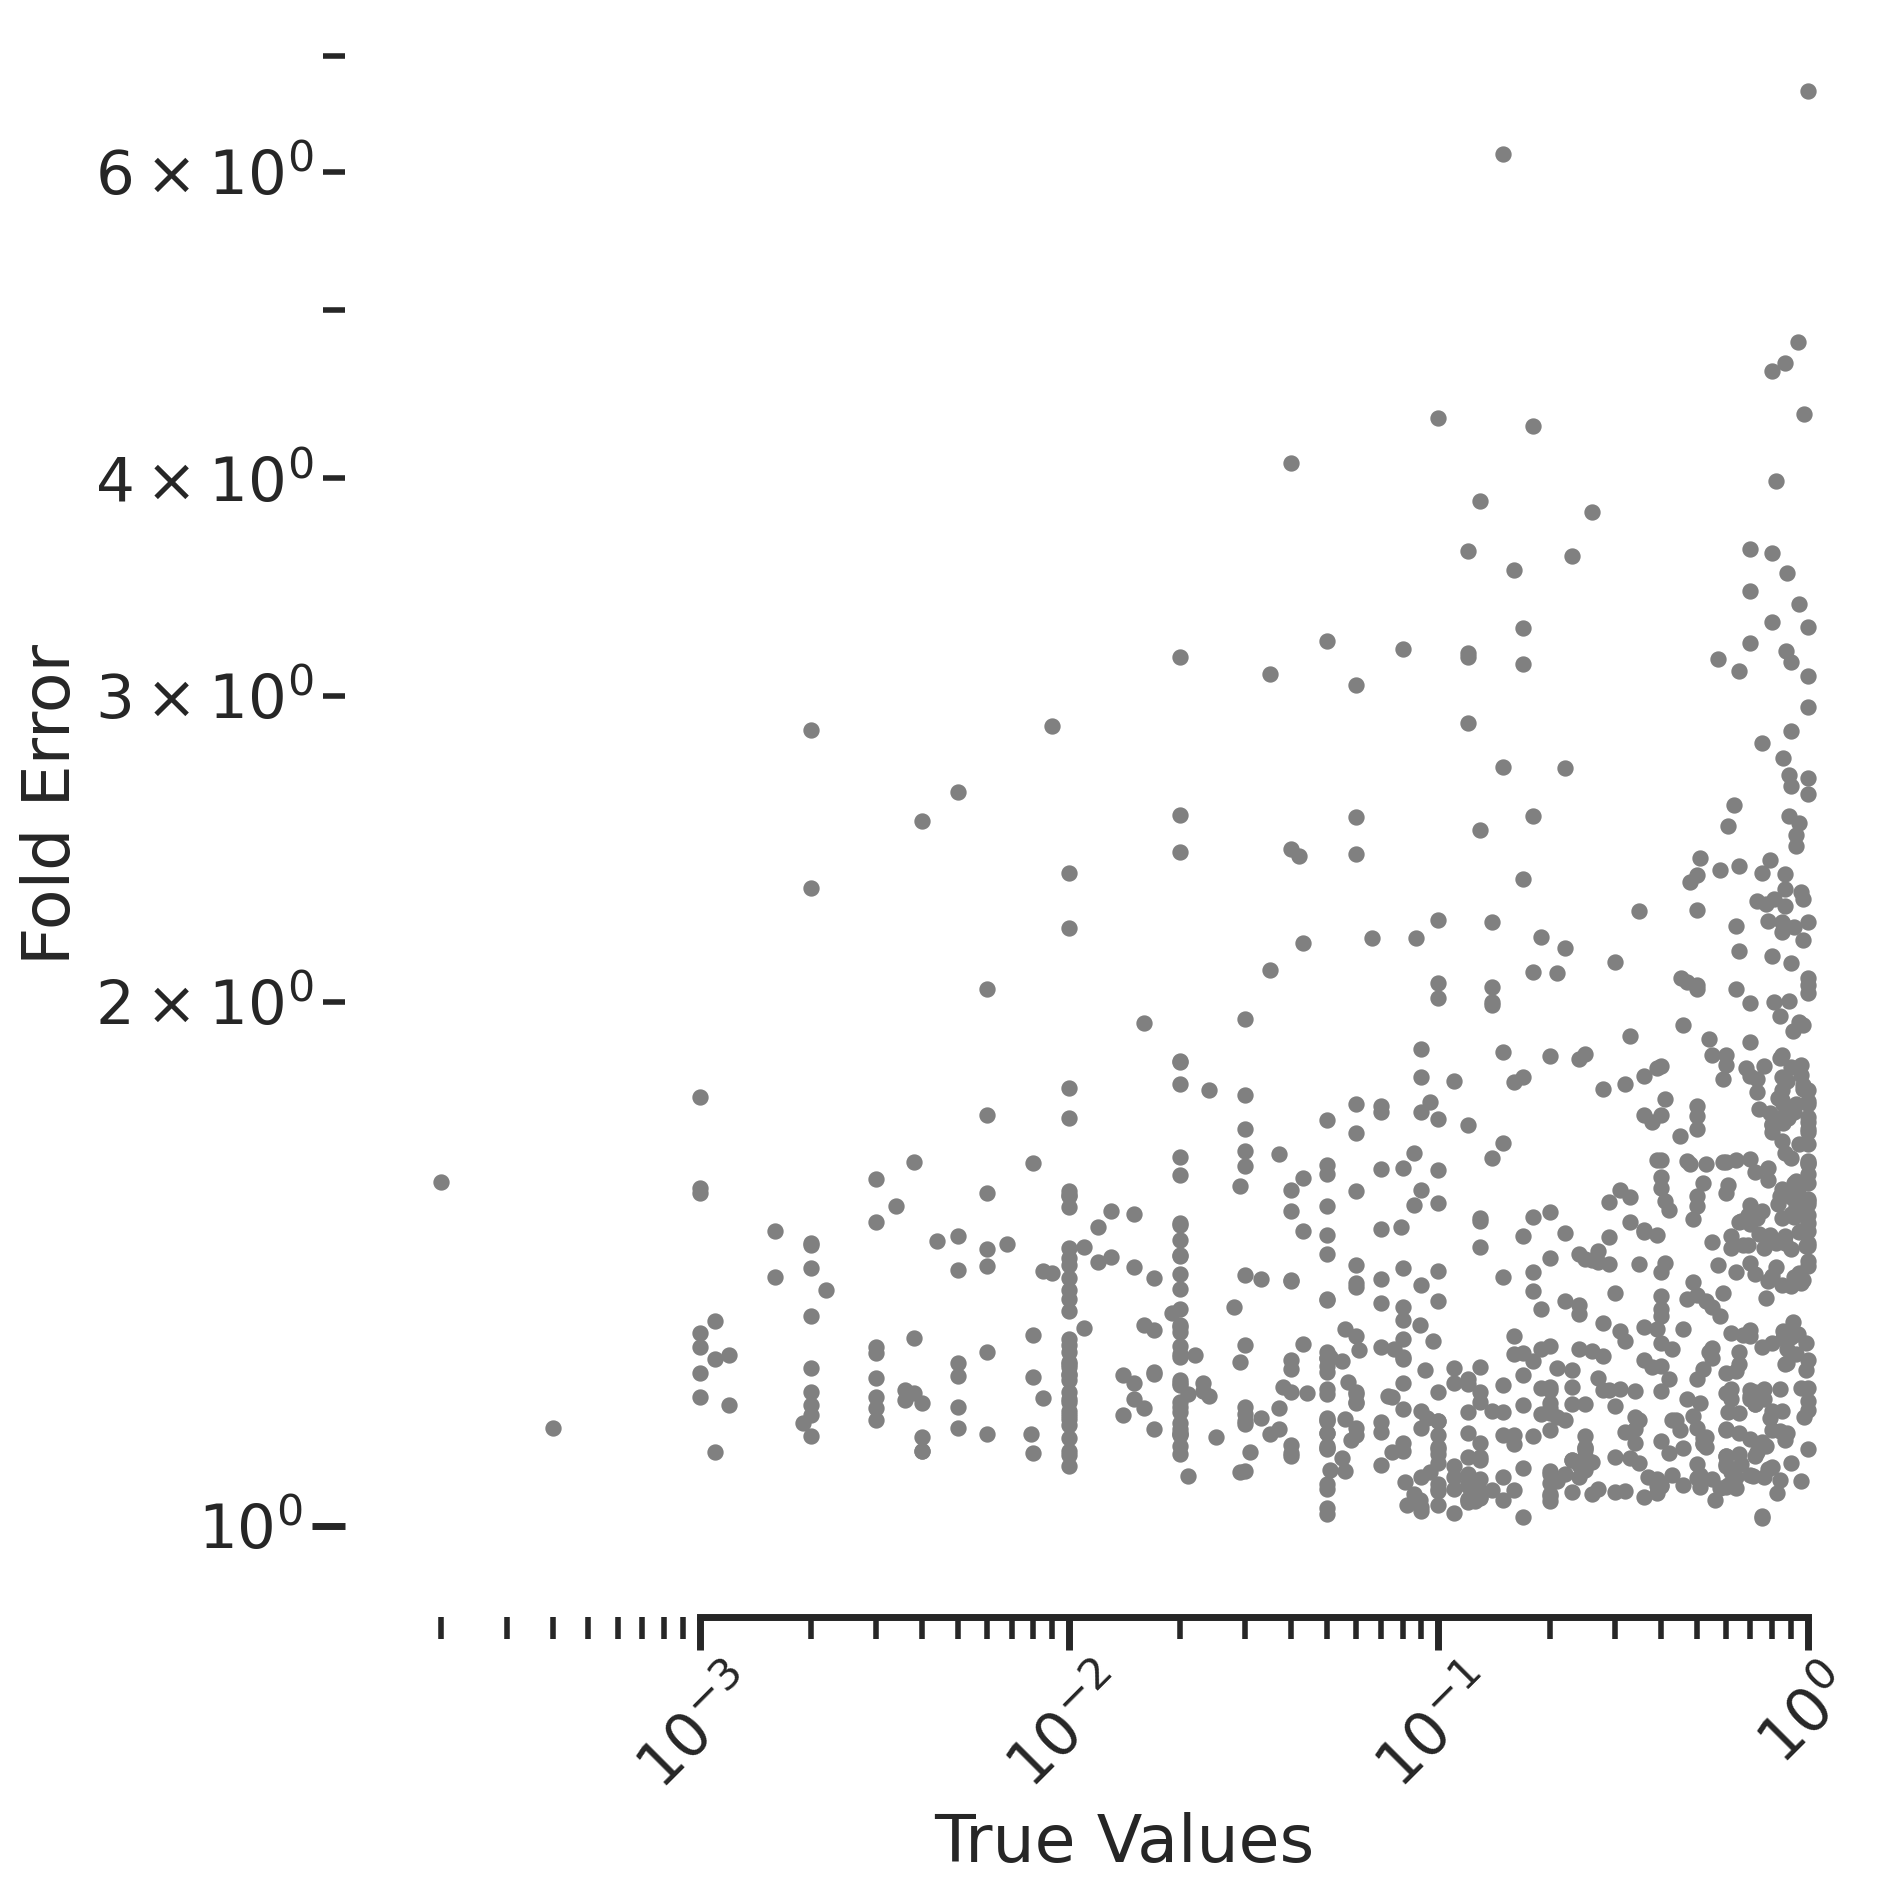

human_mrt
1243


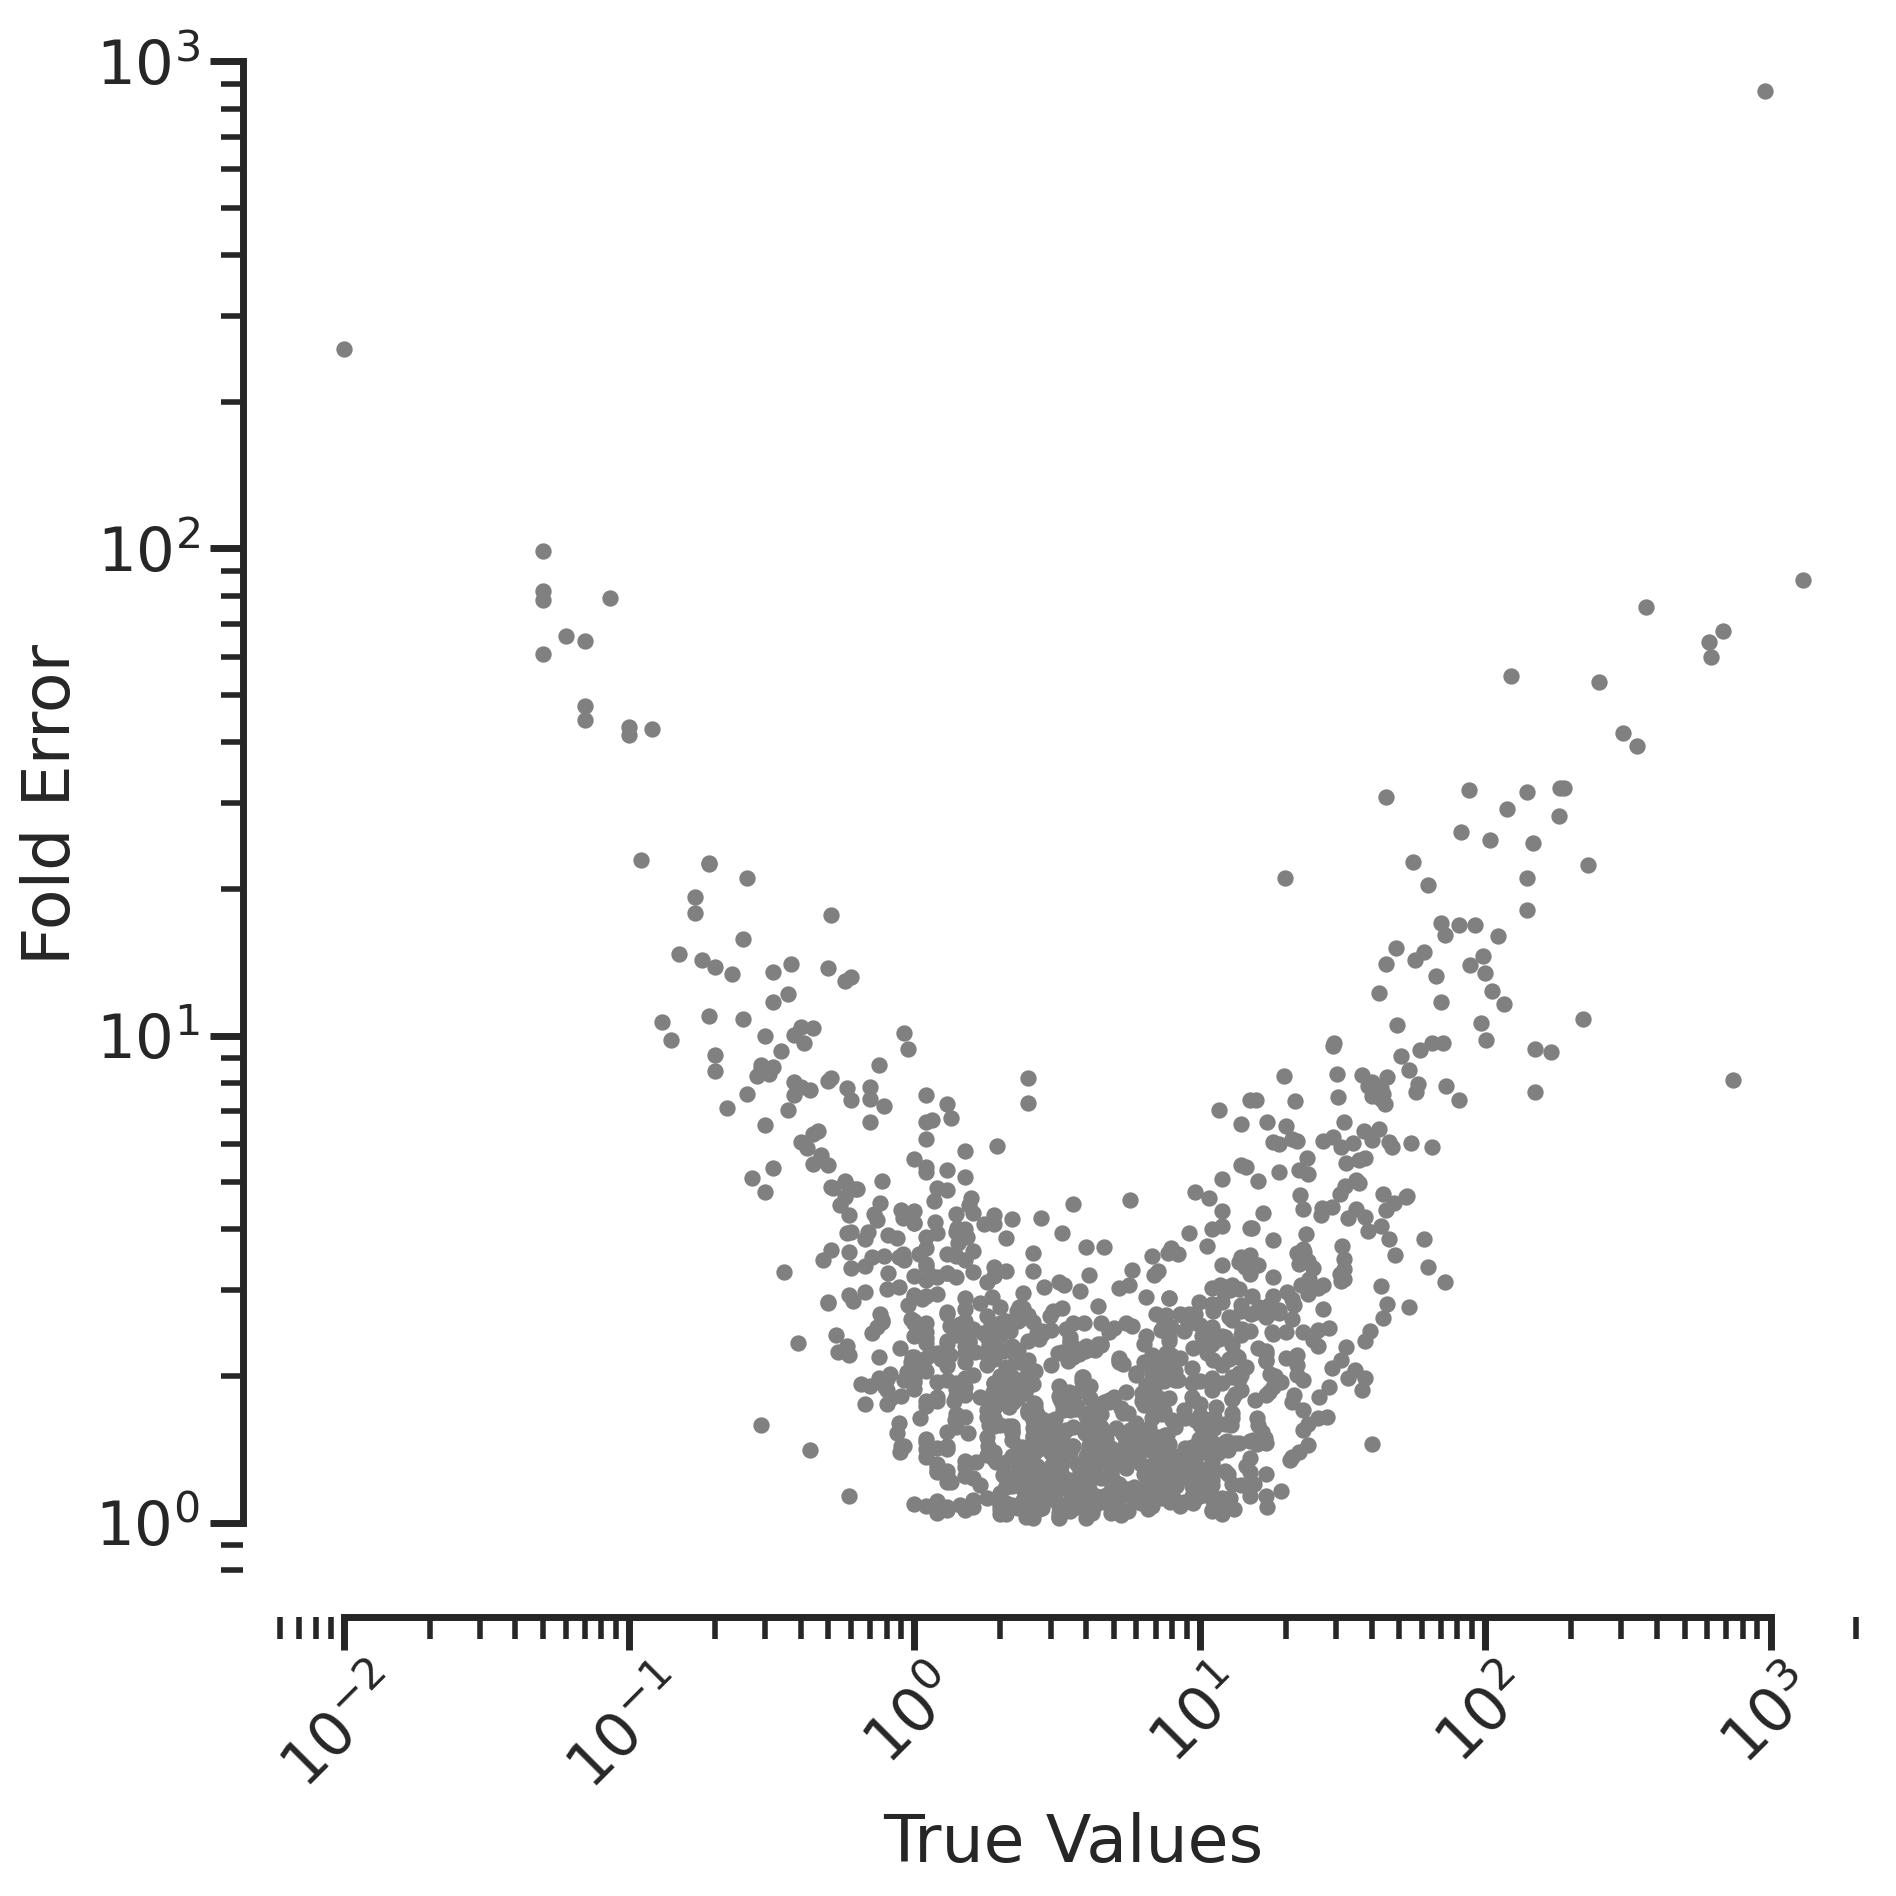

human_thalf
1265


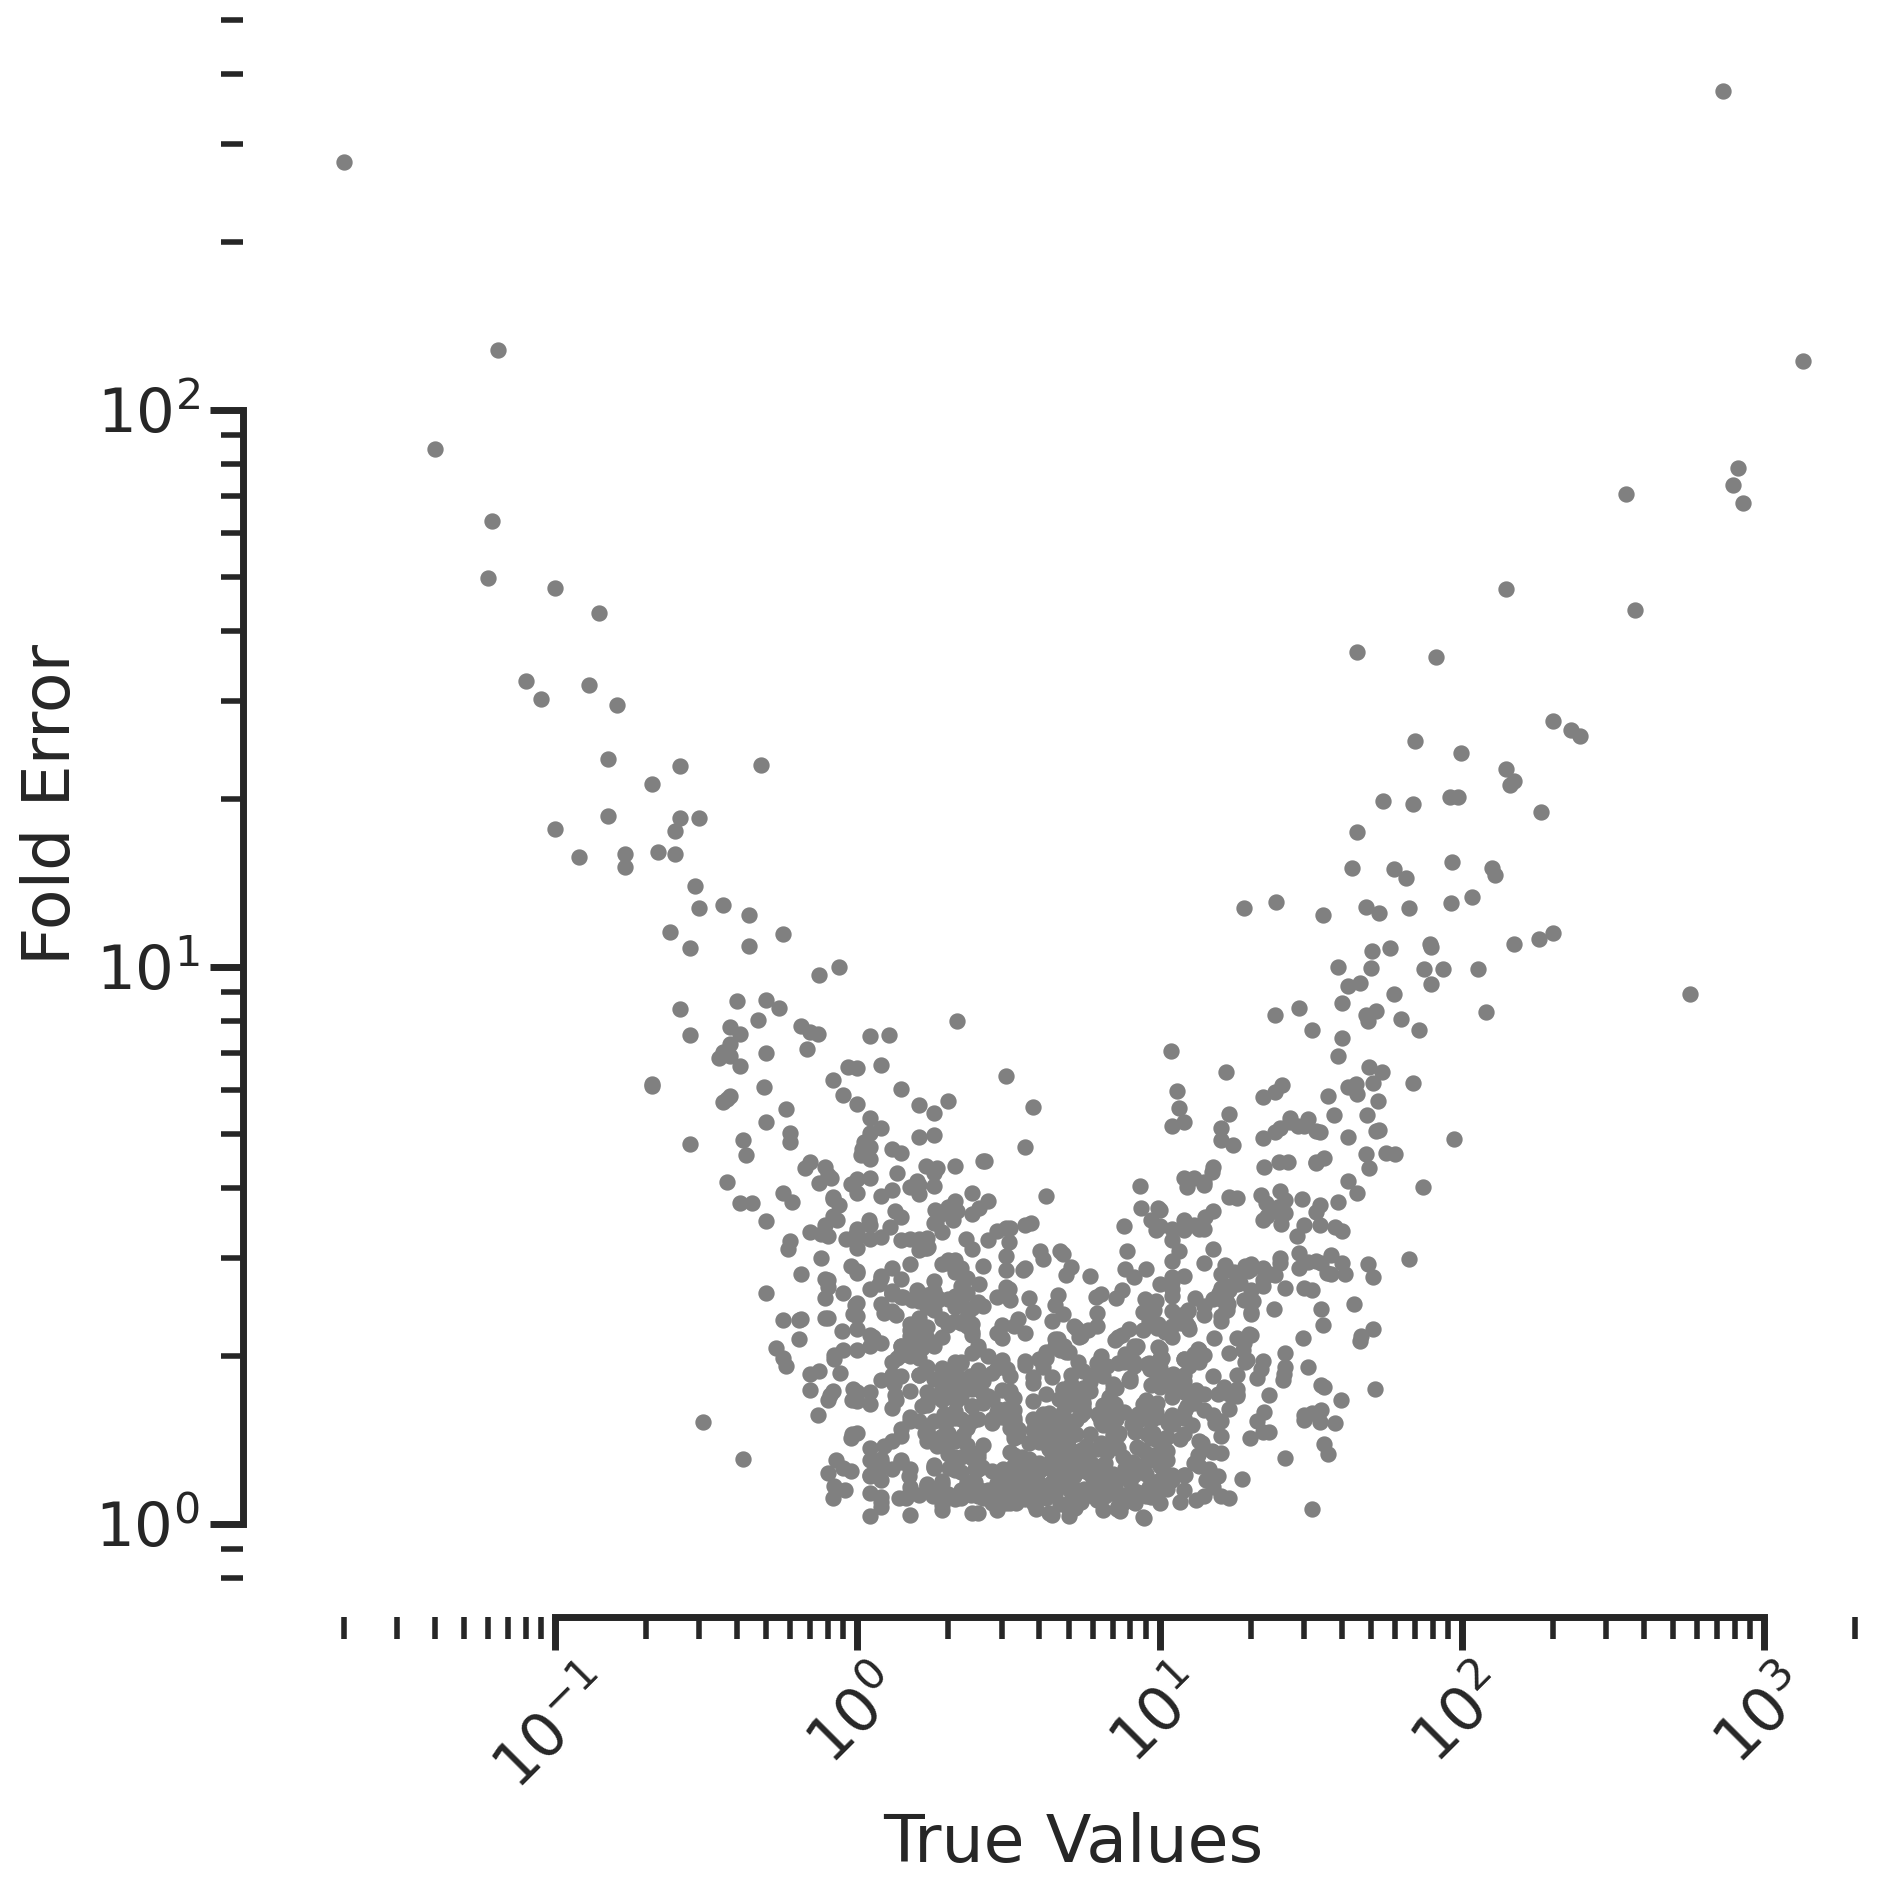

In [24]:
for endpoint in ["human_VDss_L_kg","human_CL_mL_min_kg", "human_fup", "human_mrt", "human_thalf"]:
    print(endpoint)
    
    data= df[df["endpoint"]==endpoint]
    
    
    fe = data.groupby("smiles_r").mean()["folderror"].values
    
    if(endpoint != "human_fup"):
        y_true = 10**data.groupby("smiles_r").mean()["true"].values
        
    else: 
        y_true = data.groupby("smiles_r").mean()["true"].values
        
    print(len(fe))

    fig = plt.figure(figsize =(10, 10), dpi=200) 

    plt.scatter(y_true, fe, color = 'gray', s=15) # s controls point size
  
    sns.set_context("poster", font_scale=1)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel("Fold Error")
    plt.xlabel("True Values")
    plt.title("")

    sns.set_style('ticks')
    sns.despine(offset=10, trim=True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [25]:
df[df["endpoint"]=="human_CL_mL_min_kg"].describe()

,random_state,split,pred,true,MFP_Tc,folderror
count,6405.000000,6405.000000,6405.000000,6405.000000,6405.000000,6405.000000
mean,44.000000,1.998439,0.616084,0.620440,0.355162,6.375043
std,1.414324,1.414875,0.314172,0.648885,0.132567,48.478638
min,42.000000,0.000000,-1.297484,-2.431798,0.070000,1.000220
25%,43.000000,1.000000,0.430774,0.255273,0.250000,1.356208
50%,44.000000,2.000000,0.646326,0.683947,0.320000,1.978452
75%,45.000000,3.000000,0.843815,1.041393,0.440000,3.467877
max,46.000000,4.000000,1.515010,3.029384,0.880000,1862.928693


human_CL_mL_min_kg
319


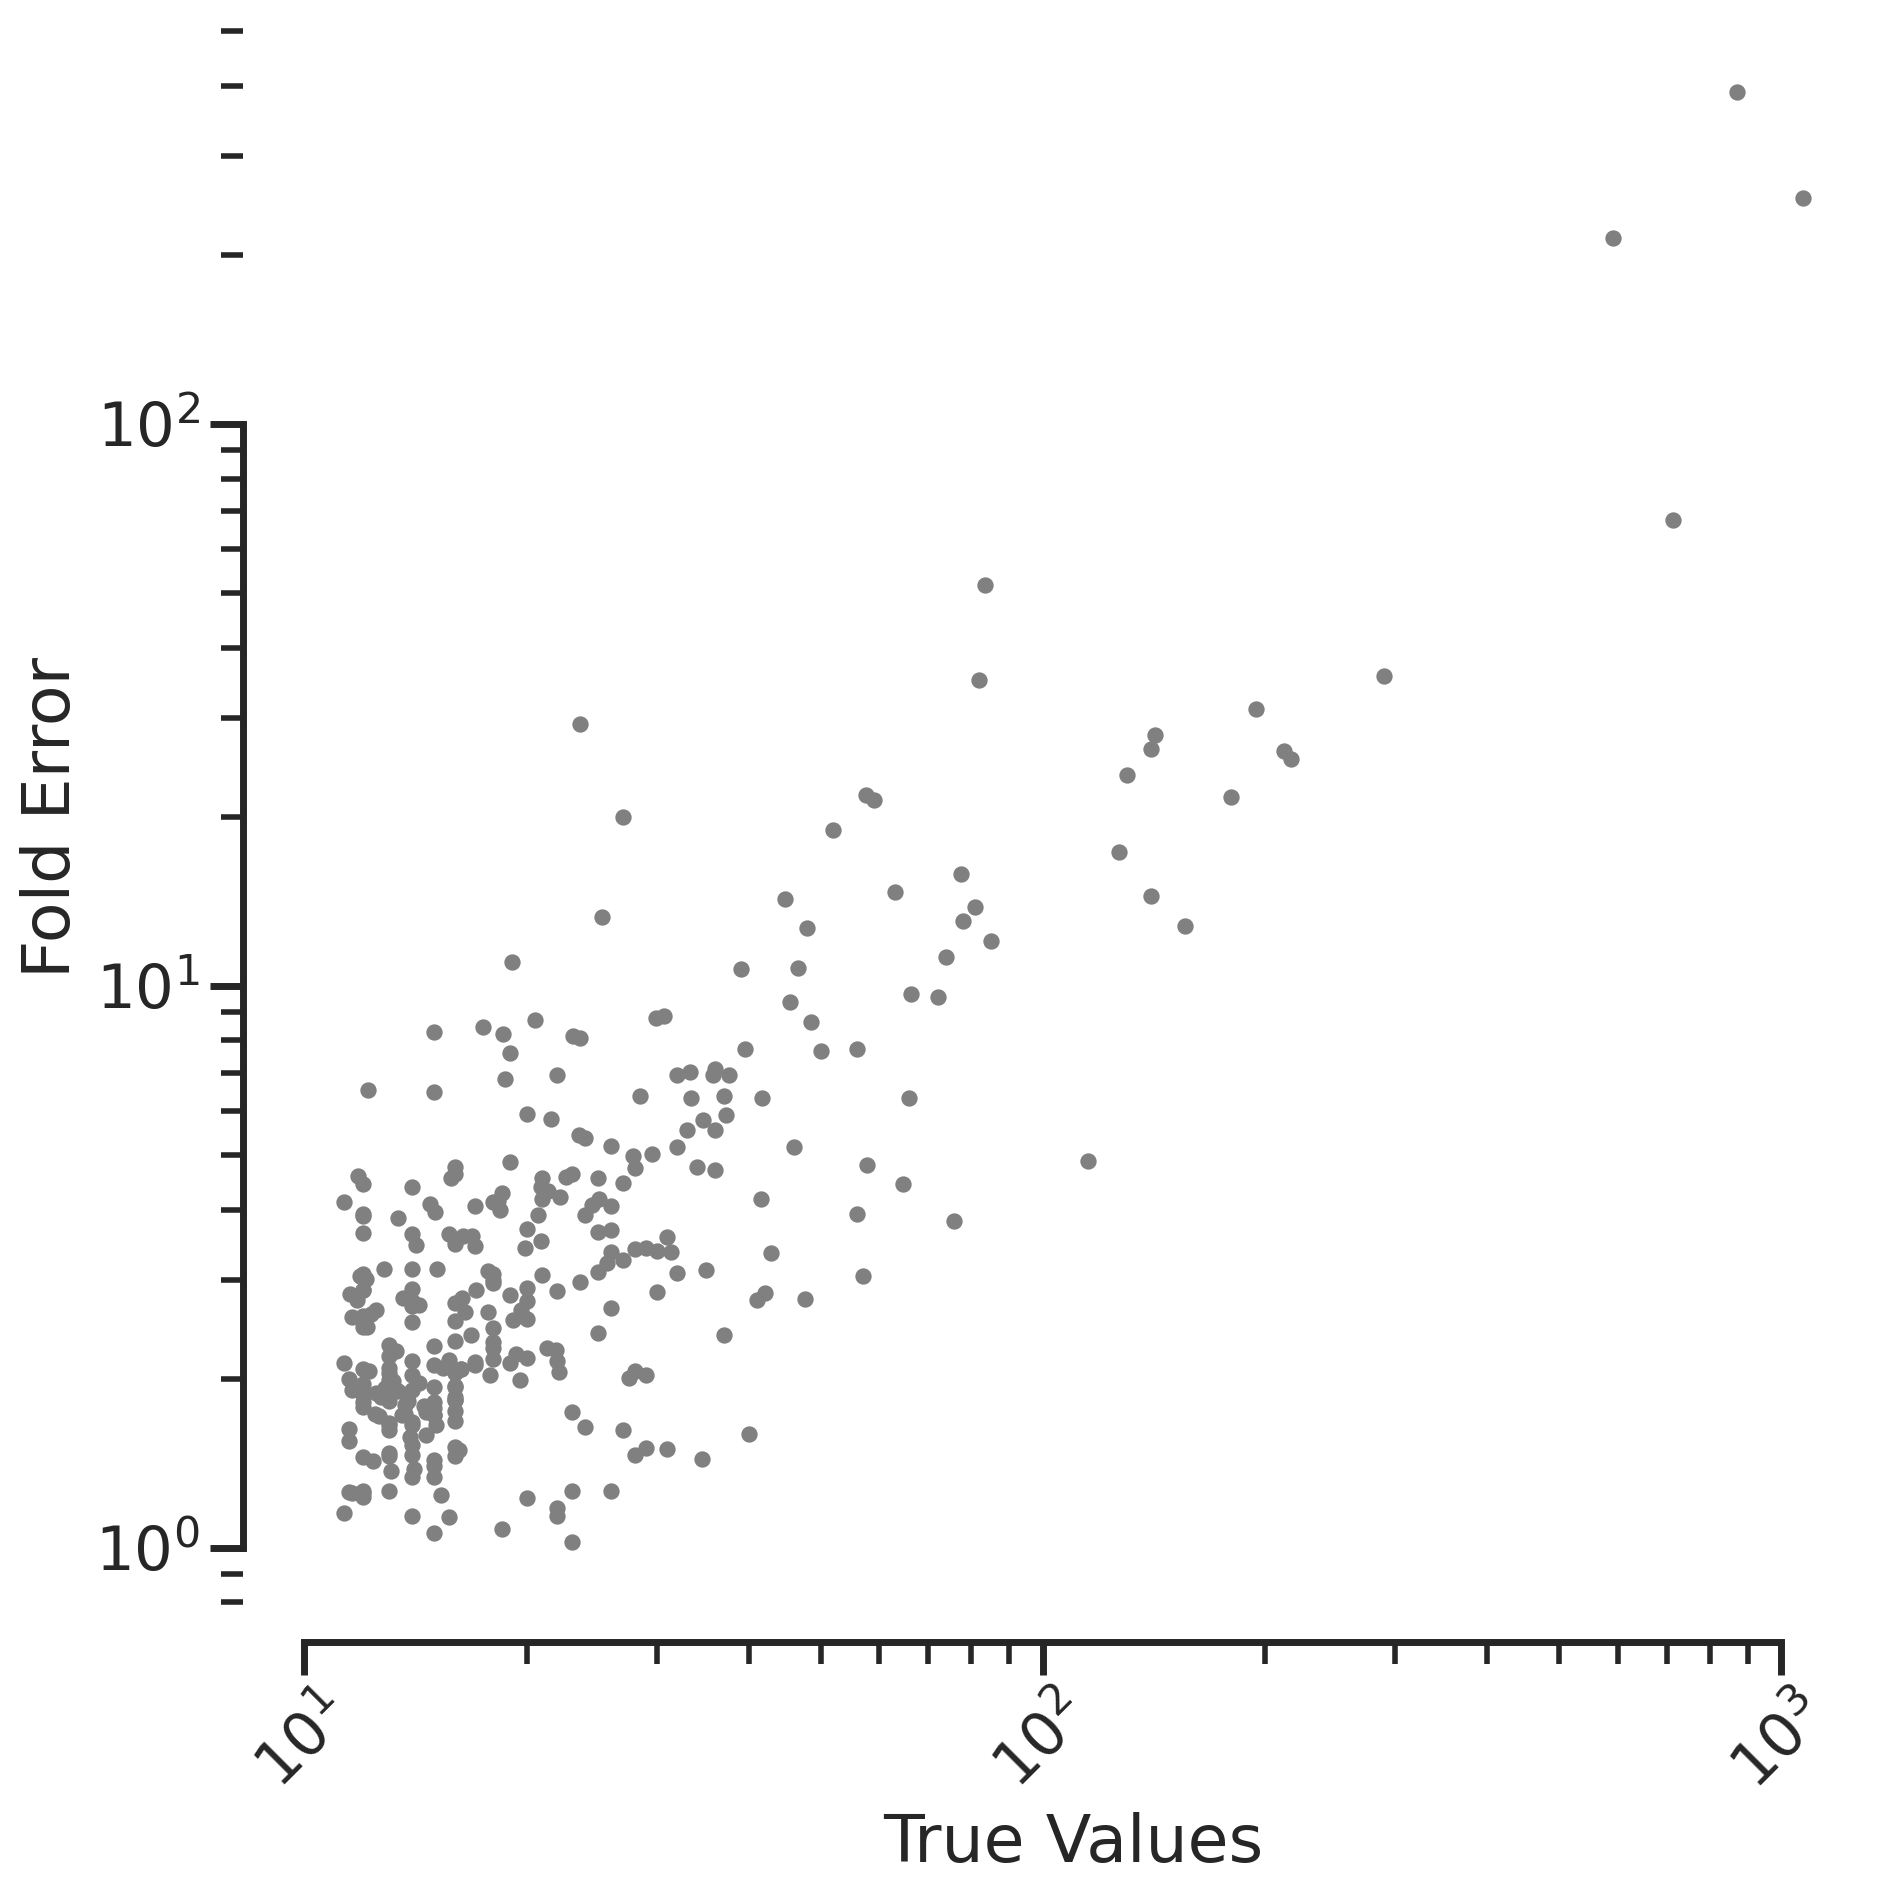

In [26]:
for endpoint in ["human_CL_mL_min_kg"]:
    print(endpoint)
    
    data= df[df["endpoint"]=="human_CL_mL_min_kg"]
    data=data[data["true"]>=1.041393]
    
    fe = data.groupby("smiles_r").mean()["folderror"].values
    y_true = 10**data.groupby("smiles_r").mean()["true"].values
    print(len(fe))

    fig = plt.figure(figsize =(10, 10), dpi=200) 

    plt.scatter(y_true, fe, color = 'gray', s=15) # s controls point size
  
    sns.set_context("poster", font_scale=1)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel("Fold Error")
    plt.xlabel("True Values")
    plt.title("")

    sns.set_style('ticks')
    sns.despine(offset=10, trim=True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

human_CL_mL_min_kg
962


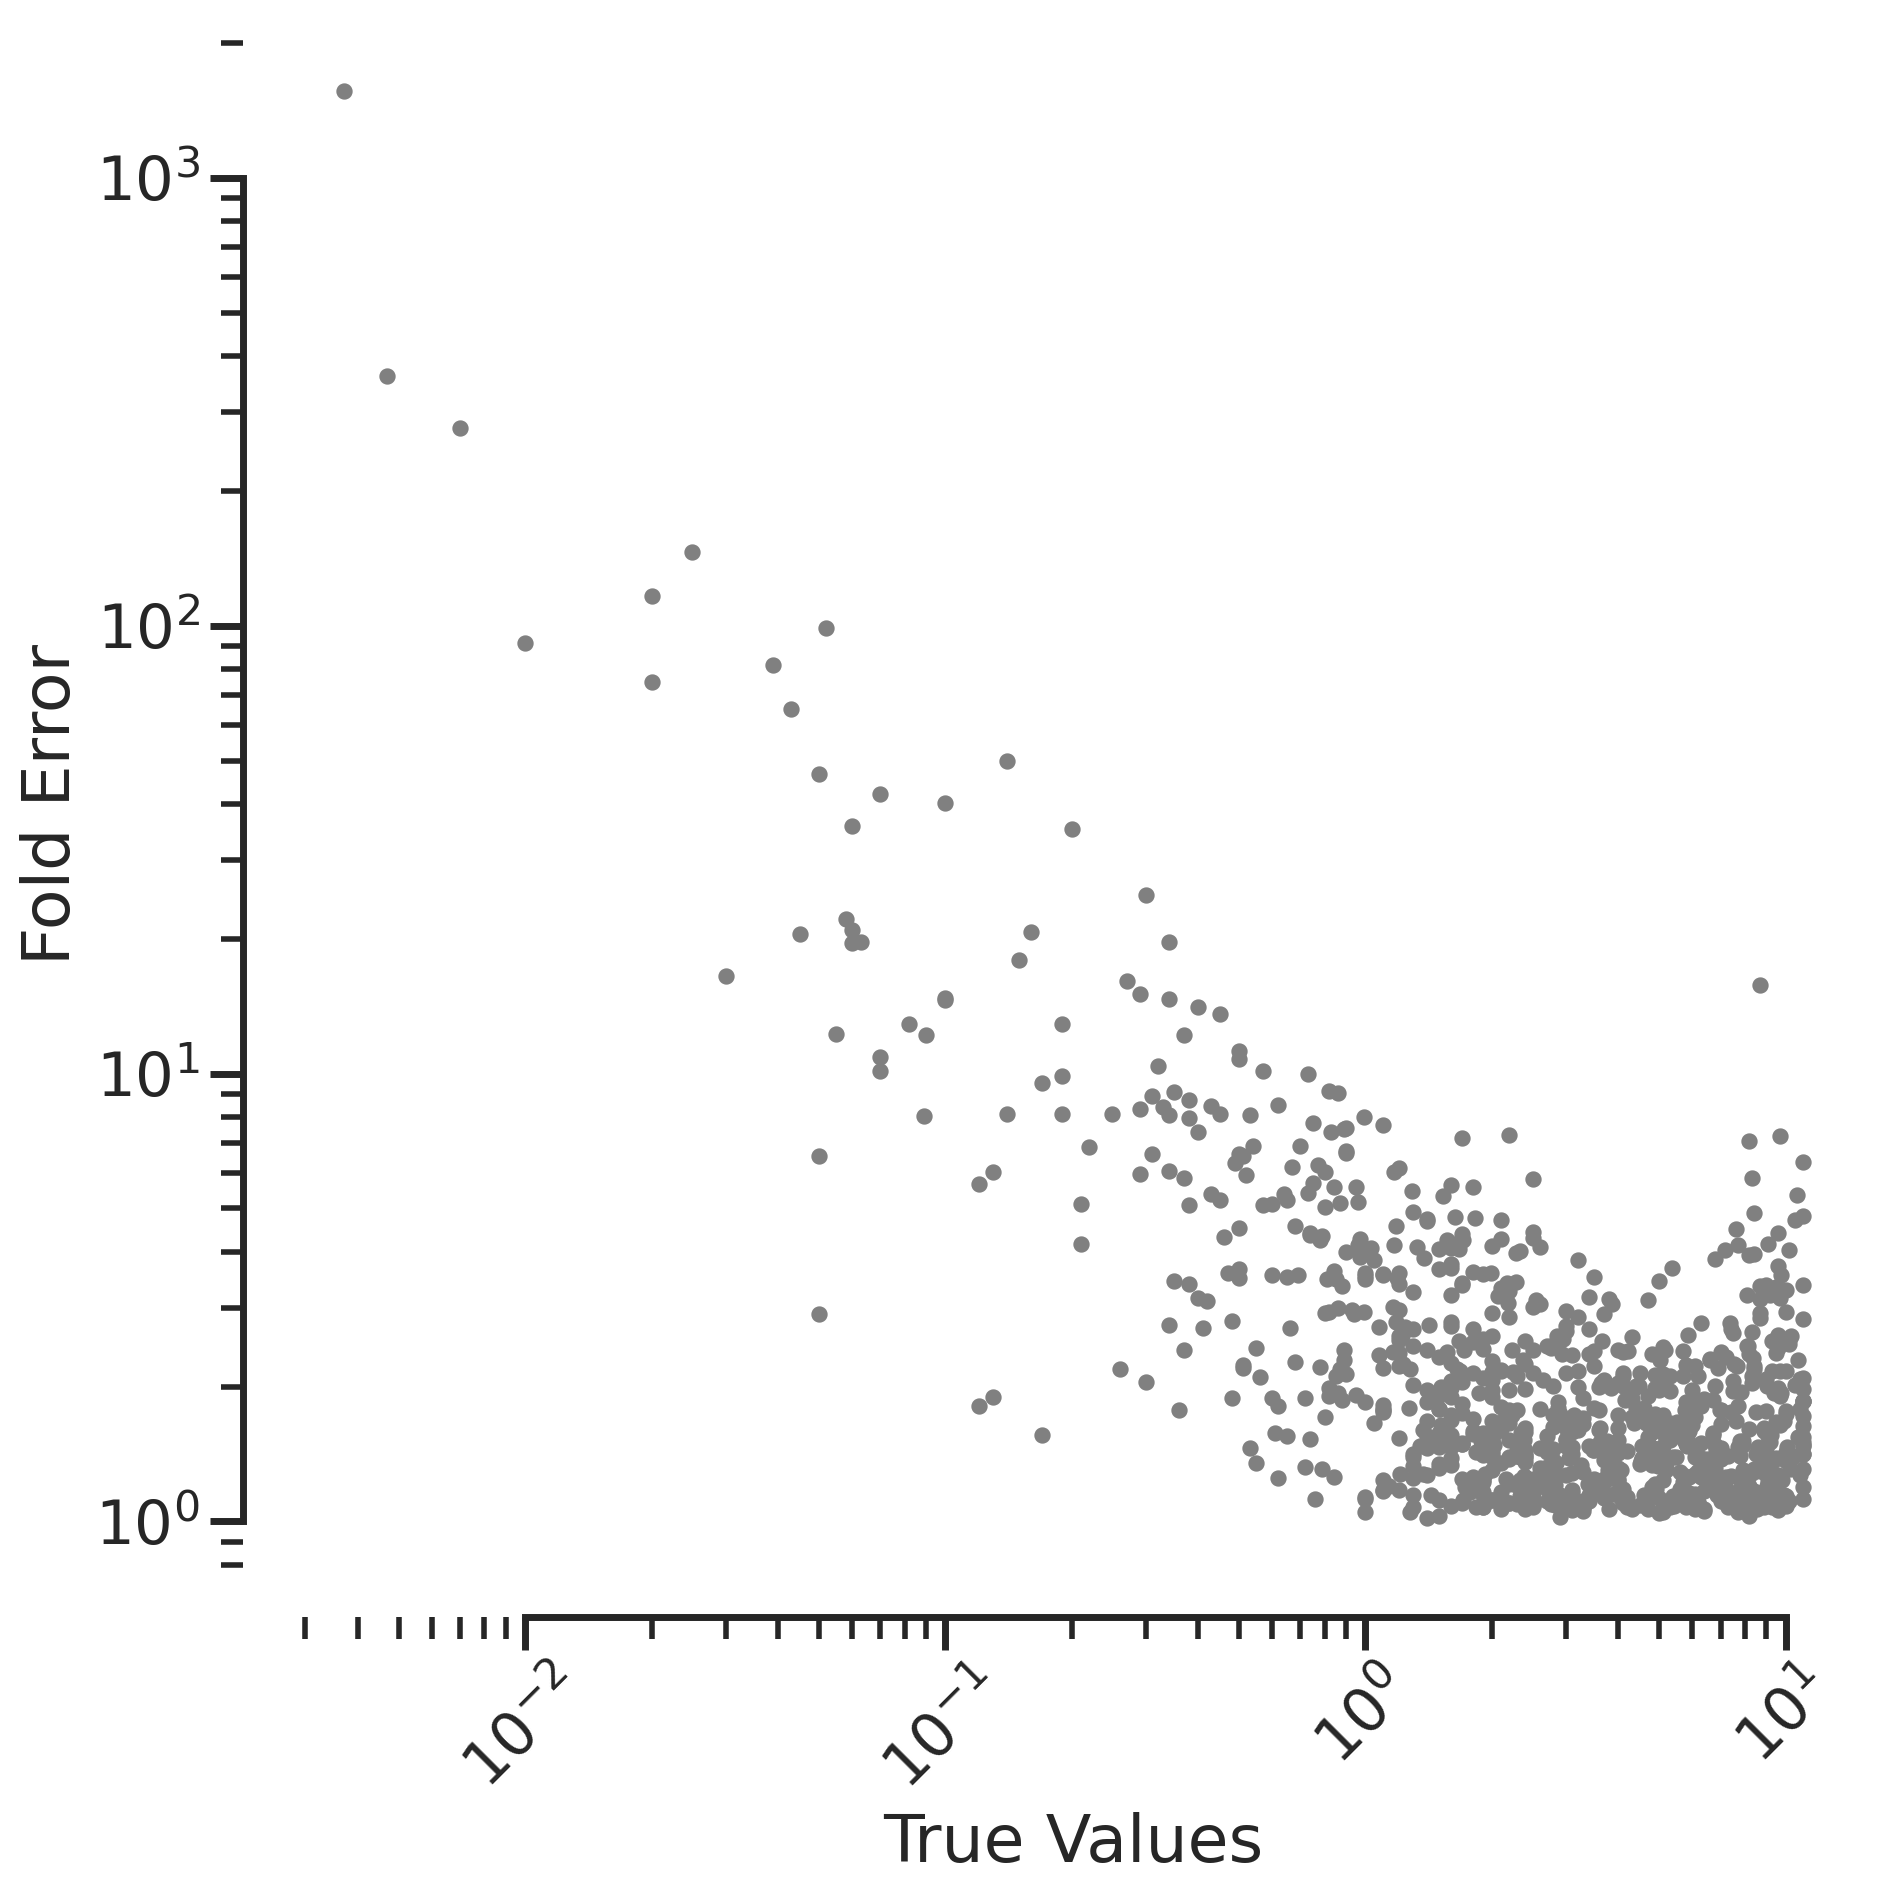

In [27]:
for endpoint in ["human_CL_mL_min_kg"]:
    print(endpoint)
    
    data= df[df["endpoint"]=="human_CL_mL_min_kg"]
    data=data[data["true"]<1.041393]
    
    fe = data.groupby("smiles_r").mean()["folderror"].values
    y_true = 10**data.groupby("smiles_r").mean()["true"].values
    print(len(fe))

    fig = plt.figure(figsize =(10, 10), dpi=200) 

    plt.scatter(y_true, fe, color = 'gray', s=15) # s controls point size
  
    sns.set_context("poster", font_scale=1)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel("Fold Error")
    plt.xlabel("True Values")
    plt.title("")

    sns.set_style('ticks')
    sns.despine(offset=10, trim=True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()